# Predicting NBA Game Outcomes with Machine Learning - Notebook 3
In the final notebook of this Independent Study. I finish up data preparation, perform analysis, run models, and create a new dataset for the 2021 season to test it on through streamlit. This notebook is by far the longest and has multiple sections.

### 1.9 - Import Libraries and nba_api

In [9]:
import nba_api as nba
import pandas as pd
import numpy as np
import requests
import seaborn as sn
import matplotlib.pyplot as plt

### 1.10 - Importing Data and Final Manipulation
I work with the data to create a final dataset for running models. I iterated through each game and made so one team would have their own stats and their opponent's. This gives a better estimate for team performance and opponent performance, something that needs to be considered when predicting games.

In [24]:
final = pd.read_csv('final.csv')

In [653]:
final.head(6108)

index  SEASON_ID           TEAM_NAME   GAME_DATE  MATCHUP   WL    PTS  \
0         0    22018.0       Atlanta Hawks  2018-11-01      1.0  0.0  115.0   
1         1    22018.0       Atlanta Hawks  2018-11-03      1.0  1.0  123.0   
2         2    22018.0       Atlanta Hawks  2018-11-06      0.0  0.0  102.0   
3         3    22018.0       Atlanta Hawks  2018-11-07      1.0  0.0  107.0   
4         4    22018.0       Atlanta Hawks  2018-11-09      1.0  0.0  109.0   
5         5    22018.0       Atlanta Hawks  2018-11-11      0.0  0.0  106.0   
6         6    22018.0       Atlanta Hawks  2018-11-13      0.0  0.0  103.0   
7         7    22018.0       Atlanta Hawks  2018-11-15      0.0  0.0   93.0   
8         8    22018.0       Atlanta Hawks  2018-11-17      0.0  0.0   89.0   
...     ...        ...                 ...         ...      ...  ...    ...   
6099   6099    22020.0  Washington Wizards  2021-05-01      0.0  0.0  124.0   
6100   6100    22020.0  Washington Wizards  2021-05-03      1.0  1.0  154.0   
6101   6101    22020.0  Washington Wizards  2021-05-05      0.0  0.0  134.0   
6102   6102    22020.0  Washington Wizards  2021-05-06      0.0  1.0  131.0   
6103   6103    22020.0  Washington Wizards  2021-05-08      0.0  1.0  133.0   
6104   6104    22020.0  Washington Wizards  2021-05-10      0.0  0.0  124.0   
6105   6105    22020.0  Washington Wizards  2021-05-12      0.0  0.0  116.0   
6106   6106    22020.0  Washington Wizards  2021-05-14      1.0  1.0  120.0   
6107   6107    22020.0  Washington Wizards  2021-05-16      1.0  1.0  115.0   

       GAME_ID.1  avg_SEASON_ID    avg_WL    avg_FGM    avg_FGA  avg_FG_PCT  \
0     21800114.0        22018.0  0.285714  39.000000  88.857143    0.439571   
1     21800128.0        22018.0  0.285714  39.142857  88.428571    0.443429   
2     21800149.0        22018.0  0.428571  39.857143  89.142857    0.447571   
3     21800155.0        22018.0  0.285714  38.857143  87.285714    0.446429   
4     21800169.0        22018.0  0.142857  38.857143  87.428571    0.445714   
5     21800189.0        22018.0  0.142857  40.142857  86.714286    0.465000   
6     21800201.0        22018.0  0.142857  41.000000  86.857143    0.473571   
7     21800214.0        22018.0  0.142857  40.428571  87.857143    0.461000   
8     21800226.0        22018.0  0.142857  39.000000  88.571429    0.441714   
...          ...            ...       ...        ...        ...         ...   
6099  22000964.0        22020.0  0.857143  46.571429  93.571429    0.496571   
6100  22000976.0        22020.0  0.714286  46.714286  93.571429    0.498143   
6101  22000235.0        22020.0  0.714286  50.285714  95.285714    0.525857   
6102  22000997.0        22020.0  0.571429  50.142857  95.714286    0.522143   
6103  22001012.0        22020.0  0.571429  49.857143  96.428571    0.515429   
6104  22001026.0        22020.0  0.714286  48.571429  96.571429    0.503000   
6105  22001042.0        22020.0  0.571429  49.142857  98.000000    0.501286   
6106  22000204.0        22020.0  0.428571  49.000000  99.285714    0.493571   
6107  22001080.0        22020.0  0.571429  48.142857  99.000000    0.485714   

       avg_FG3M   avg_FG3A  avg_FG3_PCT    avg_FTM    avg_FTA  avg_FT_PCT  \
0     13.714286  37.571429     0.364714  16.714286  23.571429    0.722143   
1     13.428571  36.857143     0.361857  17.857143  25.857143    0.699714   
2     13.285714  37.142857     0.353143  17.428571  24.000000    0.728286   
3     11.000000  34.714286     0.314857  17.285714  23.857143    0.726714   
4     10.428571  34.714286     0.299714  17.285714  23.571429    0.733714   
5      9.714286  33.000000     0.292571  18.857143  26.000000    0.722857   
6     10.428571  33.000000     0.311857  18.428571  24.857143    0.748429   
7     10.000000  32.571429     0.304143  18.428571  24.571429    0.760714   
8     10.142857  34.142857     0.297857  18.000000  23.571429    0.770000   
...         ...        ...          ...        ...        ...         ... 

Eliminating Unnessecary Rows

In [26]:
list1 = ['E_OFF_RATING', 'E_DEF_RATING', 'E_NET_RATING', 'E_TM_TOV_PCT', 'USG_PCT', 'E_USG_PCT', 'E_PACE', 'avg_index', 'avg_MATCHUP', 'avg_MIN', 'avg_index.1', 'avg_GAME_ID.1', 'avg_TEAM_ID.1', 'avg_E_OFF_RATING', 'avg_E_DEF_RATING', 'avg_E_NET_RATING', 'avg_E_TM_TOV_PCT', 'avg_USG_PCT', 'avg_E_USG_PCT', 'avg_E_PACE']
list2 = list1+['level_0.1', 'MIN', 'index.1', 'TEAM_ID.1', 'TEAM_NAME.1', 'TEAM_ABBREVIATION.1', 'TEAM_CITY', 'MIN.1']

In [27]:
final=final.drop(list2, axis=1)

In [29]:
newlist = []
for cols in final.columns:
    newlist.append(cols)
newlist2 = newlist[0:6]+newlist[23:25]+newlist[41:]
final = pd.DataFrame(final[newlist2])
final.head()

index  SEASON_ID      TEAM_NAME   GAME_DATE  MATCHUP   WL    PTS  \
0      0    22018.0  Atlanta Hawks  2018-11-01      1.0  0.0  115.0   
1      1    22018.0  Atlanta Hawks  2018-11-03      1.0  1.0  123.0   
2      2    22018.0  Atlanta Hawks  2018-11-06      0.0  0.0  102.0   
3      3    22018.0  Atlanta Hawks  2018-11-07      1.0  0.0  107.0   
4      4    22018.0  Atlanta Hawks  2018-11-09      1.0  0.0  109.0   

    GAME_ID.1  avg_SEASON_ID    avg_WL  ...  avg_OREB_PCT  avg_DREB_PCT  \
0  21800114.0        22018.0  0.285714  ...      0.210857      0.716143   
1  21800128.0        22018.0  0.285714  ...      0.217286      0.721714   
2  21800149.0        22018.0  0.428571  ...      0.228143      0.716000   
3  21800155.0        22018.0  0.285714  ...      0.214286      0.715714   
4  21800169.0        22018.0  0.142857  ...      0.230571      0.697143   

   avg_REB_PCT  avg_TM_TOV_PCT  avg_EFG_PCT  avg_TS_PCT    avg_PACE  \
0     0.463571       17.128571     0.516571    0.546857  108.500000   
1     0.466857       16.885714     0.519143    0.549429  108.500000   
2     0.471429       16.842857     0.521857    0.554429  107.714286   
3     0.464857       18.200000     0.509857    0.543571  107.857143   
4     0.460286       18.585714     0.506000    0.540857  106.928571   

   avg_PACE_PER40    avg_POSS   avg_PIE  
0       90.417143  108.285714  0.452571  
1       90.417143  108.285714  0.446000  
2       89.762857  107.714286  0.463286  
3       89.881429  107.714286  0.442143  
4       89.107143  106.857143  0.434857  

[5 rows x 45 columns]

In [639]:
final2 = final.drop(['PTS', 'avg_SEASON_ID', 'avg_level_0.1', 'index'], axis=1)

In [640]:
final2.head(10)

SEASON_ID      TEAM_NAME   GAME_DATE  MATCHUP   WL   GAME_ID.1    avg_WL  \
0    22018.0  Atlanta Hawks  2018-11-01      1.0  0.0  21800114.0  0.285714   
1    22018.0  Atlanta Hawks  2018-11-03      1.0  1.0  21800128.0  0.285714   
2    22018.0  Atlanta Hawks  2018-11-06      0.0  0.0  21800149.0  0.428571   
3    22018.0  Atlanta Hawks  2018-11-07      1.0  0.0  21800155.0  0.285714   
4    22018.0  Atlanta Hawks  2018-11-09      1.0  0.0  21800169.0  0.142857   
5    22018.0  Atlanta Hawks  2018-11-11      0.0  0.0  21800189.0  0.142857   
6    22018.0  Atlanta Hawks  2018-11-13      0.0  0.0  21800201.0  0.142857   
7    22018.0  Atlanta Hawks  2018-11-15      0.0  0.0  21800214.0  0.142857   
8    22018.0  Atlanta Hawks  2018-11-17      0.0  0.0  21800226.0  0.142857   
9    22018.0  Atlanta Hawks  2018-11-19      1.0  0.0  21800243.0  0.000000   

     avg_FGM    avg_FGA  avg_FG_PCT   avg_FG3M   avg_FG3A  avg_FG3_PCT  \
0  39.000000  88.857143    0.439571  13.714286  37.571429     0.364714   
1  39.142857  88.428571    0.443429  13.428571  36.857143     0.361857   
2  39.857143  89.142857    0.447571  13.285714  37.142857     0.353143   
3  38.857143  87.285714    0.446429  11.000000  34.714286     0.314857   
4  38.857143  87.428571    0.445714  10.428571  34.714286     0.299714   
5  40.142857  86.714286    0.465000   9.714286  33.000000     0.292571   
6  41.000000  86.857143    0.473571  10.428571  33.000000     0.311857   
7  40.428571  87.857143    0.461000  10.000000  32.571429     0.304143   
8  39.000000  88.571429    0.441714  10.142857  34.142857     0.297857   
9  36.857143  88.428571    0.417857   9.428571  33.714286     0.279286   

     avg_FTM    avg_FTA  avg_FT_PCT   avg_OREB   avg_DREB    avg_REB  \
0  16.714286  23.571429    0.722143   9.142857  36.142857  45.285714   
1  17.857143  25.857143    0.699714   9.571429  35.428571  45.000000   
2  17.428571  24.000000    0.728286   9.142857  35.428571  44.571429   
3  17.285714  23.857143    0.726714   8.857143  34.714286  43.571429   
4  17.285714  23.571429    0.733714   9.571429  32.714286  42.285714   
5  18.857143  26.000000    0.722857   9.285714  33.714286  43.000000   
6  18.428571  24.857143    0.748429   9.285714  33.285714  42.571429   
7  18.428571  24.571429    0.760714   9.857143  33.142857  43.000000   
8  18.000000  23.571429    0.770000  10.571429  32.428571  43.000000   
9  18.142857  24.142857    0.758714  10.142857  33.428571  43.571429   

     avg_AST   avg_STL   avg_BLK    avg_TOV     avg_PF     avg_PTS  \
0  24.428571  8.000000  5.714286  18.571429  24.000000  108.428571   
1  25.428571  7.857143  6.142857  18.285714  23.714286  109.571429   
2  26.285714  8.142857  6.428571  18.142857  22.285714  110.428571   
3  24.857143  8.714286  6.714286  19.571429  21.857143  106.000000   
4  24.571429  8.571429  7.142857  19.857143  22.428571  105.428571   
5  24.142857  8.142857  6.285714  19.000000  23.571429  108.857143   
6  24.857143  8.285714  6.428571  19.571429  24.285714  110.857143   
7  24.857143  8.714286  5.571429  18.714286  22.714286  109.285714   
8  24.000000  8.857143  5.428571  18.285714  21.857143  106.142857   
9  22.142857  9.428571  5.285714  18.285714  22.285714  101.285714   

   avg_OFF_RATING  avg_DEF_RATING  avg_NET_RATING  avg_AST_PCT  avg_AST_TOV  \
0      100.257143      107.557143       -7.285714     0.632286     1.440000   
1      101.271429      110.114286       -8.828571     0.654571     1.495714   
2      102.728571      109.485714       -6.728571     0.662857     1.554286   
3       98.542857      109.471429      -10.900000     0.644286     1.315714   
4       98.828571      111.442857      -12.600000     0.636571     1.267143   
5      102.200000      115.485714      -13.271429     0.598143     1.288571   
6      104.542857      115.085714      -10.542857     0.603714     1.287143   
7      104.042857      112.500000       -8.457143     0.611857     1.341429   
8      102.028571      112.128571      -10.

In [641]:
final2 = final2.sort_values(['GAME_DATE', 'GAME_ID.1'])
final2.head(100)

SEASON_ID               TEAM_NAME   GAME_DATE  MATCHUP   WL   GAME_ID.1  \
675     22018.0   Golden State Warriors  2018-10-29      0.0  1.0  21800091.0   
225     22018.0       Charlotte Hornets  2018-10-30      1.0  1.0  21800096.0   
1875    22018.0        Sacramento Kings  2018-10-30      0.0  1.0  21800098.0   
1650    22018.0      Philadelphia 76ers  2018-10-30      0.0  0.0  21800100.0   
2025    22018.0         Toronto Raptors  2018-10-30      1.0  1.0  21800100.0   
150     22018.0           Brooklyn Nets  2018-10-31      1.0  1.0  21800104.0   
825     22018.0          Indiana Pacers  2018-10-31      0.0  1.0  21800105.0   
1425    22018.0         New York Knicks  2018-10-31      1.0  0.0  21800105.0   
300     22018.0           Chicago Bulls  2018-10-31      1.0  0.0  21800106.0   
...         ...                     ...         ...      ...  ...         ...   
1727    22018.0            Phoenix Suns  2018-11-06      1.0  0.0  21800151.0   
1202    22018.0         Milwaukee Bucks  2018-11-06      0.0  0.0  21800152.0   
1803    22018.0  Portland Trail Blazers  2018-11-06      1.0  1.0  21800152.0   
378     22018.0     Cleveland Cavaliers  2018-11-07      1.0  0.0  21800153.0   
1502    22018.0   Oklahoma City Thunder  2018-11-07      0.0  1.0  21800153.0   
602     22018.0         Detroit Pistons  2018-11-07      0.0  1.0  21800154.0   
1578    22018.0           Orlando Magic  2018-11-07      1.0  0.0  21800154.0   
3       22018.0           Atlanta Hawks  2018-11-07      1.0  0.0  21800155.0   
1429    22018.0         New York Knicks  2018-11-07      0.0  1.0  21800155.0   

        avg_WL    avg_FGM    avg_FGA  avg_FG_PCT   avg_FG3M   avg_FG3A  \
675   0.857143  45.714286  88.142857    0.518286  11.428571  30.000000   
225   0.428571  41.857143  92.428571    0.453000  13.000000  35.428571   
1875  0.571429  45.857143  91.857143    0.498429  10.285714  25.428571   
1650  0.571429  40.857143  93.428571    0.436429  11.857143  35.285714   
2025  0.857143  43.714286  91.714286    0.479143  11.857143  34.285714   
150   0.285714  39.285714  85.571429    0.460286  13.857143  35.428571   
825   0.571429  43.285714  86.428571    0.505286   9.714286  22.571429   
1425  0.285714  40.285714  93.571429    0.430143  11.000000  31.571429   
300   0.285714  40.714286  86.714286    0.470571  11.428571  30.000000   
...        ...        ...        ...         ...        ...        ...   
1727  0.142857  37.857143  82.714286    0.460857   9.142857  29.571429   
1202  0.857143  44.000000  91.714286    0.481000  15.571429  41.285714   
1803  0.714286  41.000000  87.142857    0.472143  10.285714  29.142857   
378   0.142857  38.571429  85.428571    0.451857   8.000000  22.714286   
1502  0.714286  44.142857  93.142857    0.476286   9.285714  29.142857   
602   0.285714  39.571429  92.000000    0.430857   9.285714  32.428571   
1578  0.428571  39.285714  91.285714    0.432714  10.000000  33.428571   
3     0.285714  38.857143  87.285714    0.446429  11.000000  34.714286   
1429  0.285714  39.571429  90.714286    0.438429   9.285714  29.000000   

      avg_FG3_PCT    avg_FTM    avg_FTA  avg_FT_PCT   avg_OREB   avg_DREB  \
675      0.383857  17.857143  21.000000    0.854857   9.428571  35.571429   
225      0.364429  17.428571  21.714286    0.805571  10.714286  33.714286   
1875     0.402143  15.857143  24.714286    0.634714  10.428571  34.857143   
1650     0.335000  19.000000  24.142857    0.800000  10.857143  41.428571   
2025     0.353714  16.428571  21.285714    0.769429  11.000000  36.857143   
150      0.381286  14.142857  19.285714    0.728571   9.428571  33.571429   
825      0.417857  12.714286  18.857143    0.683286   8.571429  31.714286   
1425     0.349286  15.142857  19.571429    0.779000  11.571429  32.571429   
300      0.385429  17.428571  23.714286    0.740429   7.714286  33.571429   
...           ...        ...        ...         ...        ...        ...   
1727     0.307571  16.857143  21.000000    0.790714   8.5

Transforming Data by Eliminating Games where the stats for both teams aren't shown

In [642]:
counts = final2['GAME_ID.1'].value_counts()
final2 = final2[~final2['GAME_ID.1'].isin(counts[counts < 2].index)]
final2.head(20)

SEASON_ID               TEAM_NAME   GAME_DATE  MATCHUP   WL   GAME_ID.1  \
1650    22018.0      Philadelphia 76ers  2018-10-30      0.0  0.0  21800100.0   
2025    22018.0         Toronto Raptors  2018-10-30      1.0  1.0  21800100.0   
825     22018.0          Indiana Pacers  2018-10-31      0.0  1.0  21800105.0   
1425    22018.0         New York Knicks  2018-10-31      1.0  0.0  21800105.0   
450     22018.0        Dallas Mavericks  2018-10-31      0.0  0.0  21800109.0   
975     22018.0      Los Angeles Lakers  2018-10-31      1.0  1.0  21800109.0   
375     22018.0     Cleveland Cavaliers  2018-11-01      1.0  0.0  21800112.0   
525     22018.0          Denver Nuggets  2018-11-01      0.0  1.0  21800112.0   
900     22018.0             LA Clippers  2018-11-01      0.0  0.0  21800113.0   
...         ...                     ...         ...      ...  ...         ...   
1876    22018.0        Sacramento Kings  2018-11-01      0.0  1.0  21800114.0   
75      22018.0          Boston Celtics  2018-11-01      1.0  1.0  21800115.0   
1200    22018.0         Milwaukee Bucks  2018-11-01      0.0  0.0  21800115.0   
1350    22018.0    New Orleans Pelicans  2018-11-01      0.0  0.0  21800116.0   
1800    22018.0  Portland Trail Blazers  2018-11-01      1.0  1.0  21800116.0   
901     22018.0             LA Clippers  2018-11-02      0.0  1.0  21800117.0   
1575    22018.0           Orlando Magic  2018-11-02      1.0  0.0  21800117.0   
1500    22018.0   Oklahoma City Thunder  2018-11-02      0.0  1.0  21800119.0   
2175    22018.0      Washington Wizards  2018-11-02      1.0  0.0  21800119.0   

        avg_WL    avg_FGM    avg_FGA  avg_FG_PCT   avg_FG3M   avg_FG3A  \
1650  0.571429  40.857143  93.428571    0.436429  11.857143  35.285714   
2025  0.857143  43.714286  91.714286    0.479143  11.857143  34.285714   
825   0.571429  43.285714  86.428571    0.505286   9.714286  22.571429   
1425  0.285714  40.285714  93.571429    0.430143  11.000000  31.571429   
450   0.285714  40.571429  92.000000    0.440571  12.142857  37.428571   
975   0.285714  48.000000  97.428571    0.492286  10.571429  32.000000   
375   0.142857  40.714286  90.142857    0.451000   8.000000  23.000000   
525   0.857143  42.142857  91.571429    0.459143   8.285714  28.285714   
900   0.571429  41.000000  85.857143    0.476286   9.142857  24.428571   
...        ...        ...        ...         ...        ...        ...   
1876  0.714286  44.714286  90.285714    0.494429  10.428571  25.857143   
75    0.714286  37.285714  89.285714    0.417571  11.000000  33.571429   
1200  1.000000  43.857143  91.428571    0.481143  15.571429  40.571429   
1350  0.571429  45.571429  93.285714    0.488857  10.428571  28.000000   
1800  0.714286  41.857143  89.285714    0.472571  11.428571  30.571429   
901   0.571429  41.428571  85.571429    0.482571   9.285714  23.714286   
1575  0.285714  38.000000  92.714286    0.412286  10.285714  33.714286   
1500  0.428571  40.285714  94.142857    0.428714   8.142857  30.714286   
2175  0.142857  39.000000  90.000000    0.434857  11.428571  35.428571   

      avg_FG3_PCT    avg_FTM    avg_FTA  avg_FT_PCT   avg_OREB   avg_DREB  \
1650     0.335000  19.000000  24.142857    0.800000  10.857143  41.428571   
2025     0.353714  16.428571  21.285714    0.769429  11.000000  36.857143   
825      0.417857  12.714286  18.857143    0.683286   8.571429  31.714286   
1425     0.349286  15.142857  19.571429    0.779000  11.571429  32.571429   
450      0.325286  17.857143  23.857143    0.751429  11.000000  33.142857   
975      0.328857  15.428571  21.714286    0.700714  10.571429  34.714286   
375      0.340857  20.571429  25.428571    0.818571  13.428571  31.000000   
525      0.293286  20.285714  27.000000    0.768000  12.428571  37.142857   
900      0.369000  24.428571  29.571429    0.814429   9.285714  37.857143   
...           ...        ...        ...         ...        ...        ...   
1876     0.401571  16.571429  25.857143    0.632857  10.8

In [643]:
final2 = final2.reset_index()
final2 = final2.drop(['index'], axis=1)

In [645]:
final2 = final2.rename(columns={'GAME_ID.1': 'GAME_ID'})
final2.head(-5)

SEASON_ID               TEAM_NAME   GAME_DATE  MATCHUP   WL     GAME_ID  \
0       22018.0      Philadelphia 76ers  2018-10-30      0.0  0.0  21800100.0   
1       22018.0         Toronto Raptors  2018-10-30      1.0  1.0  21800100.0   
2       22018.0          Indiana Pacers  2018-10-31      0.0  1.0  21800105.0   
3       22018.0         New York Knicks  2018-10-31      1.0  0.0  21800105.0   
4       22018.0        Dallas Mavericks  2018-10-31      0.0  0.0  21800109.0   
5       22018.0      Los Angeles Lakers  2018-10-31      1.0  1.0  21800109.0   
6       22018.0     Cleveland Cavaliers  2018-11-01      1.0  0.0  21800112.0   
7       22018.0          Denver Nuggets  2018-11-01      0.0  1.0  21800112.0   
8       22018.0             LA Clippers  2018-11-01      0.0  0.0  21800113.0   
...         ...                     ...         ...      ...  ...         ...   
6066    22020.0             LA Clippers  2021-05-16      0.0  0.0  22001074.0   
6067    22020.0   Oklahoma City Thunder  2021-05-16      1.0  1.0  22001074.0   
6068    22020.0           Orlando Magic  2021-05-16      0.0  0.0  22001075.0   
6069    22020.0      Philadelphia 76ers  2021-05-16      1.0  1.0  22001075.0   
6070    22020.0          Denver Nuggets  2021-05-16      0.0  0.0  22001076.0   
6071    22020.0  Portland Trail Blazers  2021-05-16      1.0  1.0  22001076.0   
6072    22020.0        Sacramento Kings  2021-05-16      1.0  0.0  22001077.0   
6073    22020.0               Utah Jazz  2021-05-16      0.0  1.0  22001077.0   
6074    22020.0            Phoenix Suns  2021-05-16      0.0  1.0  22001078.0   

        avg_WL    avg_FGM    avg_FGA  avg_FG_PCT   avg_FG3M   avg_FG3A  \
0     0.571429  40.857143  93.428571    0.436429  11.857143  35.285714   
1     0.857143  43.714286  91.714286    0.479143  11.857143  34.285714   
2     0.571429  43.285714  86.428571    0.505286   9.714286  22.571429   
3     0.285714  40.285714  93.571429    0.430143  11.000000  31.571429   
4     0.285714  40.571429  92.000000    0.440571  12.142857  37.428571   
5     0.285714  48.000000  97.428571    0.492286  10.571429  32.000000   
6     0.142857  40.714286  90.142857    0.451000   8.000000  23.000000   
7     0.857143  42.142857  91.571429    0.459143   8.285714  28.285714   
8     0.571429  41.000000  85.857143    0.476286   9.142857  24.428571   
...        ...        ...        ...         ...        ...        ...   
6066  0.571429  39.571429  81.000000    0.490429  13.857143  35.142857   
6067  0.000000  37.571429  89.571429    0.420429   9.714286  31.571429   
6068  0.142857  37.571429  90.428571    0.415571   9.285714  30.000000   
6069  0.714286  41.000000  85.142857    0.481714  11.571429  30.428571   
6070  0.571429  41.000000  88.428571    0.465143  11.857143  34.714286   
6071  0.714286  44.142857  90.857143    0.486714  14.714286  35.714286   
6072  0.571429  41.571429  91.000000    0.459429  13.571429  37.857143   
6073  0.714286  42.428571  88.428571    0.480286  14.714286  40.571429   
6074  0.571429  43.428571  87.142857    0.497286  13.857143  33.000000   

      avg_FG3_PCT    avg_FTM    avg_FTA  avg_FT_PCT   avg_OREB   avg_DREB  \
0        0.335000  19.000000  24.142857    0.800000  10.857143  41.428571   
1        0.353714  16.428571  21.285714    0.769429  11.000000  36.857143   
2        0.417857  12.714286  18.857143    0.683286   8.571429  31.714286   
3        0.349286  15.142857  19.571429    0.779000  11.571429  32.571429   
4        0.325286  17.857143  23.857143    0.751429  11.000000  33.142857   
5        0.328857  15.428571  21.714286    0.700714  10.571429  34.714286   
6        0.340857  20.571429  25.428571    0.818571  13.428571  31.000000   
7        0.293286  20.285714  27.000000    0.768000  12.428571  37.142857   
8        0.369000  24.428571  29.571429    0.814429   9.285714  37.857143   
...           ...        ...        ...         ...        ...        ...   
6066     0.391429  17.000000  19.428571    0.873714   7.4

Combining the data from both teams to create 1 row for each game

In [646]:
season_list = []
gamelist = []
for games in final2['GAME_ID']:
    season_list.append(games)
    for i in season_list:
        if i not in gamelist:
            gamelist.append(i)
print(gamelist)

[21800100.0, 21800105.0, 21800109.0, 21800112.0, 21800113.0, 21800114.0, 21800115.0, 21800116.0, 21800117.0, 21800119.0, 21800120.0, 21800121.0, 21800123.0, 21800124.0, 21800125.0, 21800126.0, 21800127.0, 21800128.0, 21800129.0, 21800130.0, 21800131.0, 21800132.0, 21800133.0, 21800134.0, 21800135.0, 21800136.0, 21800137.0, 21800138.0, 21800139.0, 21800140.0, 21800141.0, 21800142.0, 21800143.0, 21800144.0, 21800145.0, 21800146.0, 21800147.0, 21800148.0, 21800149.0, 21800150.0, 21800151.0, 21800152.0, 21800153.0, 21800154.0, 21800155.0, 21800156.0, 21800157.0, 21800158.0, 21800159.0, 21800160.0, 21800161.0, 21800162.0, 21800163.0, 21800164.0, 21800165.0, 21800166.0, 21800167.0, 21800168.0, 21800169.0, 21800170.0, 21800171.0, 21800172.0, 21800173.0, 21800174.0, 21800175.0, 21800176.0, 21800177.0, 21800178.0, 21800179.0, 21800180.0, 21800181.0, 21800182.0, 21800183.0, 21800184.0, 21800185.0, 21800186.0, 21800187.0, 21800188.0, 21800189.0, 21800190.0, 21800191.0, 21800192.0, 21800193.0, 218

In [647]:
grouped = final2.groupby(final2.GAME_ID)
new_final = pd.DataFrame()
for games in gamelist:
    new_group = grouped.get_group(games)
    new_df = pd.DataFrame()
    new_df2 = pd.DataFrame()
    new_df = pd.concat([new_group.iloc[0:1]], axis=1)
    new_df2 = pd.concat([new_group.iloc[1:2]], axis=1)
    for cols in new_df2.columns:
        new_df2 = new_df2.rename(columns={cols: 'opp_'+cols})
    new_df2 = new_df2.rename(columns={'opp_GAME_ID': 'GAME_ID'})
    new_df3 = pd.merge(new_df, new_df2, on=['GAME_ID'])
    new_final = pd.concat([new_final, new_df3], axis=0)
new_final.head()

SEASON_ID            TEAM_NAME   GAME_DATE  MATCHUP   WL     GAME_ID  \
0    22018.0   Philadelphia 76ers  2018-10-30      0.0  0.0  21800100.0   
0    22018.0       Indiana Pacers  2018-10-31      0.0  1.0  21800105.0   
0    22018.0     Dallas Mavericks  2018-10-31      0.0  0.0  21800109.0   
0    22018.0  Cleveland Cavaliers  2018-11-01      1.0  0.0  21800112.0   
0    22018.0          LA Clippers  2018-11-01      0.0  0.0  21800113.0   

     avg_WL    avg_FGM    avg_FGA  avg_FG_PCT   avg_FG3M   avg_FG3A  \
0  0.571429  40.857143  93.428571    0.436429  11.857143  35.285714   
0  0.571429  43.285714  86.428571    0.505286   9.714286  22.571429   
0  0.285714  40.571429  92.000000    0.440571  12.142857  37.428571   
0  0.142857  40.714286  90.142857    0.451000   8.000000  23.000000   
0  0.571429  41.000000  85.857143    0.476286   9.142857  24.428571   

   avg_FG3_PCT    avg_FTM    avg_FTA  avg_FT_PCT   avg_OREB   avg_DREB  \
0     0.335000  19.000000  24.142857    0.800000  10.857143  41.428571   
0     0.417857  12.714286  18.857143    0.683286   8.571429  31.714286   
0     0.325286  17.857143  23.857143    0.751429  11.000000  33.142857   
0     0.340857  20.571429  25.428571    0.818571  13.428571  31.000000   
0     0.369000  24.428571  29.571429    0.814429   9.285714  37.857143   

     avg_REB    avg_AST   avg_STL   avg_BLK    avg_TOV     avg_PF     avg_PTS  \
0  52.285714  27.571429  6.285714  6.571429  13.714286  22.000000  112.571429   
0  40.285714  23.285714  8.142857  4.857143  13.857143  21.142857  109.000000   
0  44.142857  24.000000  7.285714  5.142857  15.571429  20.571429  111.142857   
0  44.428571  20.857143  7.428571  1.428571  14.714286  22.571429  110.000000   
0  47.142857  21.714286  5.714286  6.142857  16.428571  24.285714  115.571429   

   avg_OFF_RATING  avg_DEF_RATING  avg_NET_RATING  avg_AST_PCT  avg_AST_TOV  \
0      106.600000      105.685714        0.885714     0.668429     2.120000   
0      112.300000      105.800000        6.514286     0.533286     1.822857   
0      106.728571      112.457143       -5.742857     0.596000     1.702857   
0      108.685714      116.514286       -7.842857     0.511714     1.477143   
0      110.642857      105.442857        5.200000     0.528143     1.394286   

   avg_AST_RATIO  avg_OREB_PCT  avg_DREB_PCT  avg_REB_PCT  avg_TM_TOV_PCT  \
0      18.800000      0.256714      0.739000     0.505714       12.900000   
0      17.614286      0.285429      0.681143     0.490143       14.271429   
0      16.885714      0.287143      0.787571     0.513286       14.814286   
0      15.171429      0.323286      0.739429     0.515571       14.614286   
0      15.657143      0.263571      0.710714     0.505286       15.628571   

   avg_EFG_PCT  avg_TS_PCT    avg_PACE  avg_PACE_PER40    avg_POSS   avg_PIE  \
0     0.499429    0.539714  104.082857       86.735714  105.714286  0.524571   
0     0.560857    0.579000   97.142857       80.951429   97.142857  0.524143   
0     0.506143    0.541000  102.782857       85.652857  104.285714  0.467286   
0     0.495143    0.541286  101.071429       84.227143  101.000000  0.444143   
0     0.529143    0.584286  104.571429       87.141429  104.571429  0.532286   

   opp_SEASON_ID       opp_TEAM_NAME opp_GAME_DATE  opp_MATCHUP  opp_WL  \
0        22018.0     Toronto Raptors    2018-10-30          1.0     1.0   
0        22018.0     New York Knicks    2018-10-31          1.0     0.0   
0        22018.0  Los Angeles Lakers    2018-10-31          1.0     1.0   
0        22018.0      Denver Nuggets    2018-11-01          0.0     1.0   
0        22018.0  Philadelphia 76ers    2018-11-01          1.0     1.0   

   opp_avg_WL  opp_avg_FGM  opp_avg_FGA  opp_avg_FG_PCT  opp_avg_FG3M  \
0    0.857143    43.714286    91.714286        0.479143     11.857143   
0    0.285714    40.285714    93.571429        0.430143     11.000000   
0    0.285714    48.000000    97.428571        0.492286     10.571429   
0    0.857143    42.142857    9

In [650]:
final2 = new_final.drop(['TEAM_NAME', 'opp_TEAM_NAME', 'SEASON_ID', 'opp_SEASON_ID'], axis=1)
final2.head(3040)

GAME_DATE  MATCHUP   WL     GAME_ID    avg_WL    avg_FGM    avg_FGA  \
0   2018-10-30      0.0  0.0  21800100.0  0.571429  40.857143  93.428571   
0   2018-10-31      0.0  1.0  21800105.0  0.571429  43.285714  86.428571   
0   2018-10-31      0.0  0.0  21800109.0  0.285714  40.571429  92.000000   
0   2018-11-01      1.0  0.0  21800112.0  0.142857  40.714286  90.142857   
0   2018-11-01      0.0  0.0  21800113.0  0.571429  41.000000  85.857143   
0   2018-11-01      1.0  0.0  21800114.0  0.285714  39.000000  88.857143   
0   2018-11-01      1.0  1.0  21800115.0  0.714286  37.285714  89.285714   
0   2018-11-01      0.0  0.0  21800116.0  0.571429  45.571429  93.285714   
0   2018-11-02      0.0  1.0  21800117.0  0.571429  41.428571  85.571429   
..         ...      ...  ...         ...       ...        ...        ...   
0   2021-05-16      0.0  1.0  22001072.0  0.714286  38.714286  85.000000   
0   2021-05-16      0.0  0.0  22001073.0  0.285714  43.142857  91.142857   
0   2021-05-16      0.0  0.0  22001074.0  0.571429  39.571429  81.000000   
0   2021-05-16      0.0  0.0  22001075.0  0.142857  37.571429  90.428571   
0   2021-05-16      0.0  0.0  22001076.0  0.571429  41.000000  88.428571   
0   2021-05-16      1.0  0.0  22001077.0  0.571429  41.571429  91.000000   
0   2021-05-16      0.0  1.0  22001078.0  0.571429  43.428571  87.142857   
0   2021-05-16      0.0  1.0  22001079.0  0.428571  45.285714  92.000000   
0   2021-05-16      0.0  0.0  22001080.0  0.285714  39.428571  92.000000   

    avg_FG_PCT   avg_FG3M   avg_FG3A  avg_FG3_PCT    avg_FTM    avg_FTA  \
0     0.436429  11.857143  35.285714     0.335000  19.000000  24.142857   
0     0.505286   9.714286  22.571429     0.417857  12.714286  18.857143   
0     0.440571  12.142857  37.428571     0.325286  17.857143  23.857143   
0     0.451000   8.000000  23.000000     0.340857  20.571429  25.428571   
0     0.476286   9.142857  24.428571     0.369000  24.428571  29.571429   
0     0.439571  13.714286  37.571429     0.364714  16.714286  23.571429   
0     0.417571  11.000000  33.571429     0.331000  16.857143  22.285714   
0     0.488857  10.428571  28.000000     0.374714  20.714286  28.142857   
0     0.482571   9.285714  23.714286     0.384000  25.571429  30.857143   
..         ...        ...        ...          ...        ...        ...   
0     0.455000  11.000000  29.000000     0.381286  19.857143  27.428571   
0     0.475143  16.285714  40.142857     0.405429  13.571429  17.714286   
0     0.490429  13.857143  35.142857     0.391429  17.000000  19.428571   
0     0.415571   9.285714  30.000000     0.313857  17.714286  23.714286   
0     0.465143  11.857143  34.714286     0.336286  17.000000  20.428571   
0     0.459429  13.571429  37.857143     0.359857  14.000000  18.428571   
0     0.497286  13.857143  33.000000     0.419143  20.571429  22.857143   
0     0.493429  11.285714  31.142857     0.358571  15.285714  18.857143   
0     0.429143  11.285714  36.714286     0.308429  16.142857  22.285714   

    avg_FT_PCT   avg_OREB   avg_DREB    avg_REB    avg_AST   avg_STL  \
0     0.800000  10.857143  41.428571  52.285714  27.571429  6.285714   
0     0.683286   8.571429  31.714286  40.285714  23.285714  8.142857   
0     0.751429  11.000000  33.142857  44.142857  24.000000  7.285714   
0     0.818571  13.428571  31.000000  44.428571  20.857143  7.428571   
0     0.814429   9.285714  37.857143  47.142857  21.714286  5.714286   
0     0.722143   9.142857  36.142857  45.285714  24.428571  8.000000   
0     0.746857  10.571429  39.000000  49.571429  23.000000  6.285714   
0     0.737857  11.857143  34.714286  46.571429  27.142857  8.142857   
0     0.816571   9.142857  37.285714  46.428571  21.428571  6.142857   
..         ...        ...        ...        ...        ...       ...   
0     0.715714  10.714286  33.000000  43.714286  23.714286  6.285714   
0     0.762714   8.714286  33.142857  41.857143  25.285714  6.857143   
0     0.873714   7.428571  35.428571  42.857143

# Part 2: Data Analysis
Like most machine learning projects, collecting and manipulating the data is the most time consuming part of the project. Now that we are done with that, we can begin the fun part, exploring our data. I used various charts and plots to gain a better understand of my data, and to see which statistics are more valuable in predicting games.

### 2.1 - Win/Loss Plot
I wanted to see how many rows of my data were wins and losses for teams in column 'TEAM_NAME'. My program iterated through the dataset and counted the wins and losses based on the 'WL' column (where 1 is a win and 0 is a loss). After running it, we can see that there are 102 more occurances of a loss than a win. This will slightly skew our data but it is not too significant. One next step that I hope to accomplish is to get more data. Models generally perform better with more data and the increased data would balance out the ratio between occurances of wins and losses.

0.0    1571
1.0    1469
Name: WL, dtype: int64


<AxesSubplot:title={'center':'Occurances of Wins and Losses in Dataset'}>

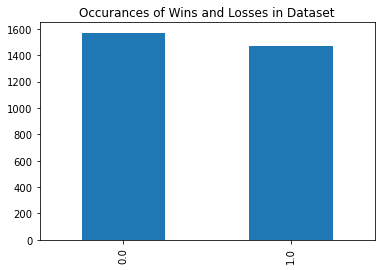

In [41]:
counts = final2['WL'].value_counts()
print(counts)
final2['WL'].value_counts().plot(kind='bar', title='Occurances of Wins and Losses in Dataset')


### 2.2 - Feature Heatmap
Even though it looks like a colorful mess, the heatmap below shows the correlation between two features, which are the statistics that I will feed into the algorithm to make predictions (each numerical column aside from 'WL' in the dataset is a feature). Higher numbers mean that there is a linear correlation between the two features. We can eliminate a feature if it has a high correlation score with another feature.

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

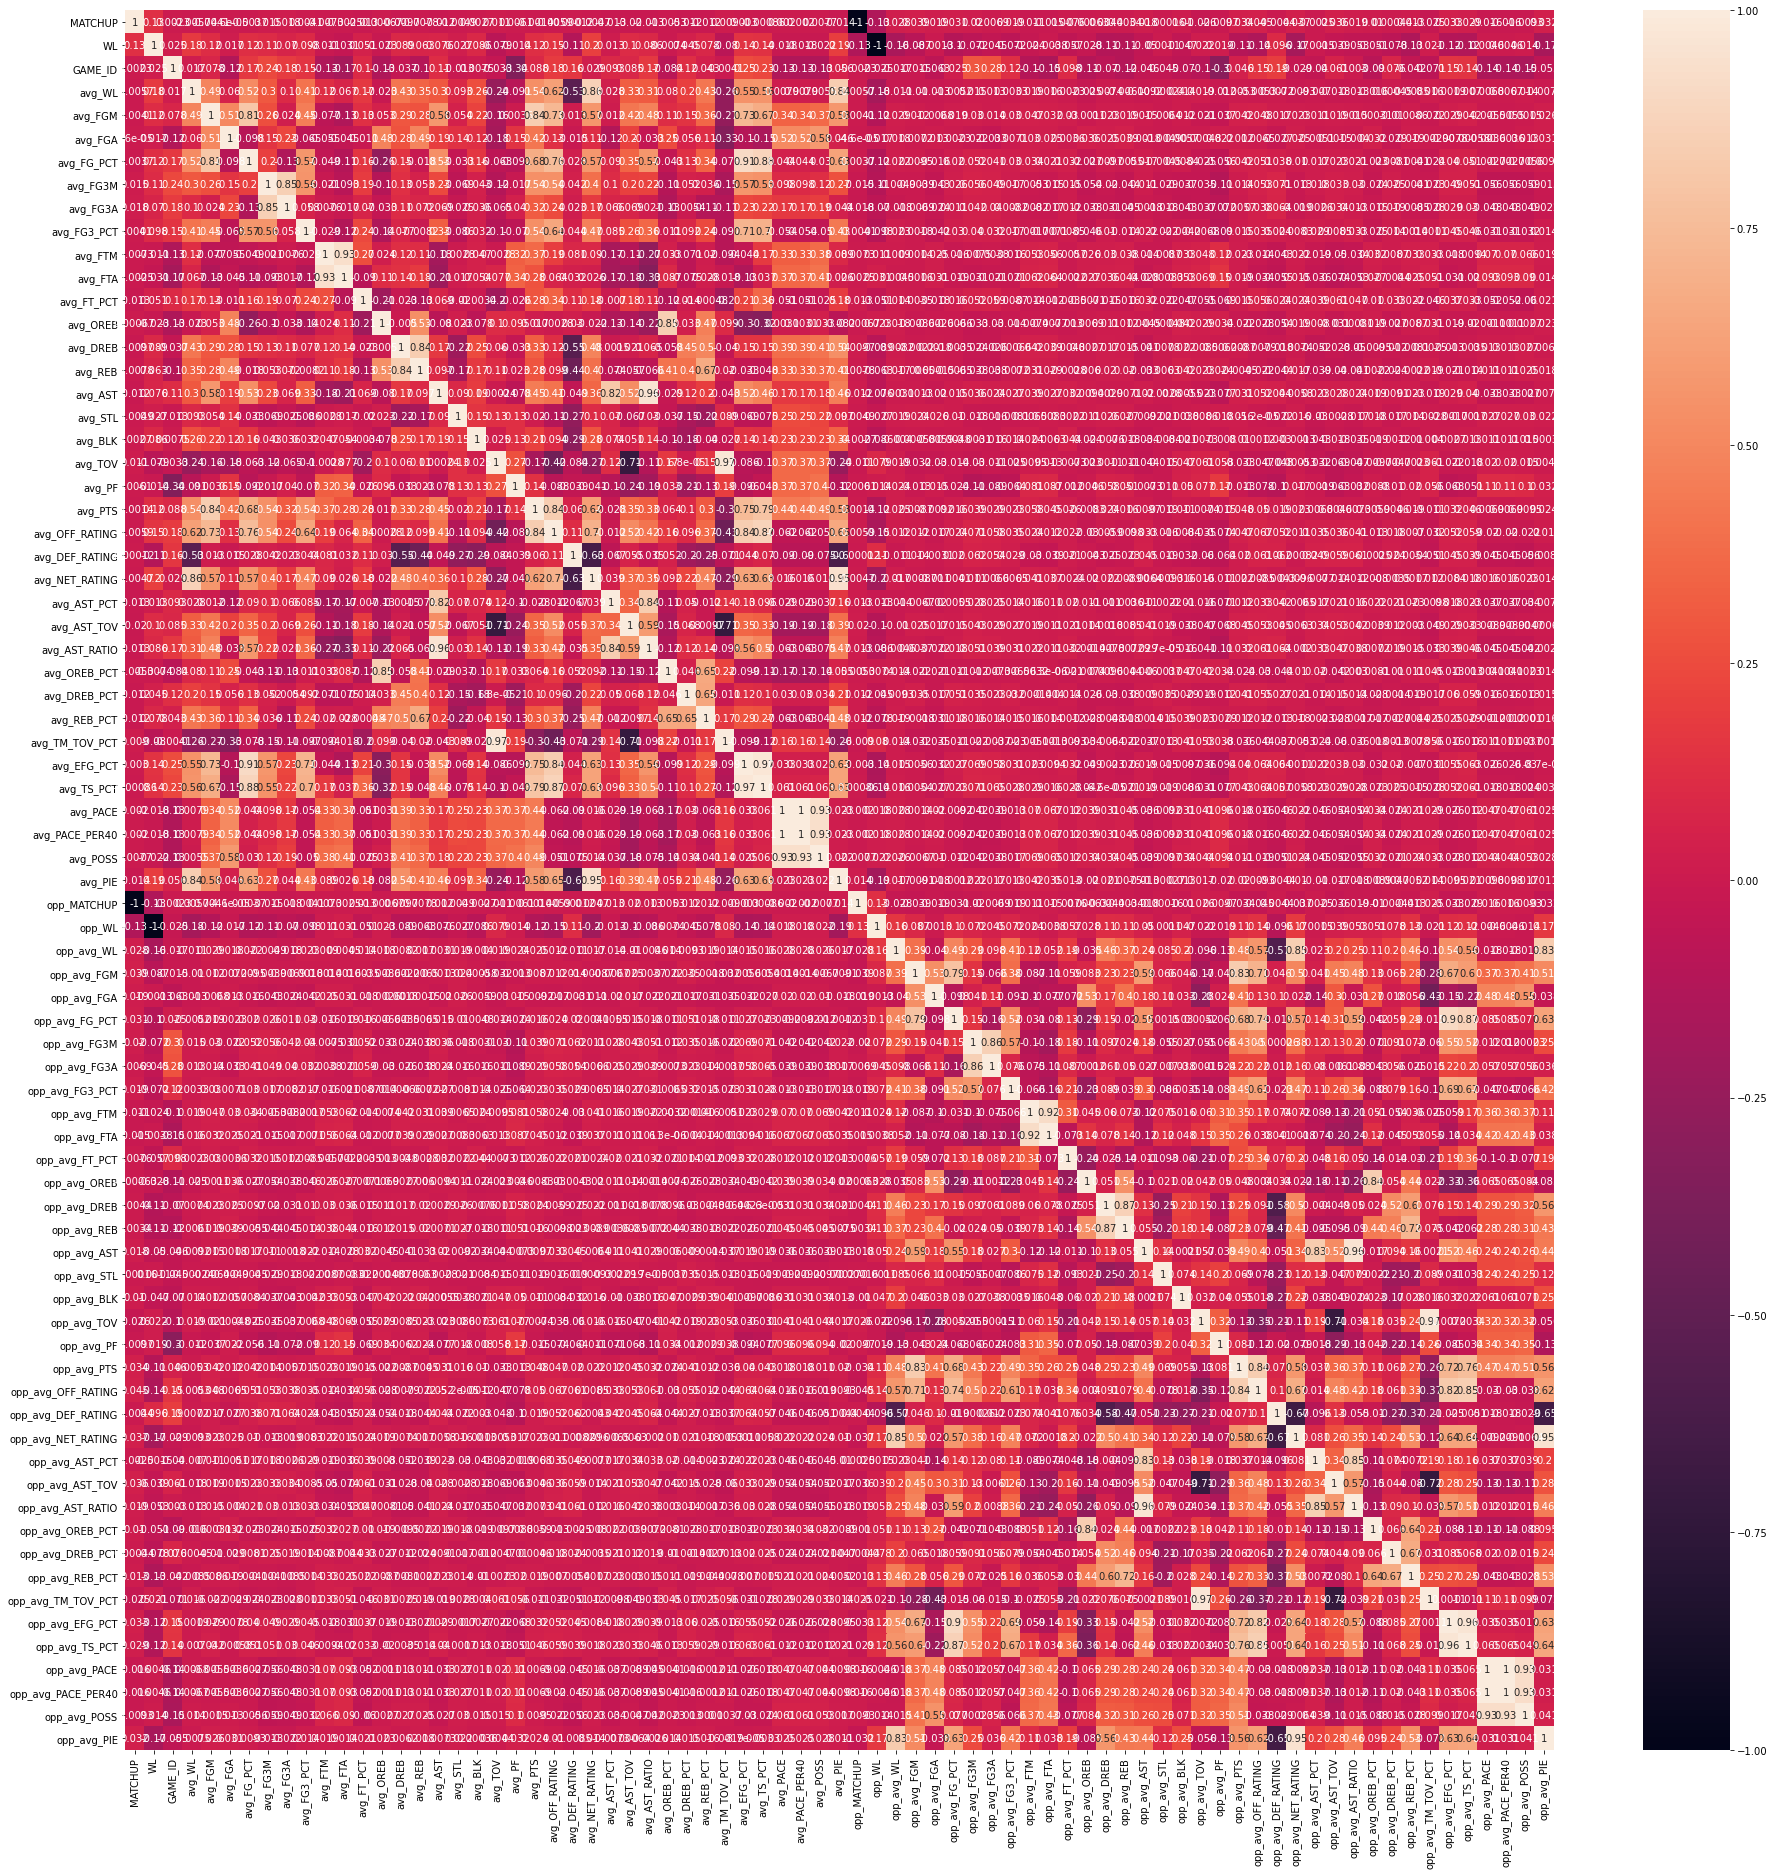

In [43]:
plt.figure(figsize = (32,32))
heatmap = sn.heatmap(final2.corr(), annot=True)

Since the heatmap is hard to see. I created a small function to print out the coordinates of all feature combinations with a correlation of 0.9 or higher. This way, I could begin eliminating similar features.

In [44]:
corr = final2.corr()
corr_list = []
corr_list2 = []
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            corr_list.append(str(i)+', '+str(j))

In [45]:
corr_list

['6, 32',
 '10, 11',
 '16, 27',
 '19, 31',
 '24, 37',
 '32, 33',
 '34, 35',
 '34, 36',
 '35, 36',
 '43, 69',
 '47, 48',
 '53, 64',
 '56, 68',
 '61, 74',
 '69, 70',
 '71, 72',
 '71, 73',
 '72, 73']

In [46]:
final2 = final2.drop(['GAME_DATE', 'GAME_ID', 'avg_FGA', 'avg_AST', 'avg_TOV', 'avg_FTA', 'avg_PACE', 'avg_POSS', 'avg_EFG_PCT'], axis=1)
final2 = final2.drop(['opp_avg_FGA', 'opp_avg_AST', 'opp_avg_TOV', 'opp_avg_FTA', 'opp_avg_PACE', 'opp_avg_POSS', 'opp_avg_EFG_PCT'], axis=1)
final2 = final2.drop(['opp_MATCHUP', 'opp_GAME_DATE', 'opp_WL'], axis=1)

### 2.3 - Feature Means and Bar Graphs
I grouped the data by wins or losses and I took the mean for each stat for wins and losses. In the script below, I calculated the % increase between the means for wins and losses. This way, I could find features with significant differences between wins and losses. I also plotted the means in bar graphs to make it easier to read.

A Few Notes on my Observations:
- Home Court Advantage: Being the home team does make a difference as the home team won 56.6% of their games
- The Net Rating (points scored per 100 possessions - points allowed per 100 possessions) of a team's past 7 games seems to be an important feature. Winning teams averaged a positive avg. Net Rating (that means they scored more points than they allowed per 100 possessions) while losing teams averaged a negative avg. Net Rating (they allowed more points per 100 possessions than they scored). Later on, we will see that Net Rating is an extremely important feature, and it might be something to look into when predicting games.

I created a list of features and added all features that had an absolute (negatives don't matter because I used absolute value) % increase greater than 1.5. I wanted to save this list for later and use the combination of these 20 when running models.

In [47]:
a_dict = {}
colslist = []
for cols in final2.columns:
    colslist.append(cols)
colslist.remove('WL')
summary_df = final2.groupby('WL').mean()
for cols in colslist:
    bar_chart_df = summary_df[[str(cols)]]
    a_dict[cols] = ((bar_chart_df.loc[1]-bar_chart_df.loc[0])/abs(bar_chart_df.loc[0]))*100
print(a_dict)

{'MATCHUP': MATCHUP    29.548174
dtype: float64, 'avg_WL': avg_WL    17.543814
dtype: float64, 'avg_FGM': avg_FGM    1.399943
dtype: float64, 'avg_FG_PCT': avg_FG_PCT    1.274931
dtype: float64, 'avg_FG3M': avg_FG3M    3.963796
dtype: float64, 'avg_FG3A': avg_FG3A    2.07303
dtype: float64, 'avg_FG3_PCT': avg_FG3_PCT    1.901008
dtype: float64, 'avg_FTM': avg_FTM   -0.361409
dtype: float64, 'avg_FT_PCT': avg_FT_PCT    0.613587
dtype: float64, 'avg_OREB': avg_OREB   -0.750757
dtype: float64, 'avg_DREB': avg_DREB    1.33792
dtype: float64, 'avg_REB': avg_REB    0.858698
dtype: float64, 'avg_STL': avg_STL    0.991002
dtype: float64, 'avg_BLK': avg_BLK    4.164236
dtype: float64, 'avg_PF': avg_PF   -0.298197
dtype: float64, 'avg_PTS': avg_PTS    1.398788
dtype: float64, 'avg_OFF_RATING': avg_OFF_RATING    1.544566
dtype: float64, 'avg_DEF_RATING': avg_DEF_RATING   -1.021871
dtype: float64, 'avg_NET_RATING': avg_NET_RATING    172.081025
dtype: float64, 'avg_AST_PCT': avg_AST_PCT    0.225927

In [1018]:
feat_list = []
for k, v in a_dict.items():
    if abs(float(v))>=1.5:
        feat_list.append(k)
print(feat_list)

['MATCHUP', 'avg_WL', 'avg_FG3M', 'avg_FG3A', 'avg_FG3_PCT', 'avg_BLK', 'avg_OFF_RATING', 'avg_NET_RATING', 'avg_AST_TOV', 'avg_AST_RATIO', 'avg_TM_TOV_PCT', 'avg_PIE', 'opp_avg_WL', 'opp_avg_FG3M', 'opp_avg_DREB', 'opp_avg_REB', 'opp_avg_BLK', 'opp_avg_NET_RATING', 'opp_avg_AST_TOV', 'opp_avg_PIE']


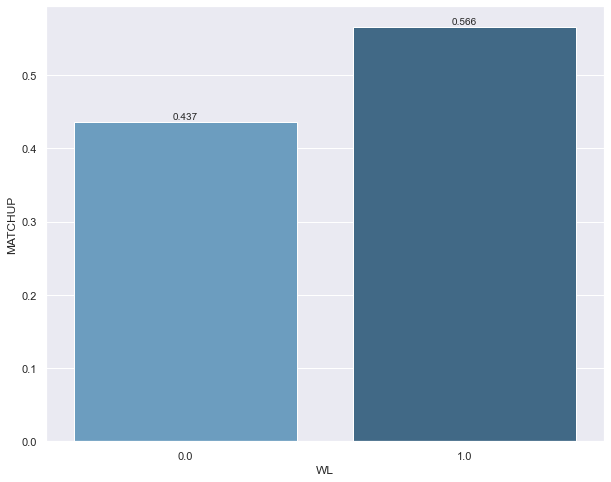

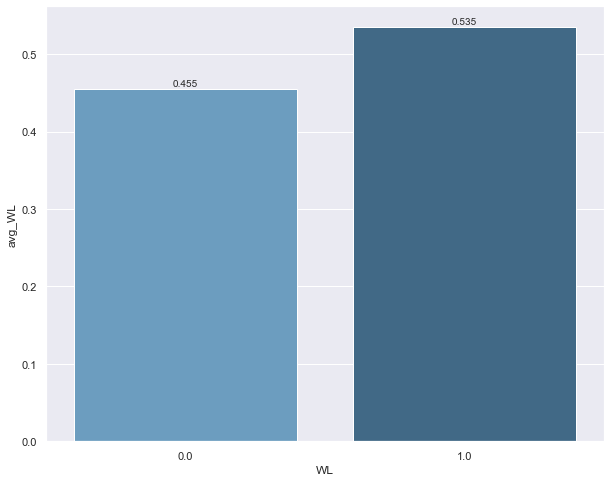

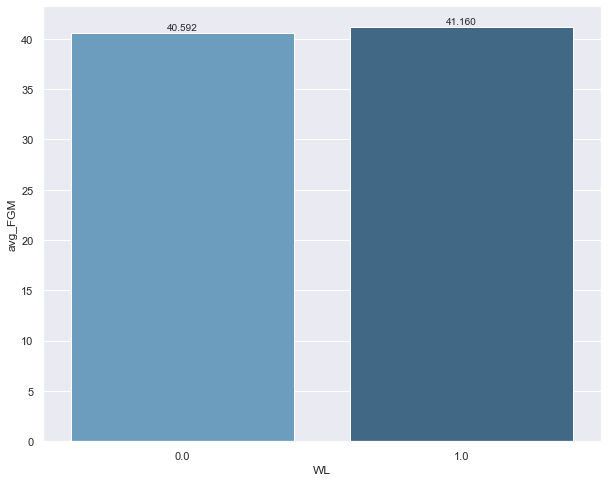

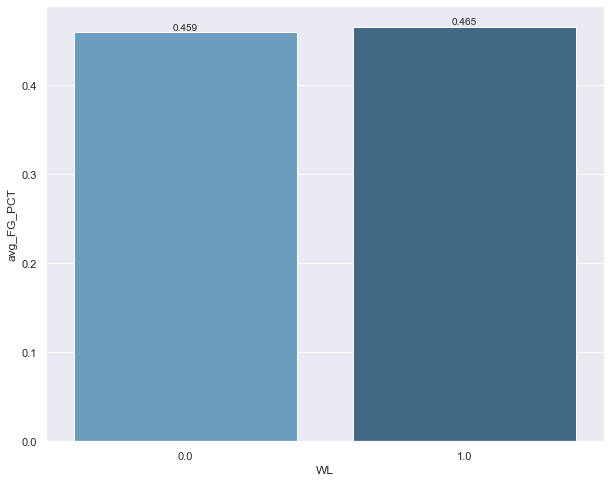

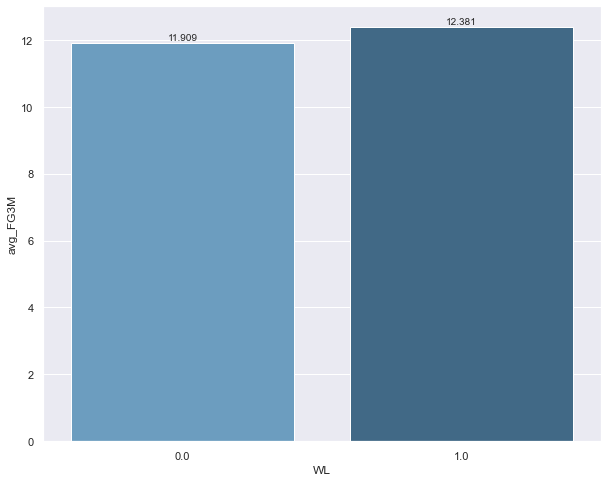

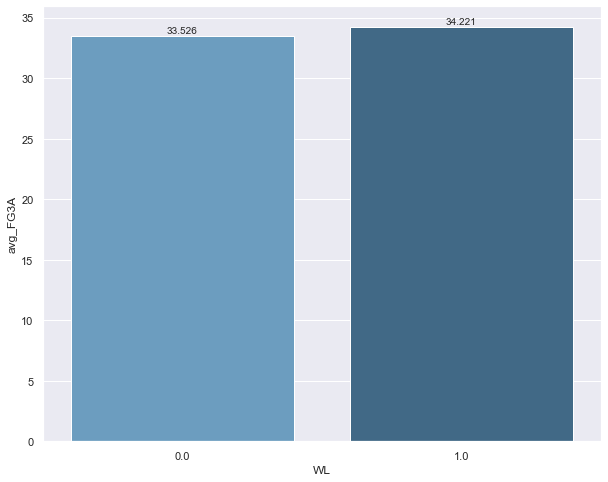

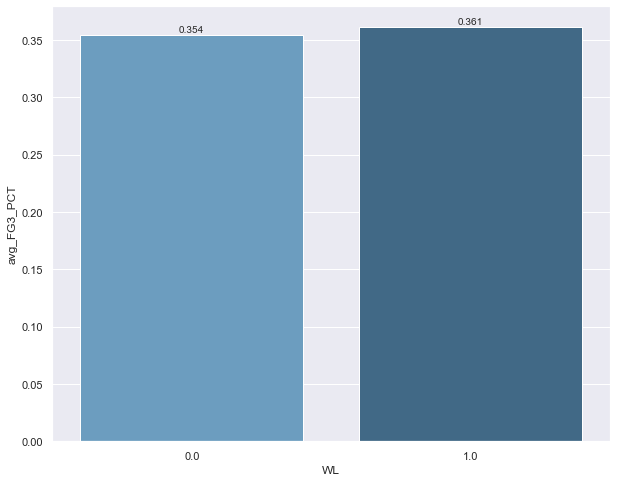

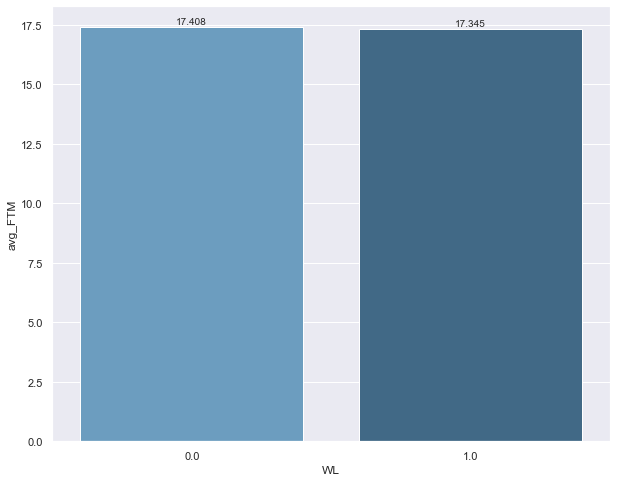

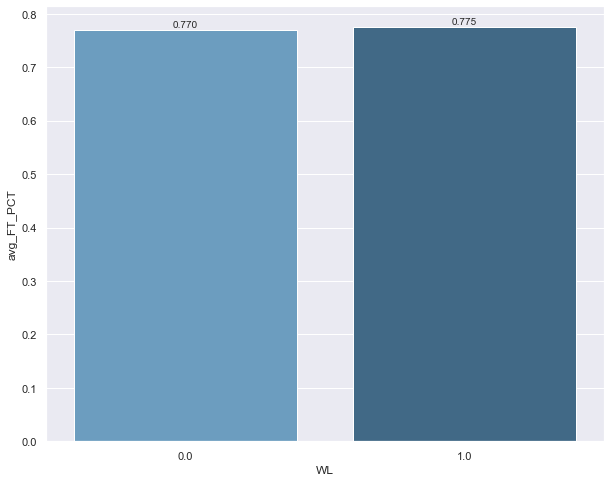

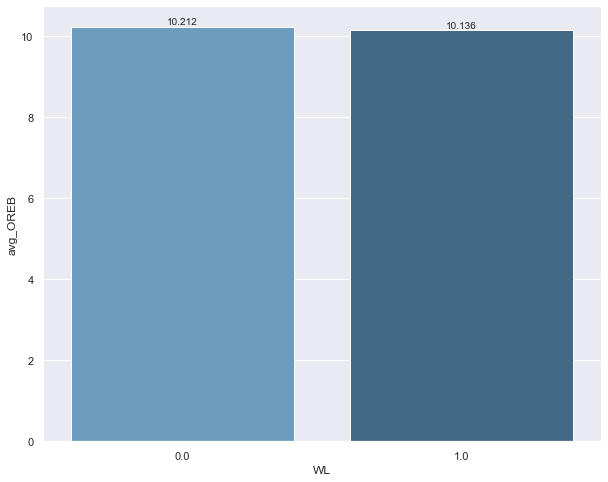

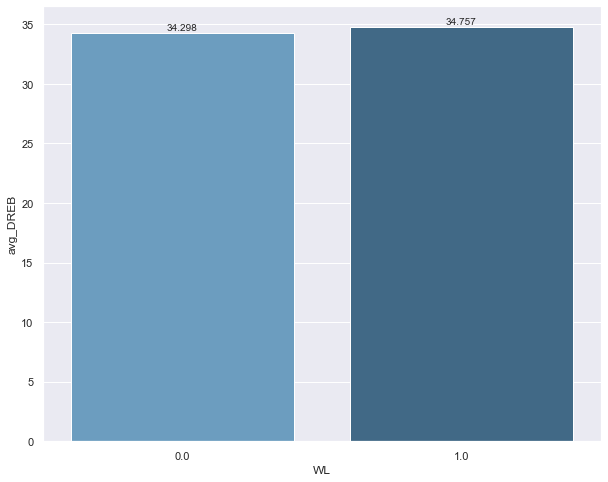

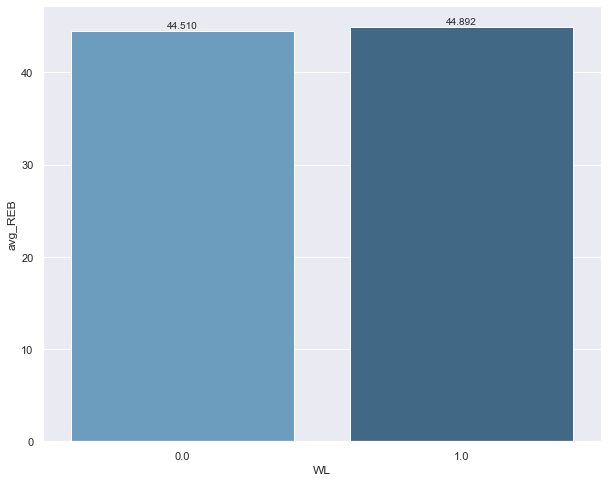

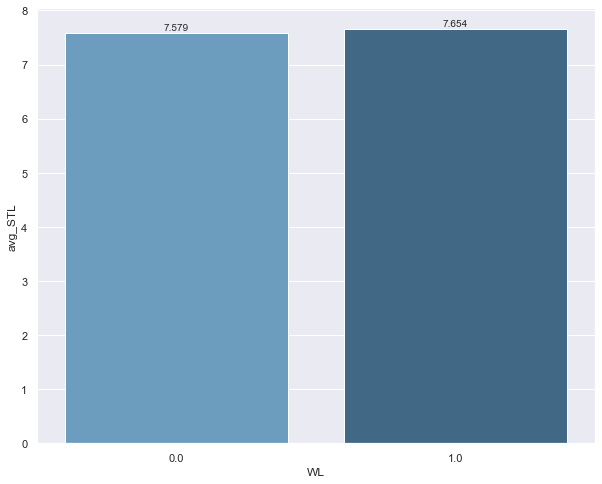

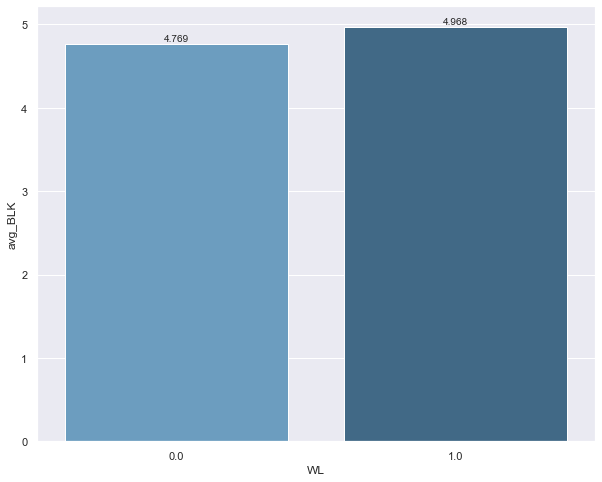

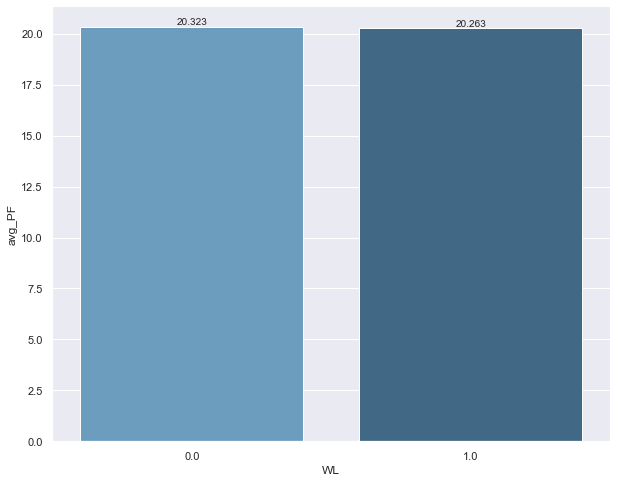

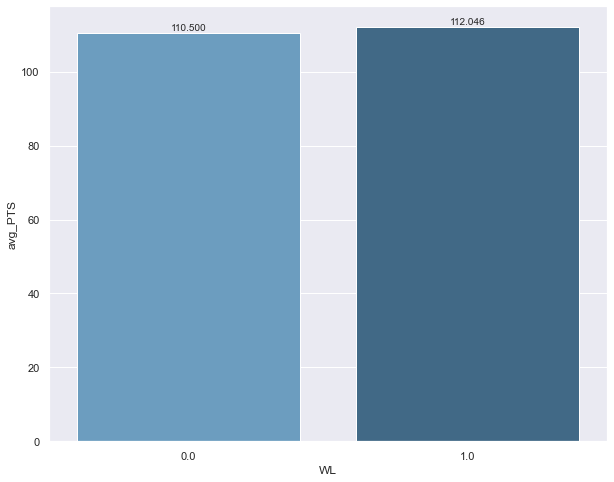

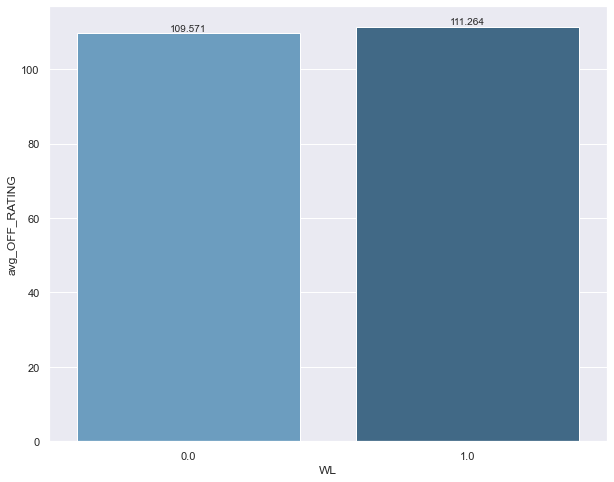

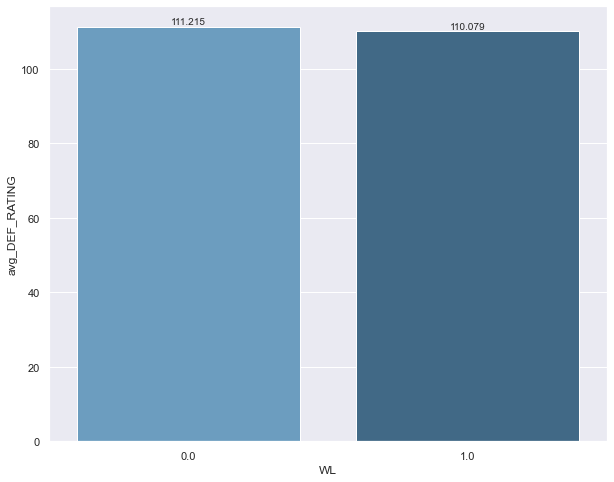

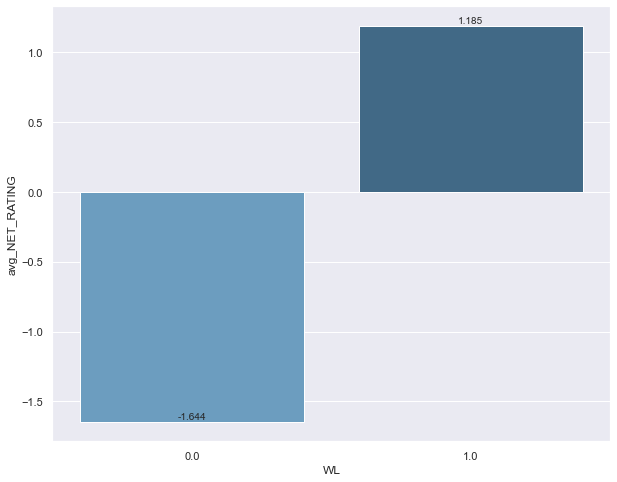

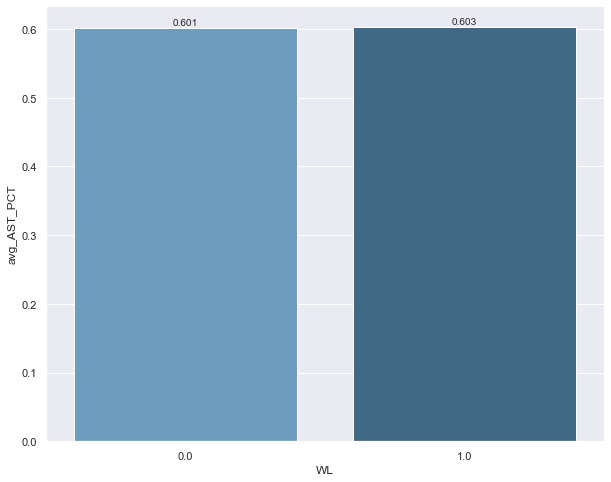

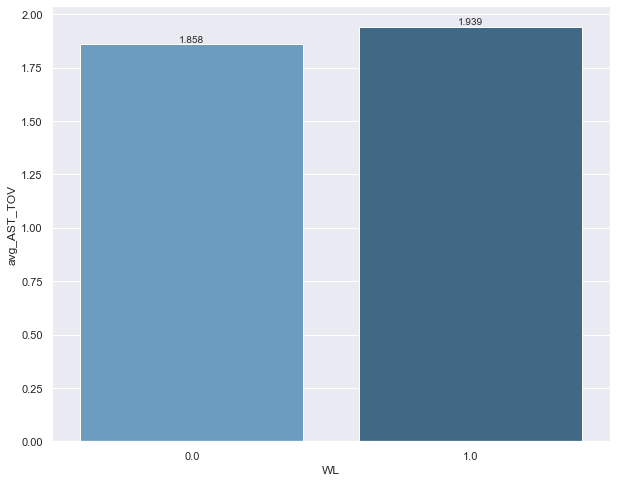

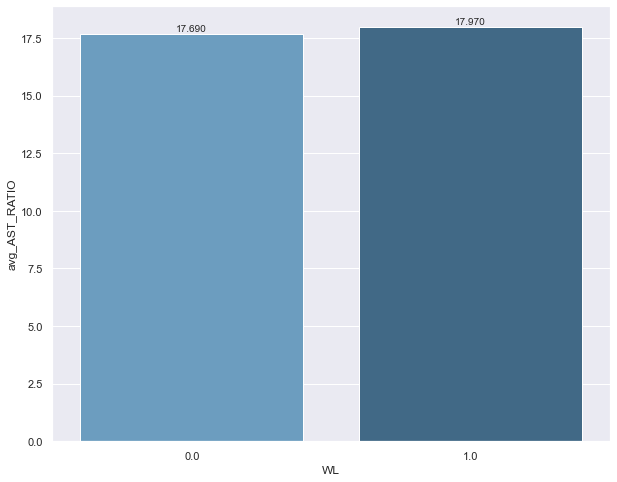

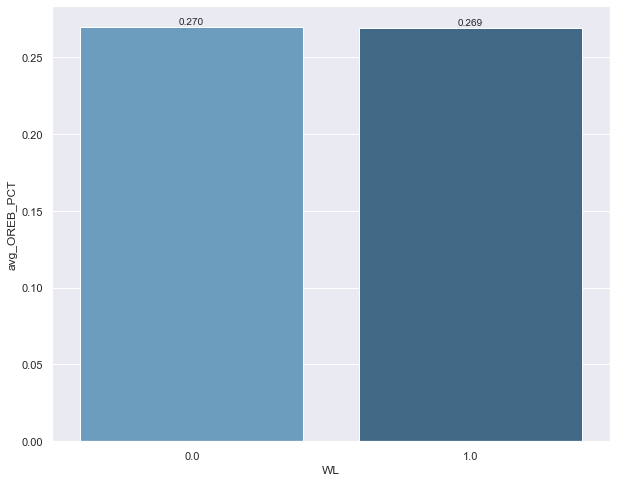

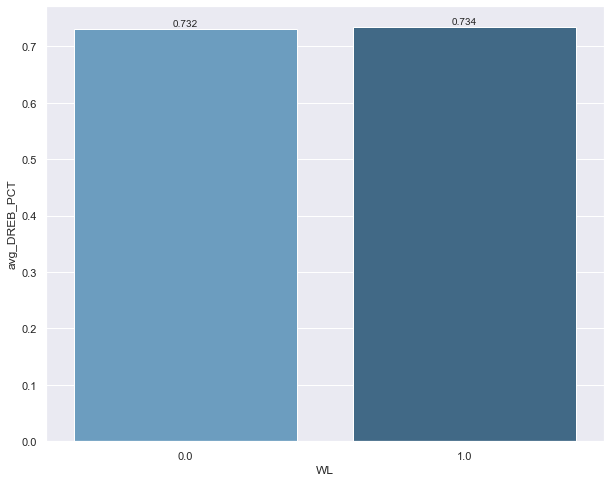

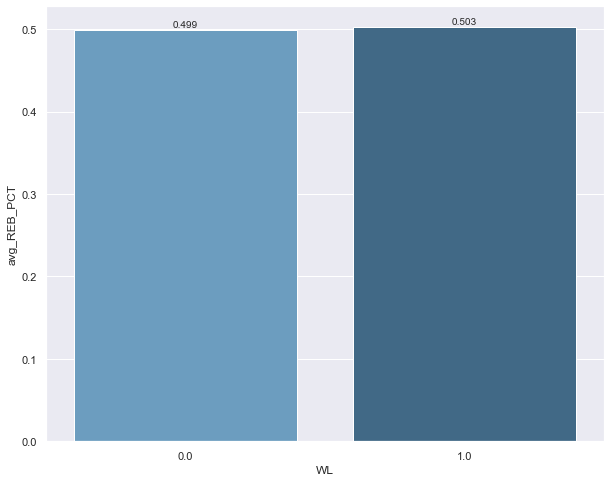

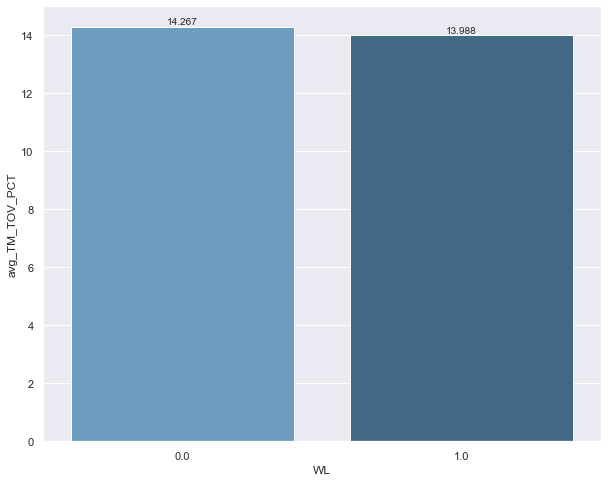

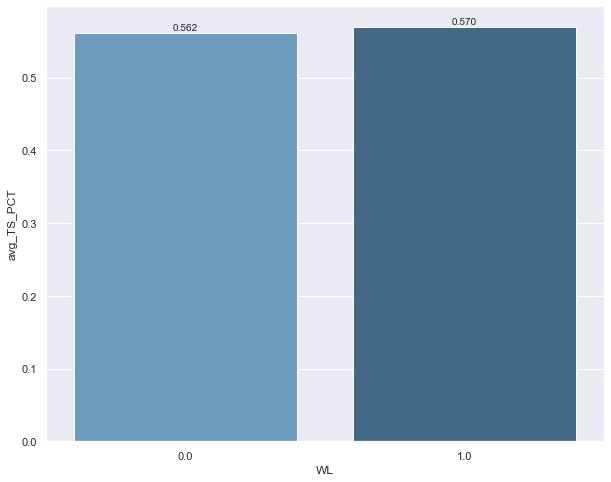

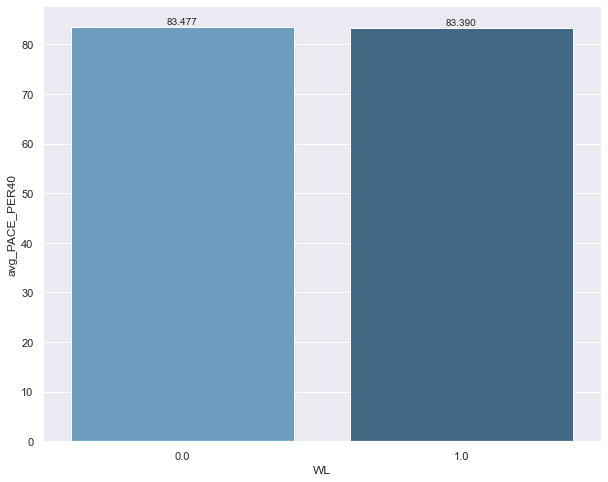

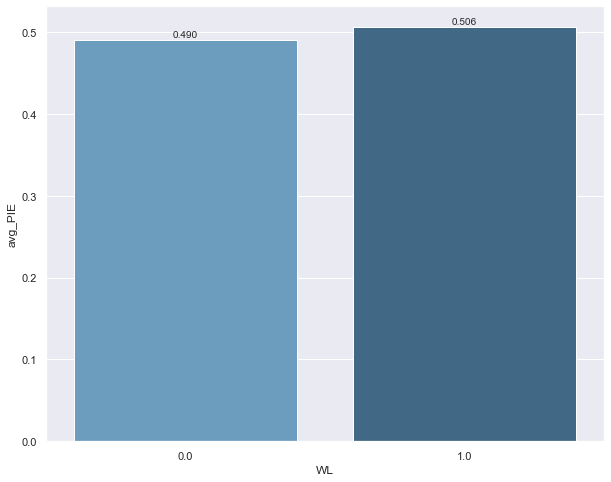

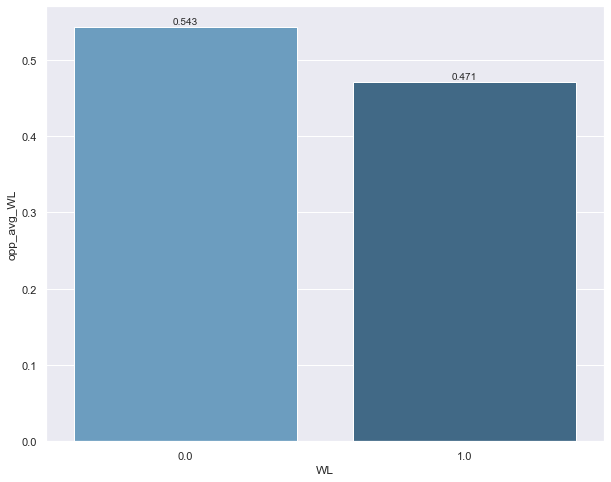

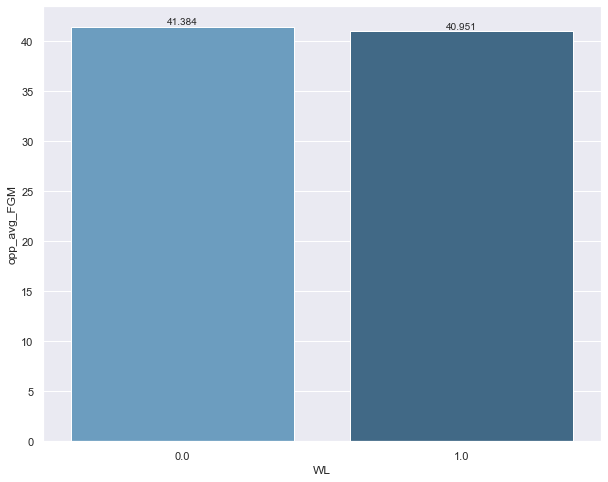

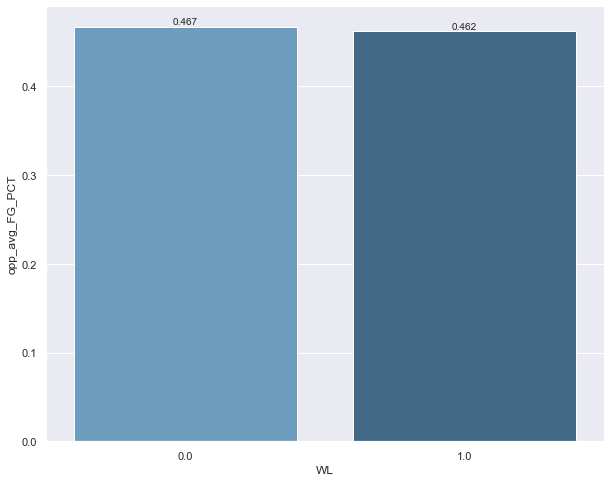

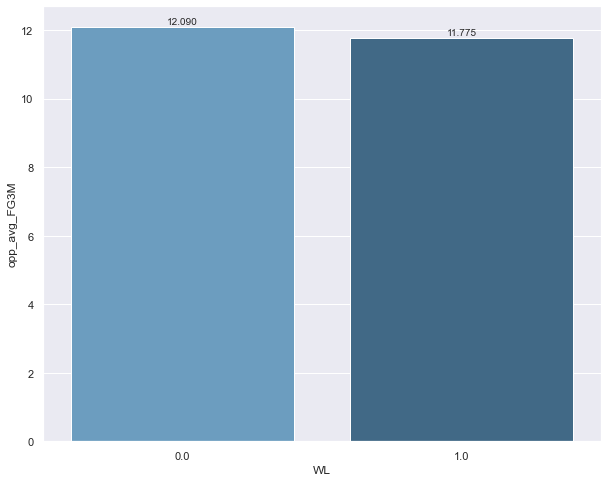

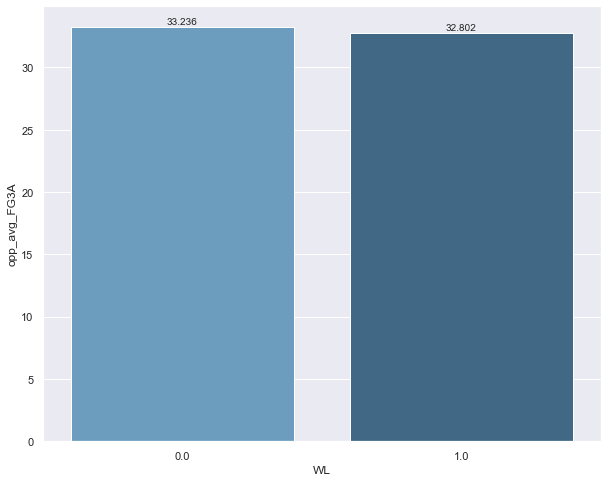

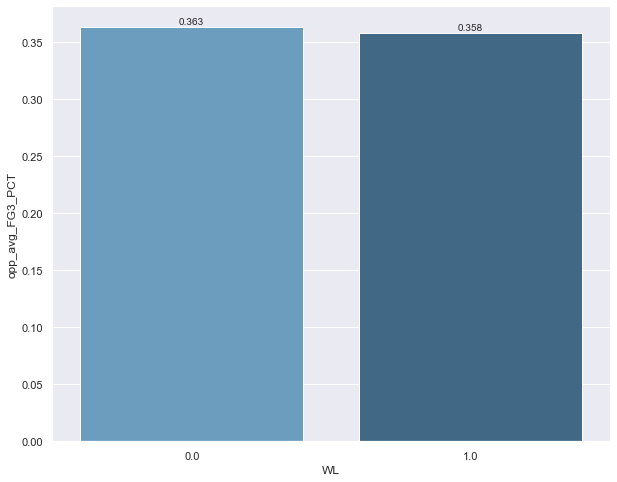

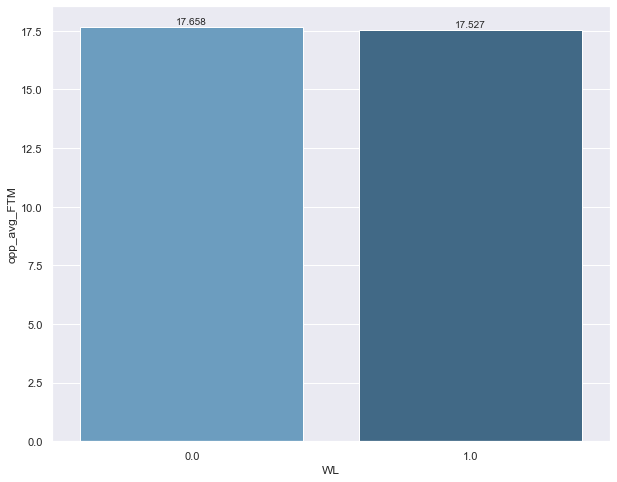

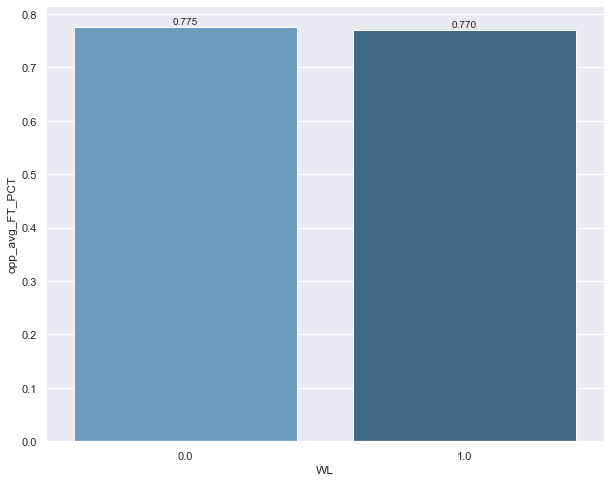

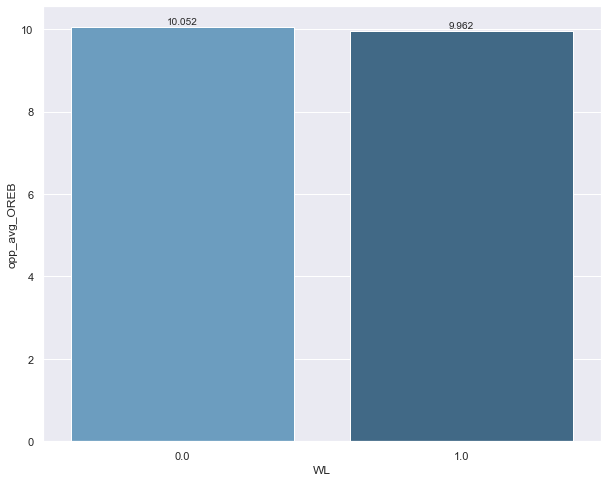

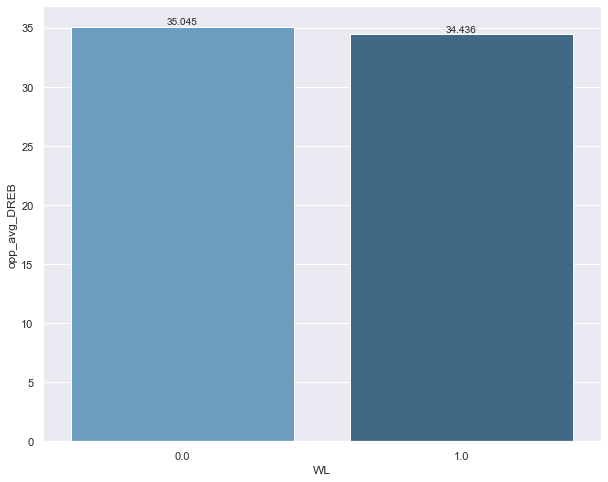

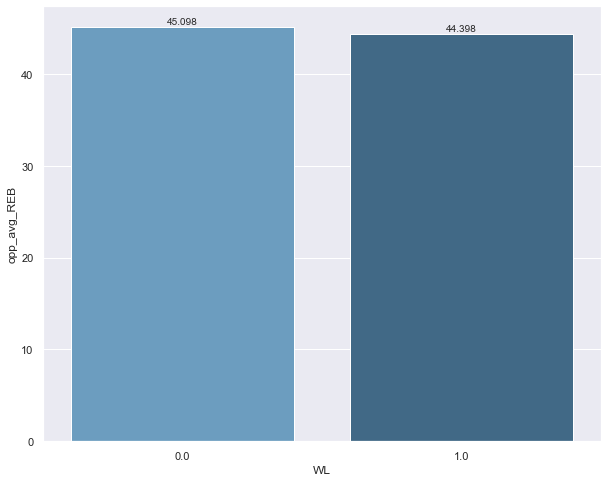

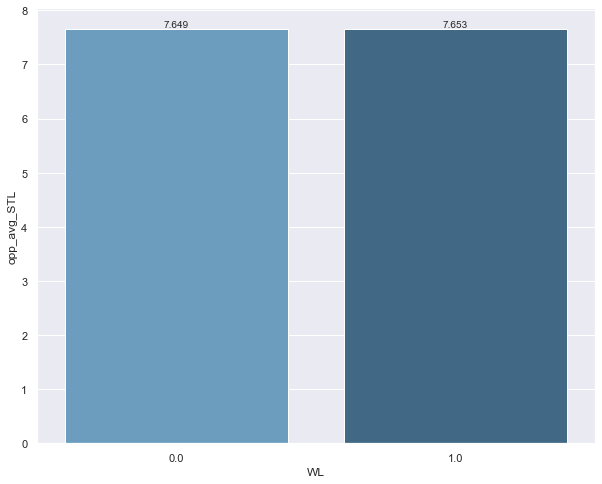

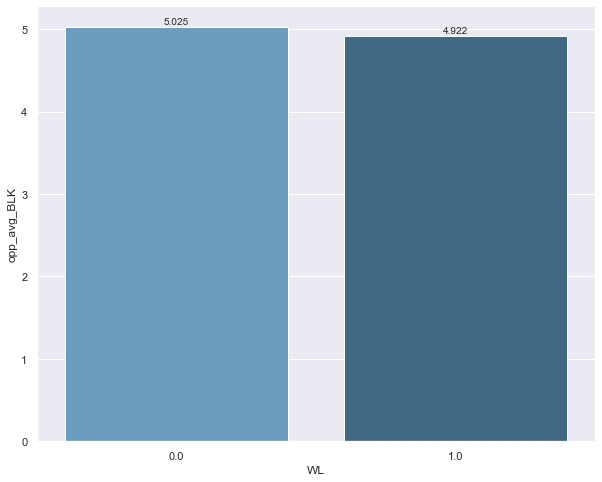

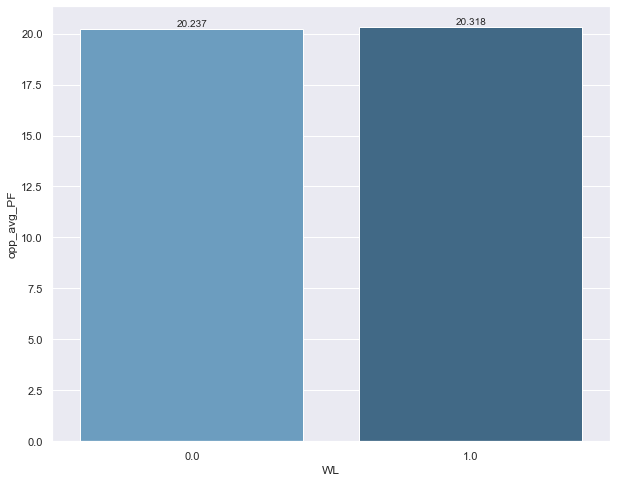

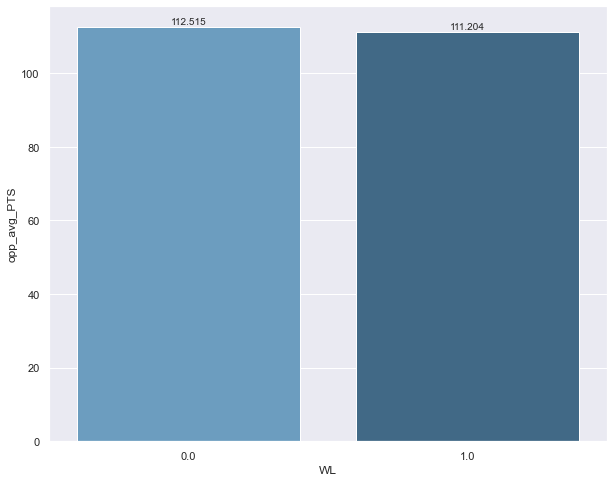

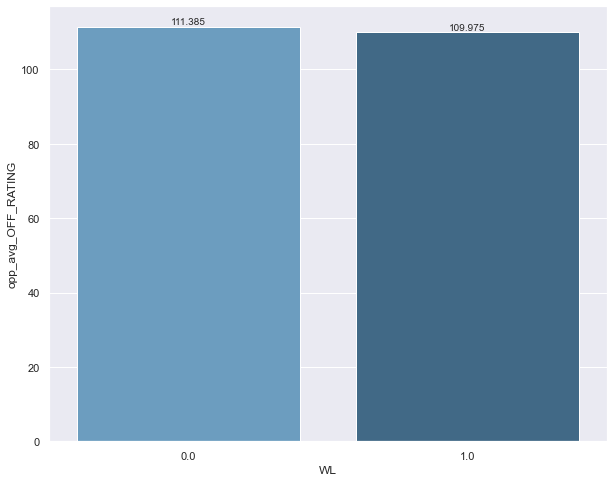

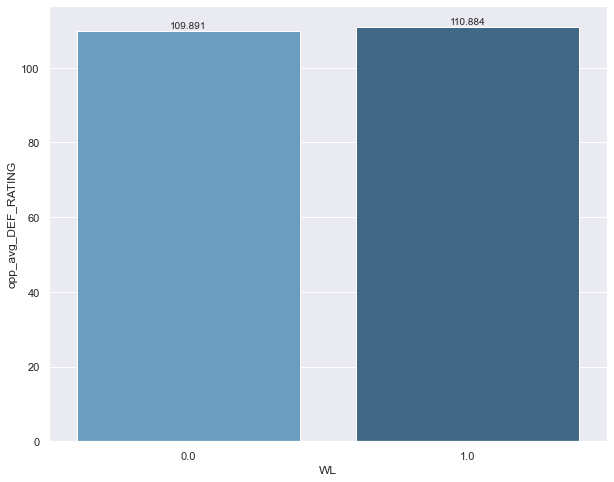

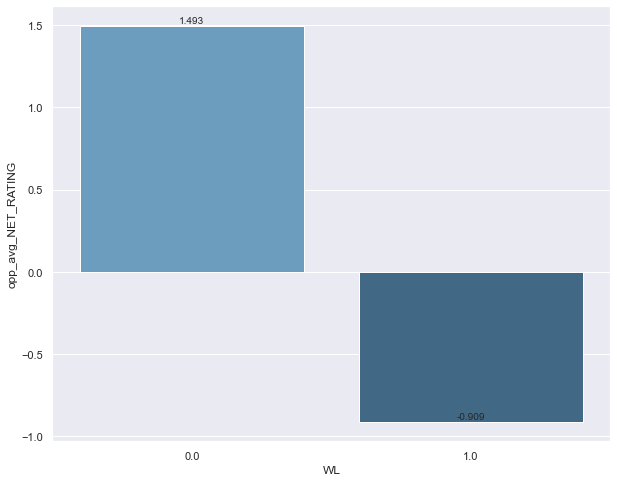

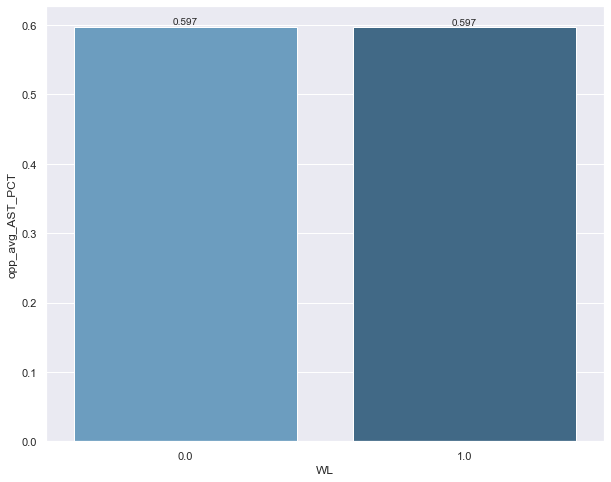

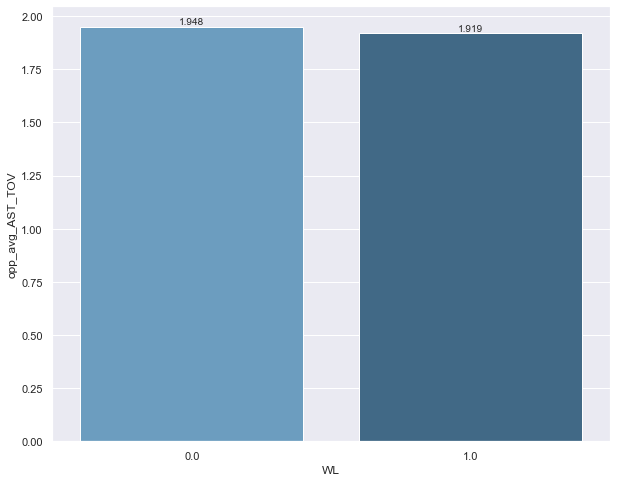

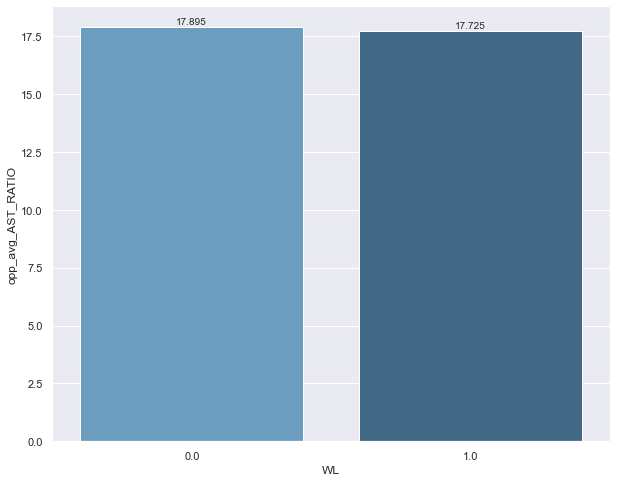

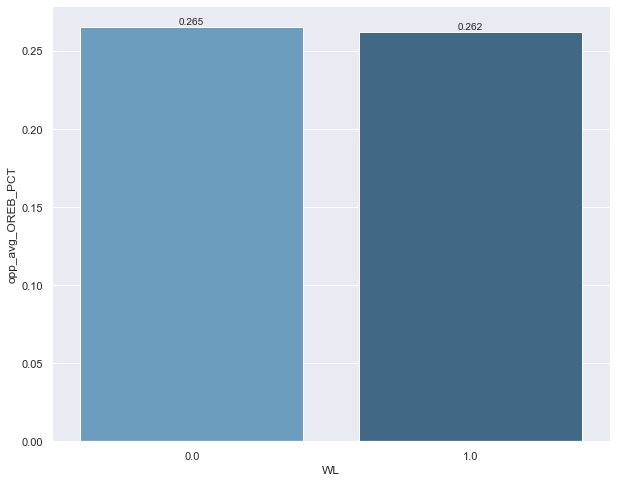

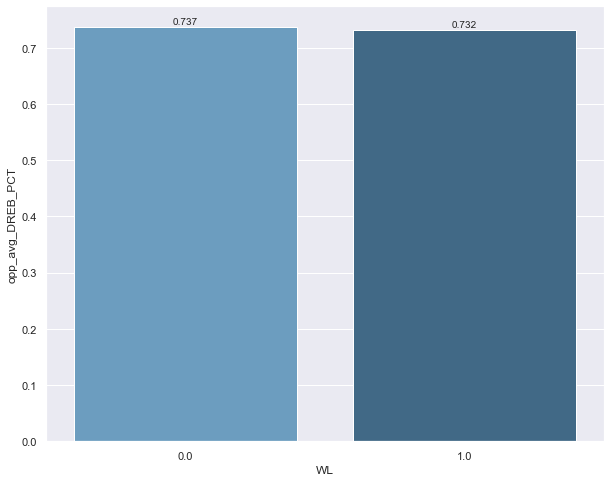

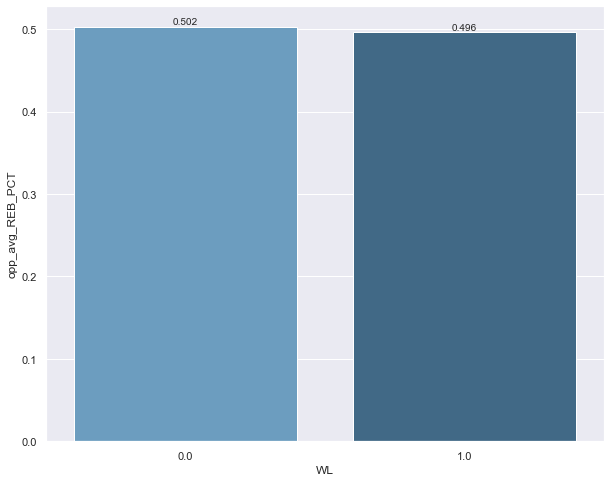

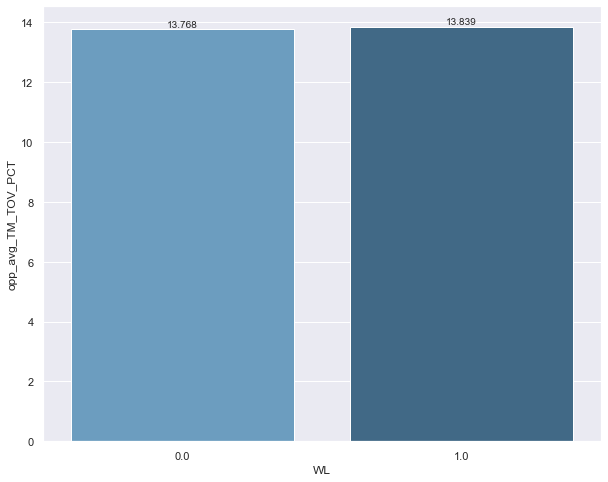

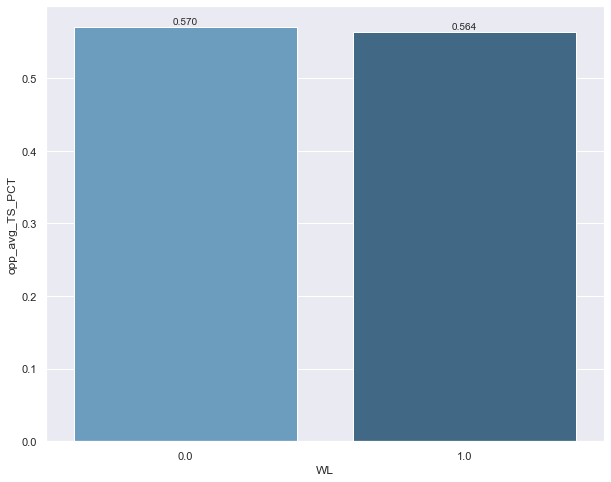

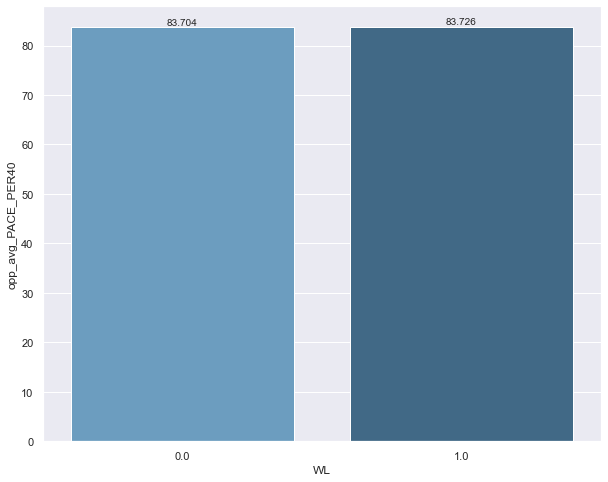

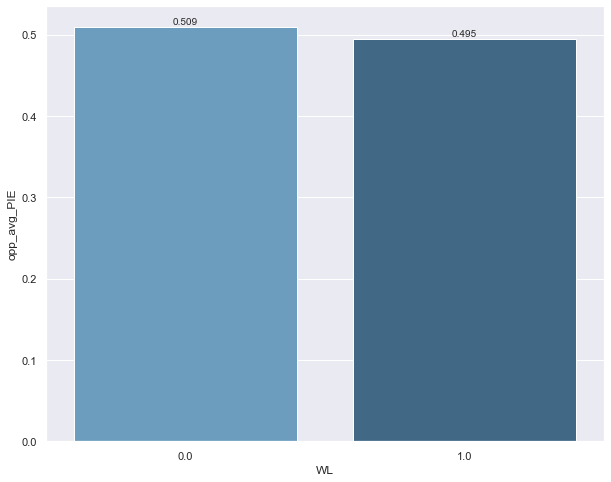

In [50]:
summary_df = final2.groupby('WL').mean()
sn.set_theme(style="whitegrid")
sn.set(rc = {'figure.figsize':(10,8)})
for cols in colslist:
    plots = sn.barplot(x='WL', y=cols, data=final2, ci=None, palette="Blues_d")
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.3f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=10, xytext=(0, 5), textcoords='offset points')
    plt.show()

### 2.4 - Strip Plots
To visualize my data even more, I created strip plots for each feature to compare the density of data points for wins and losses. While these plots were not as insightful as my barplots or my histogram, they still provided some useful insight into the distribution of data points for each feature.

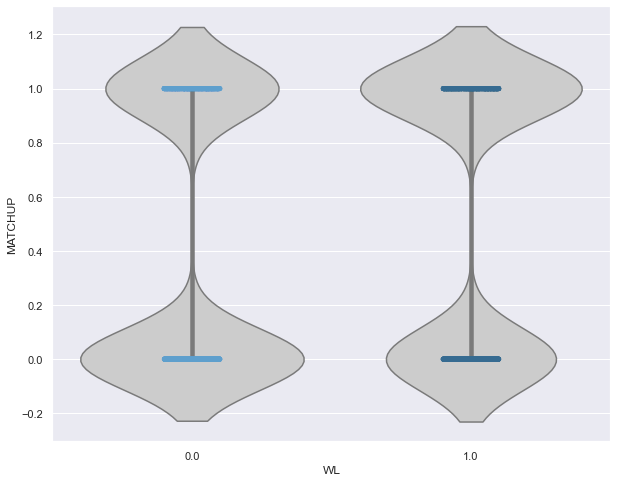

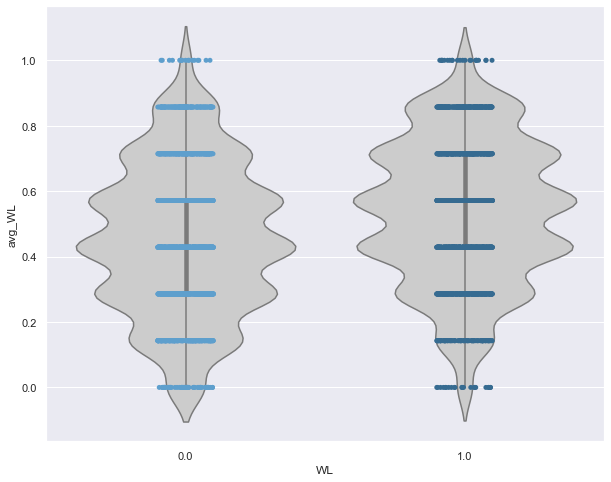

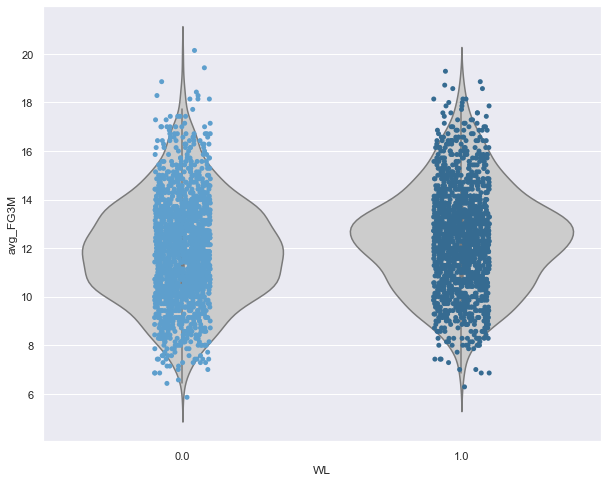

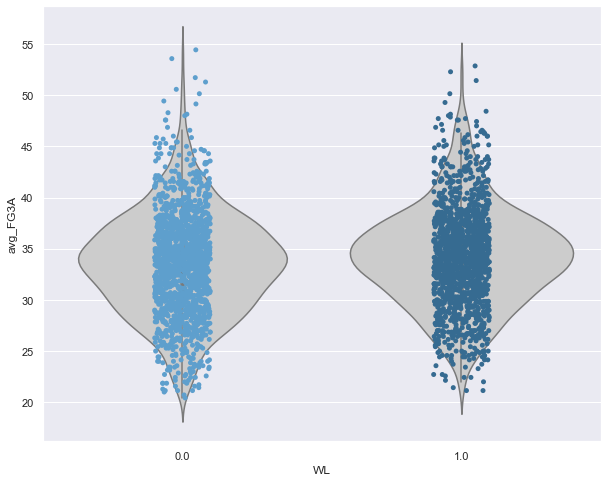

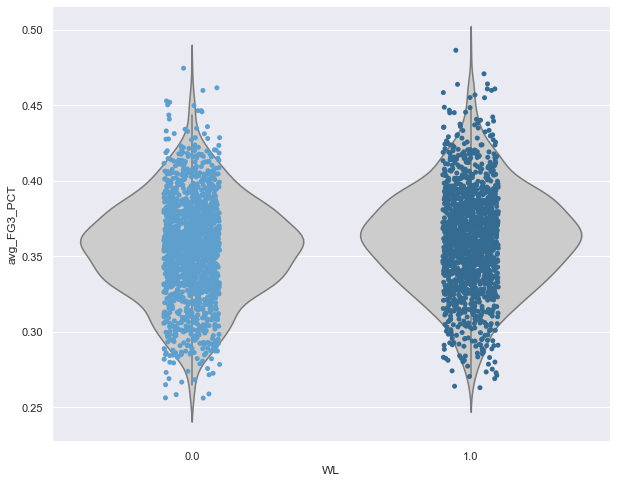

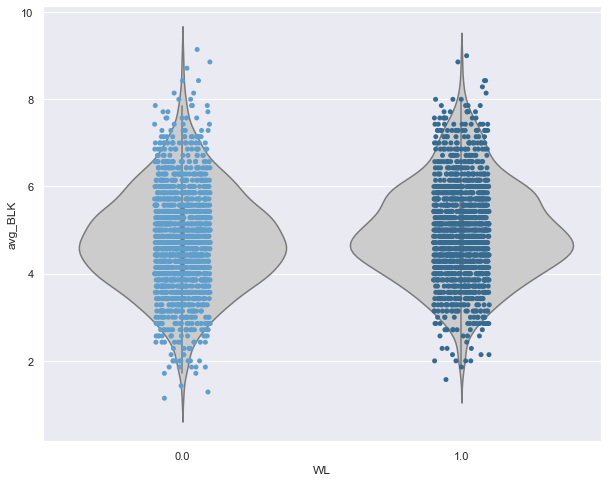

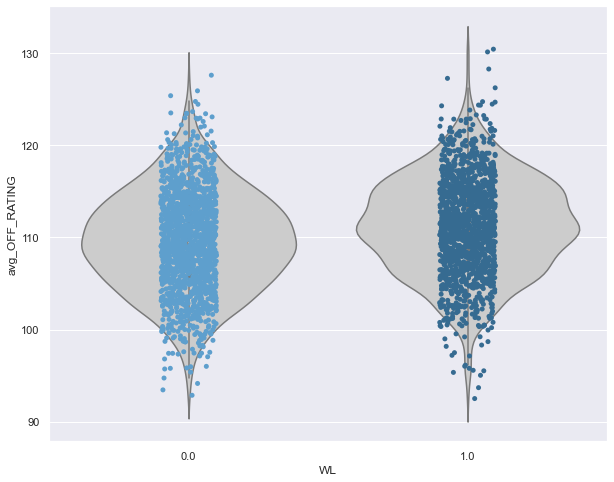

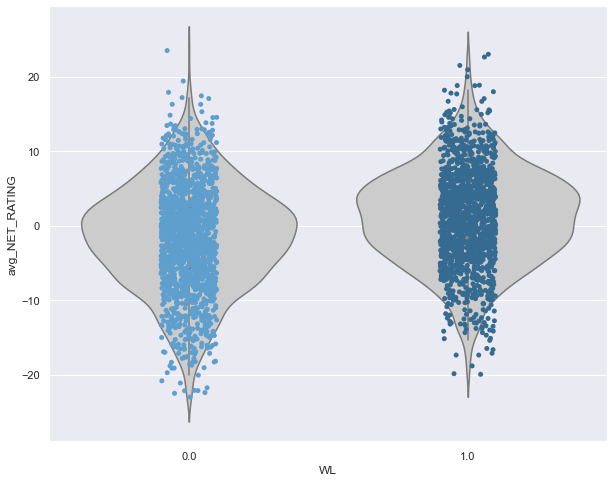

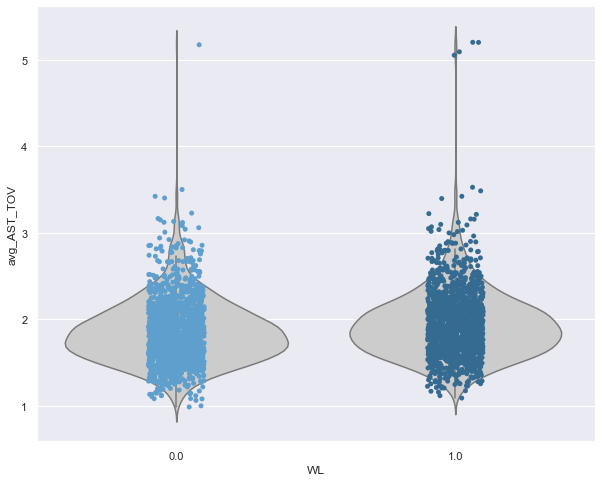

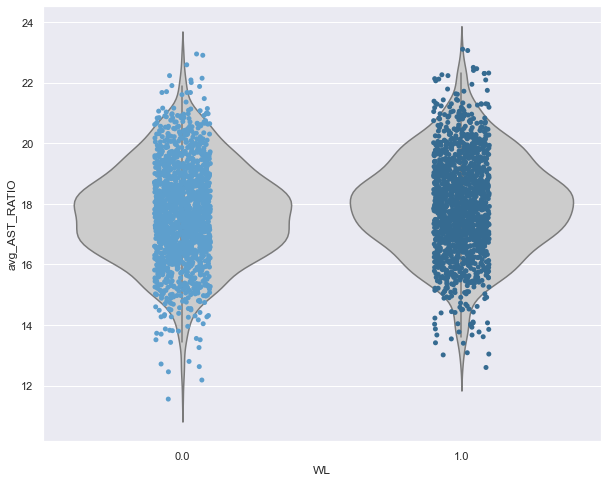

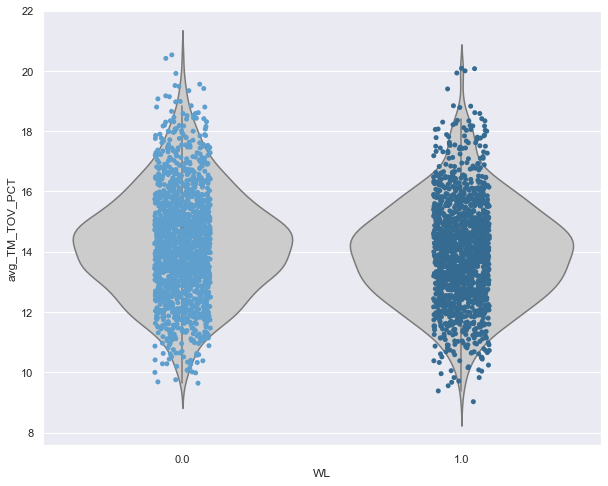

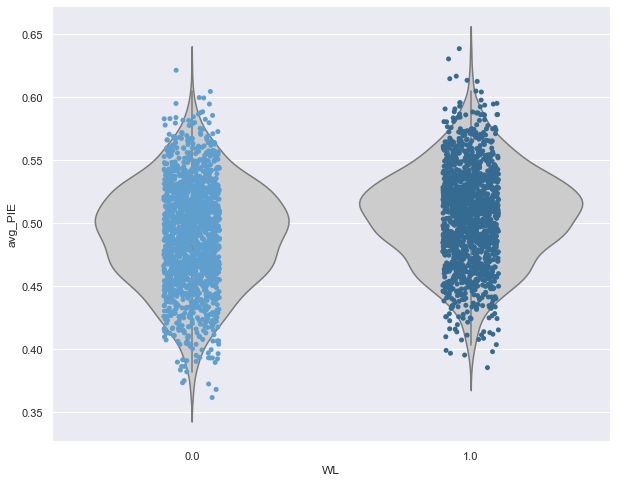

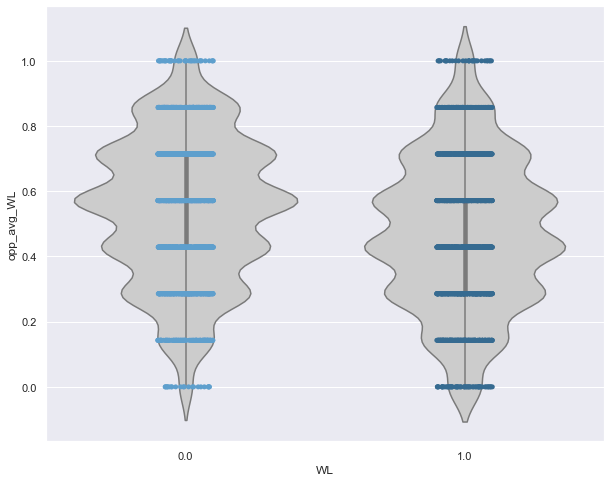

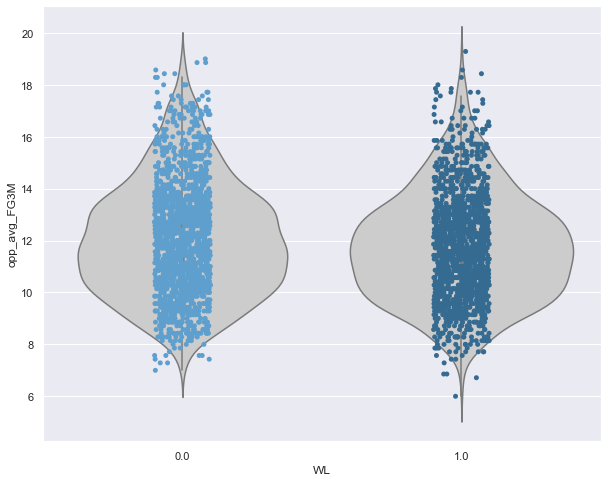

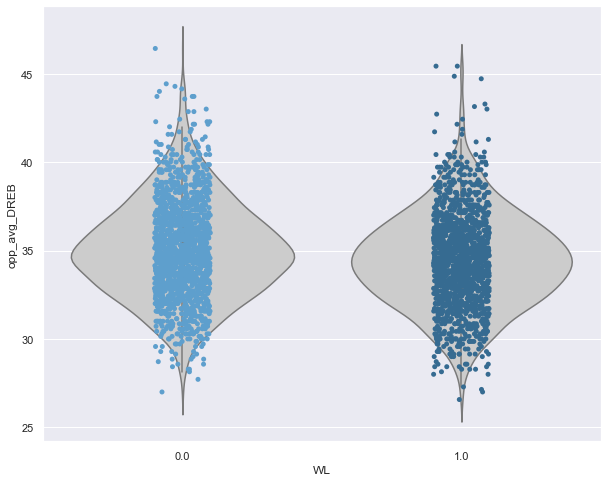

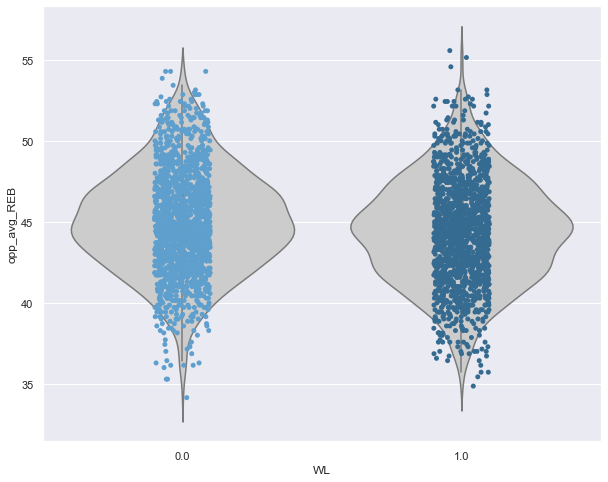

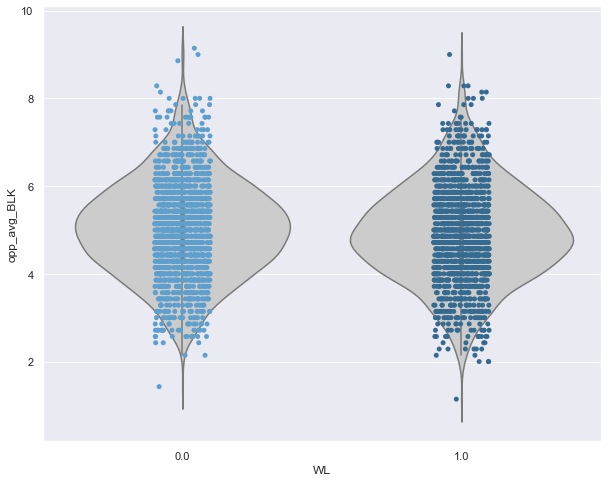

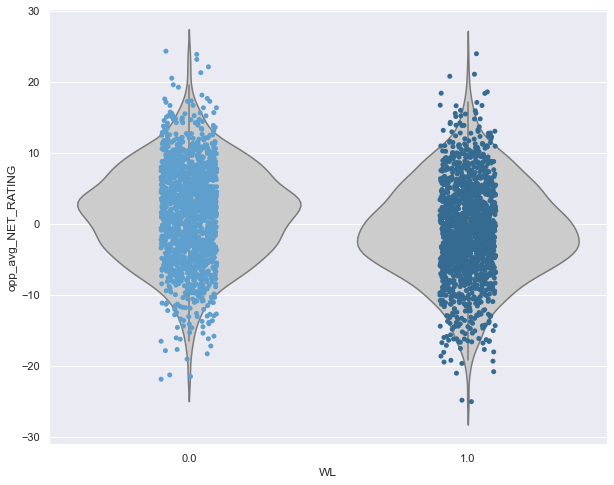

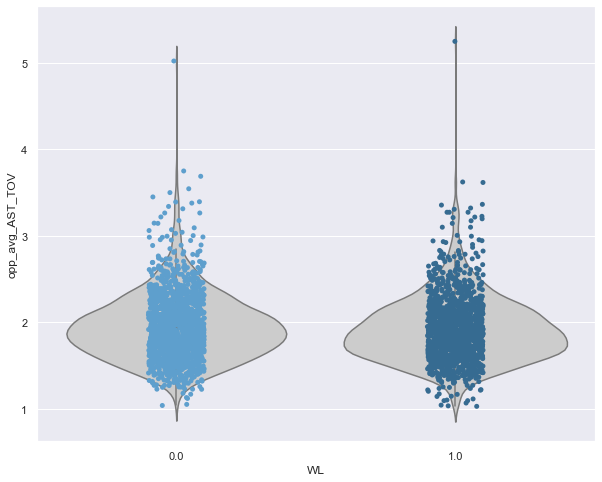

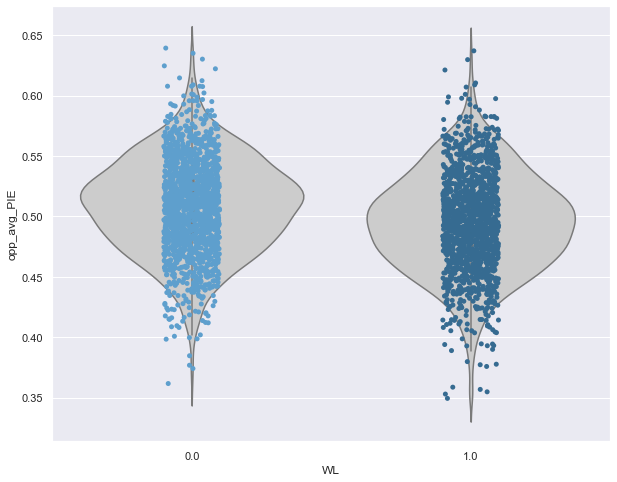

In [52]:
for parts in feat_list:
    sn.violinplot(x="WL", y=parts, data=final2, color="0.8")
    sn.stripplot(x='WL', y=parts, data=final2, jitter=True, palette="Blues_d")
    plt.show()

### 2.5 Histograms for Top 20 Features
I took the features in the top 20 list that I mentioned in secion 2.3 to create histograms. This was a much better (and more aesthetically pleasing in my opinion) way to see the distribution of features for wins and losses. By looking at the plots, we can see that the distribution of data in features such as 'avg_NET_RATING' and 'avg_PIE' is wildly different.

In [54]:
final2.shape

(3040, 58)

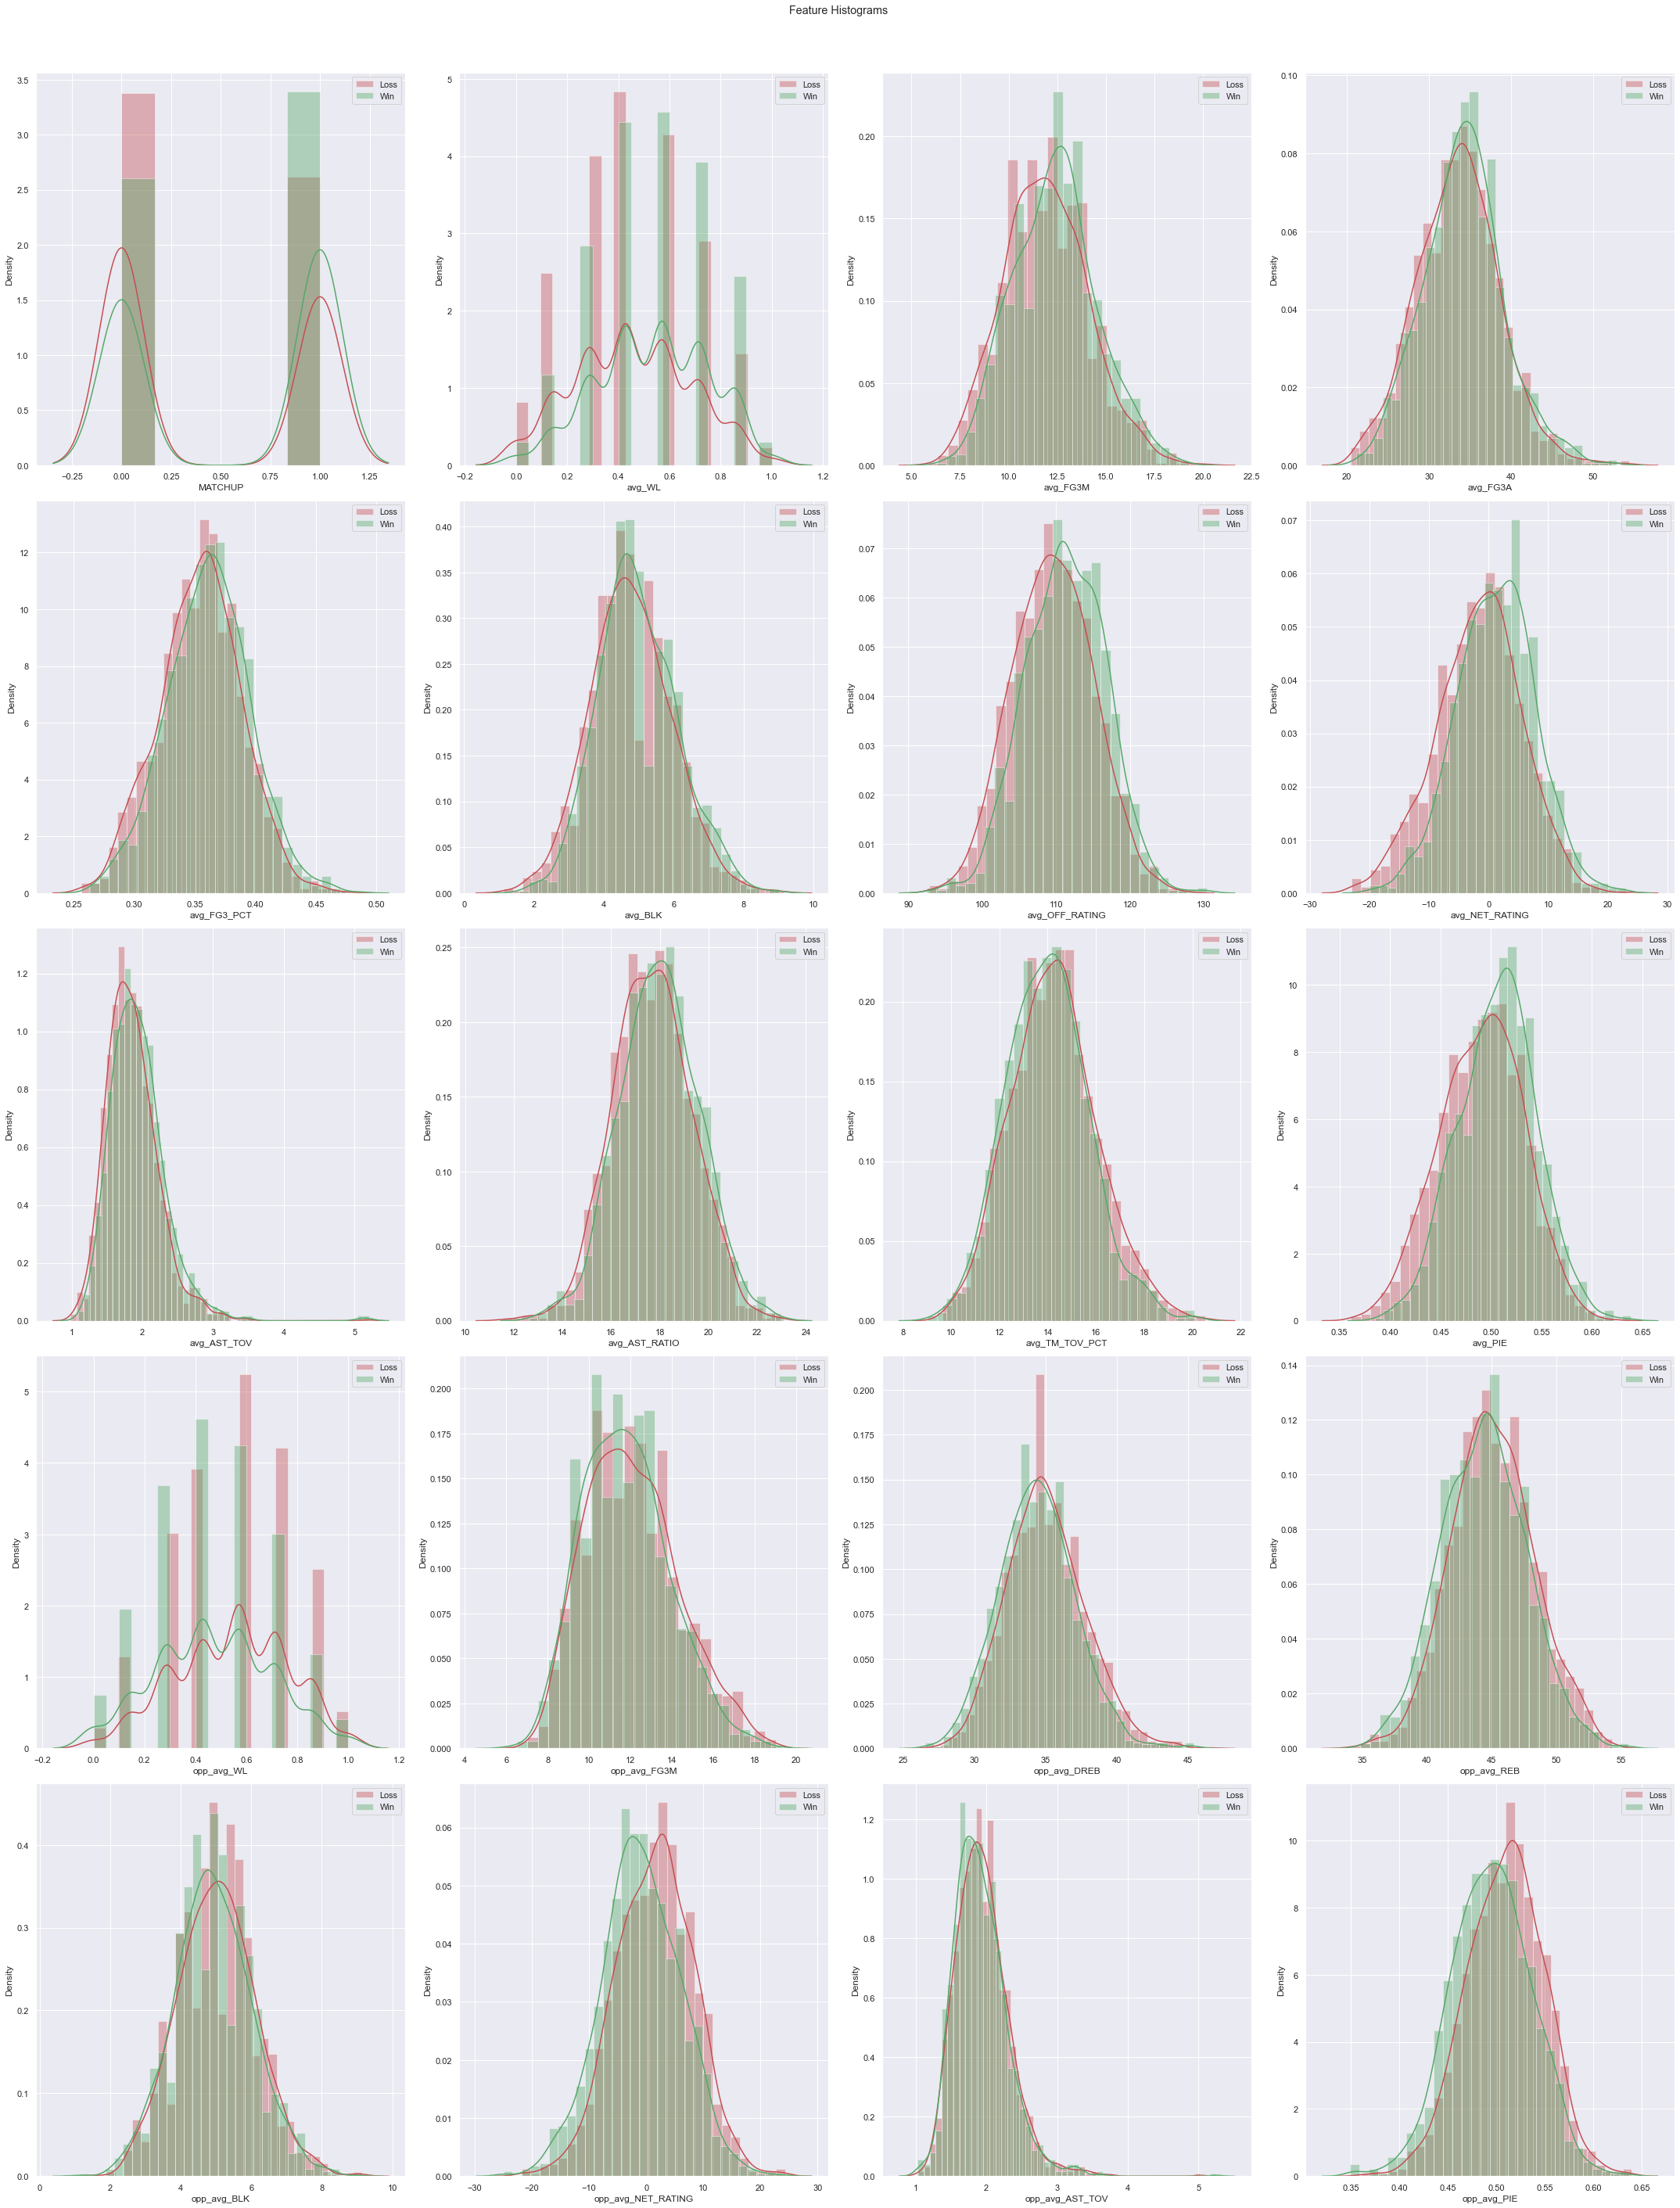

In [55]:
fig = plt.figure(figsize = (30, 40))
j = 0
for i in feat_list:
    plt.subplot(5, 4, j+1)
    j += 1
    sn.distplot(final2[i][final2['WL']==0], color='r', label = 'Loss')
    sn.distplot(final2[i][final2['WL']==1], color='g', label = 'Win')
    plt.legend(loc='best')
fig.suptitle('Feature Histograms ')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

### 2.5 Feature Importance Plots with Various Classifiers
I finally finished off my data analysis with feature importance plots. I imported various algorithms such as RandomForestClassifier, DecisionTreeClassifier, and SelectKBest to see what it thought the 10 most important features were. There was a lot of overlap between the three and the DecisionTree and RandomForest classifiers seemed to view 'avg_NET_RATING' as the most important feature. I could not graph the SelectKBest feature importance list, but it found 'avg_WL', 'avg_NET_RATING', 'avg_PIE', 'opp_avg_NET_RATING', and 'opp_avg_PIE'as the most important features.

I then created two lists of feature cominations. One that used the 5 features mentioned above along with home vs. away, and one that had a combination of the most important features from the RandomForest and DecisionTree classifiers. These two feature combinations along with the top 20 list that I created in 2.3 became the three combinations of features that I would plug into my algorithms.


In [56]:
final3 = final2.drop(['WL'], axis = 1)
final4 = final2['WL']
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(final3)
final3_2 = scaler.transform(final3)

[Text(0.5, 1.0, 'Feature Importance: Random Forest')]

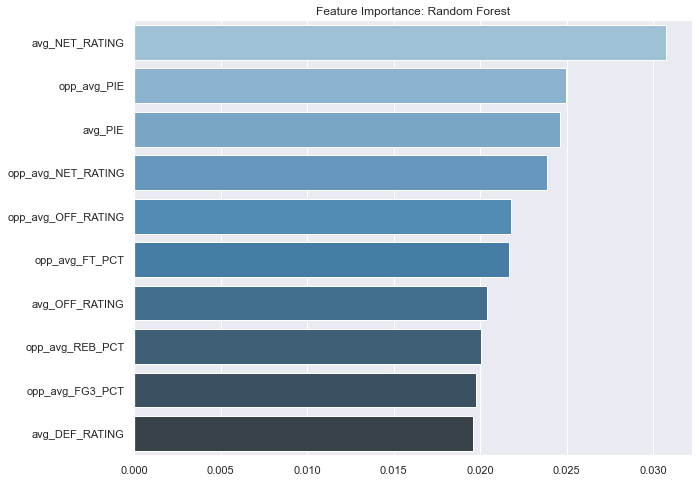

In [57]:
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

model = RandomForestClassifier()
model.fit(final3_2, final4)
sn.set(rc = {'figure.figsize':(10,8)})
rforest = (pd.Series(model.feature_importances_, index=final3.columns).nlargest(10))
sn.barplot(y=rforest.index, x=rforest.values, palette="Blues_d").set(title='Feature Importance: Random Forest')

[Text(0.5, 1.0, 'Feature Importance: Decision Tree')]

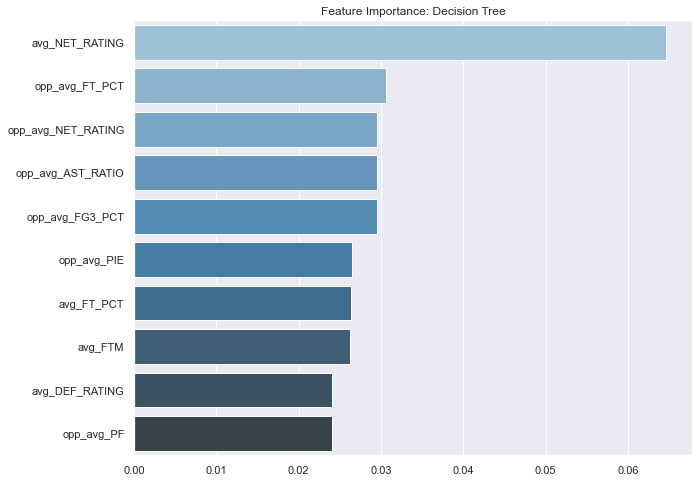

In [58]:
# decision tree for feature importance on a classification problem
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
%matplotlib inline

final3 = final2.drop(['WL'], axis = 1)
final4 = final2['WL']

model = DecisionTreeClassifier()
model.fit(final3_2, final4)

dtree = (pd.Series(model.feature_importances_, index=final3.columns)
   .nlargest(10))
sn.set(rc = {'figure.figsize':(10,8)})
sn.barplot(y=dtree.index, x=dtree.values, palette="Blues_d").set(title='Feature Importance: Decision Tree')

In [60]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
# define feature selection
fs = SelectKBest(score_func=f_classif, k=5)
# apply feature selection
X_selected = fs.fit_transform(final3, final4)
X_selected

array([[  0.57142857,   0.88571429,   0.52457143,   6.77142857,
          0.55085714],
       [  0.57142857,   6.51428571,   0.52414286,  -4.24285714,
          0.45771429],
       [  0.28571429,  -5.74285714,   0.46728571,  -0.07142857,
          0.49728571],
       ...,
       [  0.57142857,   2.42857143,   0.51657143, -11.        ,
          0.43971429],
       [  0.42857143,  -0.35714286,   0.51385714,  -6.44285714,
          0.44257143],
       [  0.28571429,  -7.22857143,   0.46928571,   3.25714286,
          0.521     ]])

Determine Outliers in Dataset

In [61]:
final4_cols = ['avg_WL', 'avg_NET_RATING', 'avg_PIE', 'opp_avg_NET_RATING', 'opp_avg_PIE', 'MATCHUP']
for i in final4_cols:
    quartile_1,quartile_3 = np.percentile(final2[i],[25,75])
    quartile_f,quartile_l = np.percentile(final2[i],[1,99])
    IQR = quartile_3-quartile_1
    lower_bound = quartile_1 - (1.5*IQR)
    upper_bound = quartile_3 + (1.5*IQR)
    print(i,lower_bound,upper_bound,quartile_f,quartile_l)

    final2[i].loc[final2[i] < lower_bound] = quartile_f
    final2[i].loc[final2[i] > upper_bound] = quartile_l

avg_WL -0.3571428571428572 1.3571428571428572 0.0 1.0
avg_NET_RATING -18.619642857142857 18.308928571428574 -17.38571428571429 15.192000000000007
avg_PIE 0.38357142857142856 0.6121428571428572 0.40106571428571425 0.5866585714285715
opp_avg_NET_RATING -18.485714285714288 19.257142857142856 -16.372142857142858 15.899000000000024
opp_avg_PIE 0.3902142857142857 0.6147857142857143 0.4054285714285714 0.5958014285714286
MATCHUP -1.5 2.5 0.0 1.0


#### The three combinations of features that I will use during testing. The 'final6' variable is the list of wins and losses

In [827]:
final3 = final2[['avg_WL', 'avg_NET_RATING', 'avg_PIE', 'opp_avg_NET_RATING', 'opp_avg_PIE', 'MATCHUP']]
final4 = final2[['avg_NET_RATING', 'avg_PIE', 'opp_avg_NET_RATING', 'opp_avg_PIE', 'avg_DEF_RATING', 'avg_OFF_RATING', 'opp_avg_FT_PCT', 'avg_PTS', 'opp_avg_REB_PCT', 'opp_avg_FG3_PCT', 'avg_TS_PCT']]
final5 = final2[feat_list]
final6 = final2['WL']

# Part 3: Running Models

### 3.1 - Model Selection, Gridsearch, and Getting Accuracy 

I used 5 different algorithms - Logistic Regression, RandomForestClassifier, DecisionTreeClassifier, K Nearest Neighbors, and SVC - and 3 different feature combinations to make predictions. After doing some research most NBA prediction models have accuracy scores in the range of 0.6-0.74. I was striving to get accuracy scores within this range.

I first split my data into training and testing sets. The model would learn from the traning set and then validate its learning on the test set. I split my data into 80% training and 20% testing. Each model also has a number of hyperparameters that can be adjusted to improve the model. To test out various combinations of hyperparameters, I used GridSearch. I created a list of potential values for each hyperparameter and GridSearch tested every combination and returned the one that yielded the highest accuracy. In order to test out each combination of hyperparameters, I used cross-validation, a technique that partitions a part of the training data to be used as 'testing data' to test the hyperparameters. This temporary testing data is called validation data and we run cross validation multiple times to get different sets of validation data. This way we prevent overfitting, which is when the model learns from the training data too closely. By varying the validation and training data for each iteration of cross validation, we can prevent this from happening.

Since cross-validation can be confusing, I included an image to show how it works.

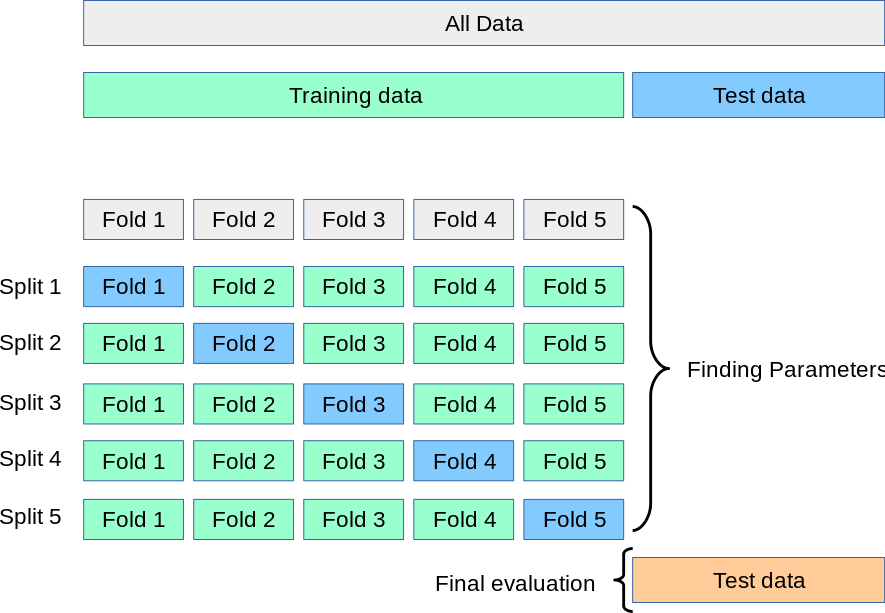

In [860]:
from sklearn.model_selection import train_test_split,KFold,RandomizedSearchCV,GridSearchCV, StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from joblib import dump


In [873]:
new_string = 'final'+str(3)
X_train3, X_test3, y_train3, y_test3 = train_test_split(globals()[new_string], final6, test_size=0.2)
scaler = preprocessing.MinMaxScaler().fit(X_train3)
X_Train = scaler.transform(X_train3)
scaler_2 = preprocessing.MinMaxScaler().fit(X_test3)
X_Test = scaler_2.transform(X_test3)

new_string = 'final'+str(4)
X_train4, X_test4, y_train4, y_test4 = train_test_split(globals()[new_string], final6, test_size=0.2)
scaler = preprocessing.MinMaxScaler().fit(X_train4)
X_Train = scaler.transform(X_train4)
scaler_2 = preprocessing.MinMaxScaler().fit(X_test4)
X_Test = scaler_2.transform(X_test4)

new_string = 'final'+str(5)
X_train5, X_test5, y_train5, y_test5 = train_test_split(globals()[new_string], final6, test_size=0.2)
scaler = preprocessing.MinMaxScaler().fit(X_train5)
X_Train = scaler.transform(X_train5)
scaler_2 = preprocessing.MinMaxScaler().fit(X_test5)
X_Test = scaler_2.transform(X_test5)

0.5049342105263158
3
['logreg_model_3.joblib']
0.6463815789473685
LogisticRegression(C=4, l1_ratio=0, max_iter=80, penalty='l1', random_state=42,
                   solver='liblinear')
0.5016447368421053
4
['logreg_model_4.joblib']
0.59375
LogisticRegression(C=5, l1_ratio=0, max_iter=80, penalty='l1', random_state=42,
                   solver='liblinear')
0.6414473684210527
5
['logreg_model_5.joblib']
0.6365131578947368
LogisticRegression(C=0.5, l1_ratio=0, max_iter=80, random_state=42,
                   solver='liblinear')


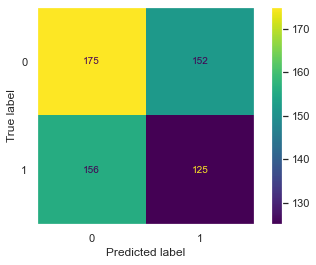

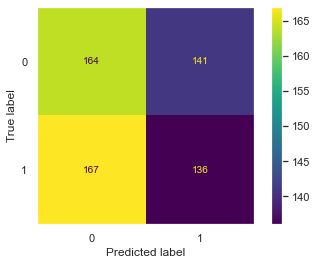

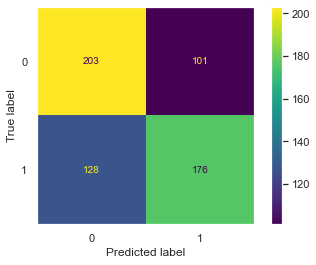

In [1017]:
log_reg = []
for n in range(3,6):
    X_train = globals()['X_train'+str(n)]
    X_test = globals()['X_test'+str(n)]
    y_train = globals()['y_train'+str(n)]
    y_test = globals()['y_test'+str(n)]



    model = LogisticRegression(random_state=60)
    model.fit(X_Train, y_train)
    y_pred = model.predict(X_Test)
    print(metrics.accuracy_score(y_test, y_pred))
 

    from sklearn.model_selection import GridSearchCV


    penalty = ['l1', 'l2', 'elasticnet', 'none']
    solver = ['liblinear']
    max_iter = [80]
    multi_class = ['auto', 'ovr']
    verbose = [0, 1, 2]
    l1_ratio = [0]
    C = [0.5, 1, 2, 3, 4, 5]

    param_grid = {'penalty': penalty, 'solver': solver, 'max_iter':max_iter, 
        'multi_class':multi_class, 'verbose':verbose, 'l1_ratio':l1_ratio, 
        'C':C
    }

    grid = GridSearchCV(estimator = LogisticRegression(random_state=42), param_grid = param_grid, cv = 5, n_jobs = -1)

    grid.fit(X_train, y_train)
    best_log_grid = grid.best_estimator_
    best_log_grid.fit(X_train, y_train)
    y_pred_best_log = best_log_grid.predict(X_test)
    print(str(n))
    model1 = dump(best_log_grid, 'logreg_model_'+str(n)+'.joblib')
    print(model1)
    print(metrics.accuracy_score(y_test, y_pred_best_log))
    print(best_log_grid)
    log_reg.append(metrics.accuracy_score(y_test, y_pred_best_log))
    conf_mat = confusion_matrix(y_test, y_pred_best)
    cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=np.arange(2)).plot()
    plt.grid(False)


The charts above are called confusion matrices. They show the count of true positives (guessing winners correctly), true negatives (guessing losers correctly), false positives (predicted a winner but the team lost), and false negatives (predicted a loser but the team won)

I created confusion matrices for each test run

0.5921052631578947
Fitting 5 folds for each of 36 candidates, totalling 180 fits
0.618421052631579
RandomForestClassifier(max_depth=50, min_samples_leaf=5, min_samples_split=3,
                       n_estimators=200, random_state=42)
0.5641447368421053
Fitting 5 folds for each of 36 candidates, totalling 180 fits
0.5838815789473685
RandomForestClassifier(max_depth=50, min_samples_leaf=5, min_samples_split=3,
                       n_estimators=200, random_state=42)
0.6447368421052632
Fitting 5 folds for each of 36 candidates, totalling 180 fits
0.6332236842105263
RandomForestClassifier(max_depth=50, min_samples_leaf=4, min_samples_split=3,
                       n_estimators=200, random_state=42)


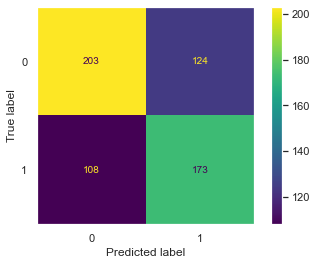

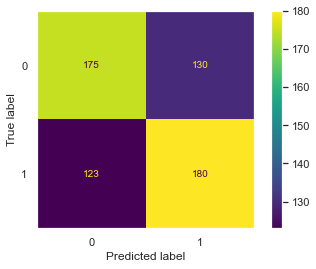

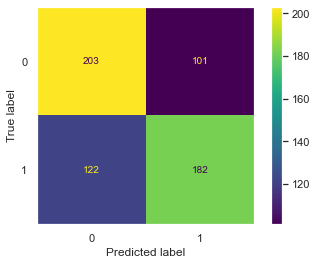

In [1129]:
rand_forest = []
for n in range(3,6):
    X_train = globals()['X_train'+str(n)]
    X_test = globals()['X_test'+str(n)]
    y_train = globals()['y_train'+str(n)]
    y_test = globals()['y_test'+str(n)]

    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    print(metrics.accuracy_score(y_test, y_pred_rf))


    from sklearn.model_selection import GridSearchCV
    n_estimators = [200]
    max_features = ['auto', 'sqrt']
    max_depth = [50]
    max_depth.append(None)
    min_samples_split = [3, 5, 8]
    min_samples_leaf = [3, 4, 5]
    bootstrap = [True]
    param_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}

    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 5)
    grid_search.fit(X_train, y_train)
    best_grid = grid_search.best_estimator_
    best_grid.fit(X_train, y_train)
    y_pred_best = best_grid.predict(X_test)
    dump(best_grid, 'randforest_model_'+str(n)+'.joblib')
    rand_forest.append(metrics.accuracy_score(y_test, y_pred_best_log))
    print(metrics.accuracy_score(y_test, y_pred_best))
    print(best_grid)


    conf_mat = confusion_matrix(y_test, y_pred_best)
    cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=np.arange(2)).plot()
    plt.grid(False)

0.6447368421052632
Fitting 5 folds for each of 15 candidates, totalling 75 fits
['gradboosting_model_3.joblib']
0.649671052631579
GradientBoostingClassifier(max_depth=1, random_state=42)
0.5756578947368421
Fitting 5 folds for each of 15 candidates, totalling 75 fits
['gradboosting_model_4.joblib']
0.5904605263157895
GradientBoostingClassifier(learning_rate=0.5, max_depth=1, n_estimators=10,
                           random_state=42)
0.6167763157894737
Fitting 5 folds for each of 15 candidates, totalling 75 fits
['gradboosting_model_5.joblib']
0.6233552631578947
GradientBoostingClassifier(max_depth=1, random_state=42)


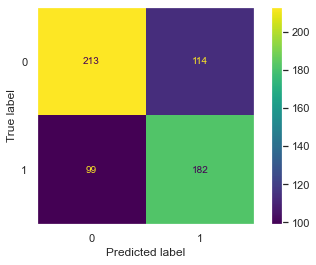

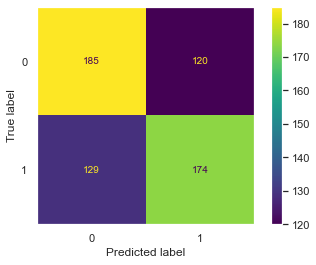

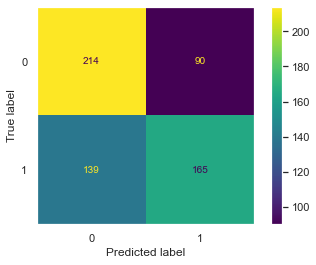

In [1130]:
grad_boosting = []
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing

for n in range(3,6):
    X_train = globals()['X_train'+str(n)]
    X_test = globals()['X_test'+str(n)]
    y_train = globals()['y_train'+str(n)]
    y_test = globals()['y_test'+str(n)]

    rf = GradientBoostingClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    print(metrics.accuracy_score(y_test, y_pred_rf))


    from sklearn.model_selection import GridSearchCV
    learning_rate = [0.1, 0.5, 1]
    n_estimators = [10, 100, 500, 1000, 10000]
    max_depth = [1]
    param_grid = {'learning_rate': learning_rate,
                'n_estimators': n_estimators,
                   'max_depth': max_depth}

    rf = GradientBoostingClassifier(random_state=42)
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 5)
    grid_search.fit(X_train, y_train)
    best_grid = grid_search.best_estimator_
    best_grid.fit(X_train, y_train)
    y_pred_best = best_grid.predict(X_test)
    model3 = dump(best_grid, 'gradboosting_model_'+str(n)+'.joblib')
    print(model3)
    rand_forest.append(metrics.accuracy_score(y_test, y_pred_best_log))
    print(metrics.accuracy_score(y_test, y_pred_best))
    print(best_grid)

    conf_mat = confusion_matrix(y_test, y_pred_best)
    cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=np.arange(2)).plot()
    plt.grid(False)

0.5888157894736842
Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.618421052631579
KNeighborsClassifier(n_neighbors=20)
0.5773026315789473
Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.5542763157894737
KNeighborsClassifier(n_neighbors=20, p=1)
0.5608552631578947
Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.6134868421052632
KNeighborsClassifier(n_neighbors=20)


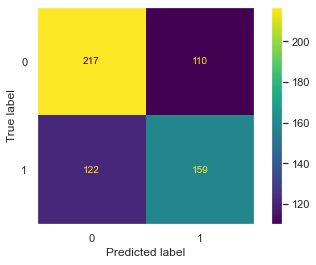

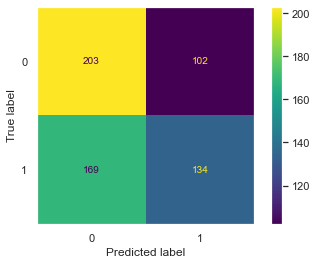

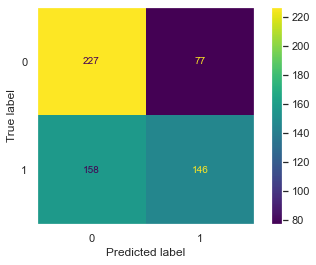

In [1131]:
knn = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

for n in range(3,6):
    X_train = globals()['X_train'+str(n)]
    X_test = globals()['X_test'+str(n)]
    y_train = globals()['y_train'+str(n)]
    y_test = globals()['y_test'+str(n)]


    rf = KNeighborsClassifier()
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    print(metrics.accuracy_score(y_test, y_pred_rf))


    from sklearn.model_selection import GridSearchCV
    n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
    p = [1,2]
    param_grid = {'n_neighbors': n_neighbors,
                'p': p}

    rf = KNeighborsClassifier()
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 5)
    grid_search.fit(X_train, y_train)
    best_grid = grid_search.best_estimator_
    best_grid.fit(X_train, y_train)
    y_pred_best = best_grid.predict(X_test)
    dump(best_grid, 'knn_model_'+str(n)+'.joblib')
    knn.append(metrics.accuracy_score(y_test, y_pred_best_log))
    print(metrics.accuracy_score(y_test, y_pred_best))
    print(best_grid)

    conf_mat = confusion_matrix(y_test, y_pred_best)
    cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=np.arange(2)).plot()
    plt.grid(False)

0.6332236842105263
Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.6332236842105263
SVC(C=1, probability=True)
0.6069078947368421
Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.600328947368421
SVC(C=2, probability=True)
0.625
Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.6233552631578947
SVC(C=2, probability=True)


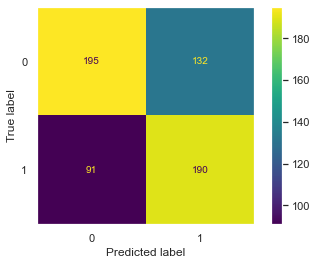

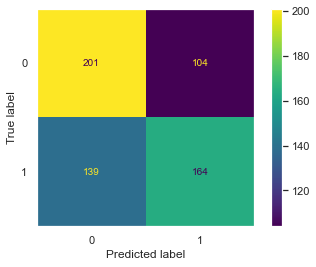

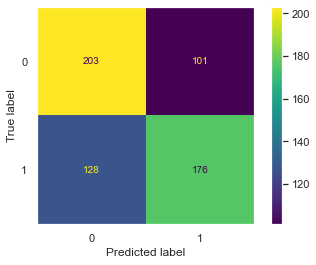

In [1132]:
svc = []
from sklearn.svm import SVC
from sklearn import svm

for n in range(3,6):
    X_train = globals()['X_train'+str(n)]
    X_test = globals()['X_test'+str(n)]
    y_train = globals()['y_train'+str(n)]
    y_test = globals()['y_test'+str(n)]


    rf = SVC()
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    print(metrics.accuracy_score(y_test, y_pred_rf))


    from sklearn.model_selection import GridSearchCV
    C = [1, 2, 3, 4, 5]
    gamma = ['scale', 'auto']
    probability = [True, False]
    param_grid = {'C':C,
        'gamma': gamma,
                'probability': probability}

    rf = SVC()
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 5)
    grid_search.fit(X_train, y_train)
    best_grid = grid_search.best_estimator_
    best_grid.fit(X_train, y_train)
    y_pred_best = best_grid.predict(X_test)
    dump(best_grid, 'svc_model_'+str(n)+'.joblib')
    svc.append(metrics.accuracy_score(y_test, y_pred_best_log))
    print(metrics.accuracy_score(y_test, y_pred_best))
    print(best_grid)

    conf_mat = confusion_matrix(y_test, y_pred_best)
    cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=np.arange(2)).plot()
    plt.grid(False)
    


### 3.2 - Graphing the Accuracy Scores
Most of my scores were in the low-mid 0.6 range. I am extremely happy with these results, especially given the small amout of data that I have. My best model reached an accuracy above 0.64 (logistic regression). To give a visual of my model success, I made a bar graph showing the accuracies of each feature combination for each model. 

**All models were saved properly to be used in the future**

In [957]:
rand_forest = [0.618421052631579, 0.5838815789473685, 0.6332236842105263]
grad_boosting = [0.649671052631579, 0.5904605263157895, 0.6233552631578947]
knn = [0.618421052631579, 0.5542763157894737, 0.6134868421052632]
svc = [0.6332236842105263, 0.600328947368421, 0.6233552631578947]

features = ['Feature Set 1', 'Feature Set 2', 'Feature Set 3']

log_reg_type = ['Logistic Regression', 'Logistic Regression', 'Logistic Regression']
rand_forest_type = ['Random Forest', 'Random Forest', 'Random Forest']
k_neighbors_type = ['K Nearest Neighbors', 'K Nearest Neighbors', 'K Nearest Neighbors']
grad_boosting_type = ['Gradient Boosting', 'Gradient Boosting', 'Gradient Boosting']
svc_type = ['SVC', 'SVC', 'SVC']

In [958]:
test1 = pd.DataFrame([log_reg, features, log_reg_type])
test1 = test1.transpose()
test1 = test1.rename(columns={0: 'value', 1:'Features', 2:'Type'})
test1.head()

test2 = pd.DataFrame([rand_forest, features, rand_forest_type])
test2 = test2.transpose()
test2 = test2.rename(columns={0: 'value', 1:'Features', 2:'Type'})
test2.head()

test3 = pd.DataFrame([knn, features, k_neighbors_type])
test3 = test3.transpose()
test3 = test3.rename(columns={0: 'value', 1:'Features', 2:'Type'})
test3.head()

test4 = pd.DataFrame([grad_boosting, features, grad_boosting_type])
test4 = test4.transpose()
test4 = test4.rename(columns={0: 'value', 1:'Features', 2:'Type'})
test4.head()

test5 = pd.DataFrame([svc, features, svc_type])
test5 = test5.transpose()
test5 = test5.rename(columns={0: 'value', 1:'Features', 2:'Type'})
test5.head()

frames = [test1, test2, test3, test4, test5]
new_test = pd.concat(frames)

In [961]:
new_test = new_test.reset_index()
new_test = new_test.drop(['level_0', 'index'], axis=1)
new_test.head(50)

value       Features                 Type
0   0.646382  Feature Set 1  Logistic Regression
1    0.59375  Feature Set 2  Logistic Regression
2   0.636513  Feature Set 3  Logistic Regression
3   0.618421  Feature Set 1        Random Forest
4   0.583882  Feature Set 2        Random Forest
5   0.633224  Feature Set 3        Random Forest
6   0.618421  Feature Set 1  K Nearest Neighbors
7   0.554276  Feature Set 2  K Nearest Neighbors
8   0.613487  Feature Set 3  K Nearest Neighbors
9   0.649671  Feature Set 1    Gradient Boosting
10  0.590461  Feature Set 2    Gradient Boosting
11  0.623355  Feature Set 3    Gradient Boosting
12  0.633224  Feature Set 1                  SVC
13  0.600329  Feature Set 2                  SVC
14  0.623355  Feature Set 3                  SVC

In [962]:
new_test['value'] = pd.to_numeric(new_test['value'])
new_test.head()

value       Features                 Type
0  0.646382  Feature Set 1  Logistic Regression
1  0.593750  Feature Set 2  Logistic Regression
2  0.636513  Feature Set 3  Logistic Regression
3  0.618421  Feature Set 1        Random Forest
4  0.583882  Feature Set 2        Random Forest

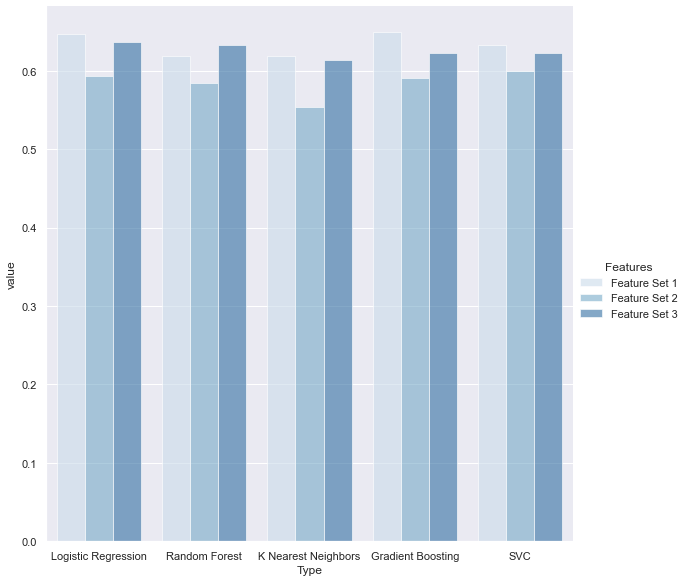

In [963]:
plot = sn.catplot(
    data=new_test, kind="bar",
    x='Type', y='value', hue='Features',
    ci="sd", palette="Blues", alpha=.6, height=8
)
plt.show()

# Part 4: Creating a 2021 Dataset 
I trained my models with data from the 2018, 2019, and 2020 regular seasons. I wanted to show my models completely new data from this current season. I expect for the accuracy to be lower for this season. I used the same data manipulation process that I created when making the larger dataset.

In [3]:
from nba_api.stats.endpoints import leaguegamelog
from nba_api.stats.endpoints import boxscoreadvancedv2
df = leaguegamelog.LeagueGameLog(season=2021).get_data_frames()[0]
df.head()

SEASON_ID     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME     GAME_ID  \
0     22021  1610612744               GSW  Golden State Warriors  0022100002   
1     22021  1610612747               LAL     Los Angeles Lakers  0022100002   
2     22021  1610612751               BKN          Brooklyn Nets  0022100001   
3     22021  1610612749               MIL        Milwaukee Bucks  0022100001   
4     22021  1610612766               CHA      Charlotte Hornets  0022100003   

    GAME_DATE      MATCHUP WL  MIN  FGM  ...  DREB  REB  AST  STL  BLK  TOV  \
0  2021-10-19    GSW @ LAL  W  240   41  ...    41   50   30    9    2   17   
1  2021-10-19  LAL vs. GSW  L  240   45  ...    40   45   21    7    4   18   
2  2021-10-19    BKN @ MIL  L  240   37  ...    39   44   19    3    9   13   
3  2021-10-19  MIL vs. BKN  W  240   48  ...    41   54   25    8    9    8   
4  2021-10-20  CHA vs. IND  W  240   46  ...    34   46   29    9    5    8   

   PF  PTS  PLUS_MINUS  VIDEO_AVAILABLE  
0  18  121           7                1  
1  25  114          -7                1  
2  17  104         -23                1  
3  19  127          23                1  
4  21  123           1                1  

[5 rows x 29 columns]

In [4]:
df = df.drop(['SEASON_ID',
'TEAM_ID',
'TEAM_NAME', 'VIDEO_AVAILABLE', 'PLUS_MINUS'], axis=1)

In [5]:
df = df.sort_values(['GAME_ID', 'TEAM_ABBREVIATION'])

In [6]:
newlist = []
newlist2 = []
for games in df['GAME_ID']:
        newlist.append(games)

In [7]:
for i in newlist:
    if i not in newlist2:
            newlist2.append(i)

In [12]:
df5 = pd.DataFrame()

In [13]:
for gid in newlist2:
    new_iter = boxscoreadvancedv2.BoxScoreAdvancedV2(game_id=gid).get_data_frames()[1]
    df5 = df5.append(new_iter, ignore_index=True)

ReadTimeout: HTTPSConnectionPool(host='stats.nba.com', port=443): Read timed out. (read timeout=30)

In [20]:
df5 = df5.sort_values(['GAME_ID', 'TEAM_ABBREVIATION'])

In [21]:
df5 = df5.reset_index()

In [22]:
df = df.sort_values(['GAME_ID', 'TEAM_ABBREVIATION'])
df = df.reset_index()

In [23]:
df5.head()

index     GAME_ID     TEAM_ID TEAM_NAME TEAM_ABBREVIATION     TEAM_CITY  \
0      1  0022100001  1610612751      Nets               BKN      Brooklyn   
1      0  0022100001  1610612749     Bucks               MIL     Milwaukee   
2      3  0022100002  1610612744  Warriors               GSW  Golden State   
3      2  0022100002  1610612747    Lakers               LAL   Los Angeles   
4      5  0022100003  1610612766   Hornets               CHA     Charlotte   

      MIN  E_OFF_RATING  OFF_RATING  E_DEF_RATING  ...  TM_TOV_PCT  EFG_PCT  \
0  240:00         101.8       102.0         117.7  ...        12.7    0.542   
1  240:00         117.7       124.5         101.8  ...         7.8    0.538   
2  240:00         106.0       107.1          98.0  ...        15.0    0.516   
3  240:00          98.0       101.8         106.0  ...        16.1    0.553   
4  240:00         107.1       116.0         111.4  ...         7.5    0.491   

   TS_PCT  USG_PCT  E_USG_PCT  E_PACE   PACE  PACE_PER40  POSS    PIE  
0   0.552      1.0      0.200  105.02  102.0       85.00   102  0.407  
1   0.562      1.0      0.194  105.02  102.0       85.00   102  0.593  
2   0.570      1.0      0.200  115.28  112.5       93.75   113  0.578  
3   0.551      1.0      0.198  115.28  112.5       93.75   112  0.422  
4   0.517      1.0      0.200  112.22  106.5       88.75   106  0.480  

[5 rows x 30 columns]

In [24]:
df = pd.concat([df, df5], axis=1)
df6 = df
pd.set_option('display.max_columns', None)
df.head(50)

index TEAM_ABBREVIATION     GAME_ID   GAME_DATE      MATCHUP WL  MIN  FGM  \
0       3               BKN  0022100001  2021-10-19    BKN @ MIL  L  240   37   
1       2               MIL  0022100001  2021-10-19  MIL vs. BKN  W  240   48   
2       1               GSW  0022100002  2021-10-19    GSW @ LAL  W  240   41   
3       0               LAL  0022100002  2021-10-19  LAL vs. GSW  L  240   45   
4       5               CHA  0022100003  2021-10-20  CHA vs. IND  W  240   46   
5       4               IND  0022100003  2021-10-20    IND @ CHA  L  240   42   
6       6               CHI  0022100004  2021-10-20    CHI @ DET  W  240   37   
7       7               DET  0022100004  2021-10-20  DET vs. CHI  L  240   36   
8      17               BOS  0022100005  2021-10-20    BOS @ NYK  L  290   48   
9      16               NYK  0022100005  2021-10-20  NYK vs. BOS  W  290   51   
10      9               TOR  0022100006  2021-10-20  TOR vs. WAS  L  240   30   
11      8               WAS  0022100006  2021-10-20    WAS @ TOR  W  240   36   
12     12               CLE  0022100007  2021-10-20    CLE @ MEM  L  240   47   
13     13               MEM  0022100007  2021-10-20  MEM vs. CLE  W  240   53   
14     15               HOU  0022100008  2021-10-20    HOU @ MIN  L  240   40   
15     14               MIN  0022100008  2021-10-20  MIN vs. HOU  W  240   42   
16     11               NOP  0022100009  2021-10-20  NOP vs. PHI  L  240   39   
17     10               PHI  0022100009  2021-10-20    PHI @ NOP  W  240   44   
18     19               ORL  0022100010  2021-10-20    ORL @ SAS  L  240   35   
19     18               SAS  0022100010  2021-10-20  SAS vs. ORL  W  240   49   
20     25               OKC  0022100011  2021-10-20    OKC @ UTA  L  240   34   
21     24               UTA  0022100011  2021-10-20  UTA vs. OKC  W  240   40   
22     21               DEN  0022100012  2021-10-20    DEN @ PHX  W  240   44   
23     20               PHX  0022100012  2021-10-20  PHX vs. DEN  L  240   36   
24     23               POR  0022100013  2021-10-20  POR vs. SAC  L  240   45   
25     22               SAC  0022100013  2021-10-20    SAC @ POR  W  240   42   
26     27               ATL  0022100014  2021-10-21  ATL vs. DAL  W  240   45   
27     26               DAL  0022100014  2021-10-21    DAL @ ATL  L  240   31   
28     29               MIA  0022100015  2021-10-21  MIA vs. MIL  W  240   51   
29     28               MIL  0022100015  2021-10-21    MIL @ MIA  L  240   32   
30     31               GSW  0022100016  2021-10-21  GSW vs. LAC  W  240   43   
31     30               LAC  0022100016  2021-10-21    LAC @ GSW  L  240   42   
32     32               CHA  0022100017  2021-10-22    CHA @ CLE  W  240   48   
33     33               CLE  0022100017  2021-10-22  CLE vs. CHA  L  240   43   
34     35               NYK  0022100018  2021-10-22    NYK @ ORL  W  240   44   
35     34               ORL  0022100018  2021-10-22  ORL vs. NYK  L  240   33   
36     37               IND  0022100019  2021-10-22    IND @ WAS  L  265   52   
37     36               WAS  0022100019  2021-10-22  WAS vs. IND  W  265   49   
38     39               BOS  0022100020  2021-10-22  BOS vs. TOR  L  240   32   
39     38               TOR  0022100020  2021-10-22    TOR @ BOS  W  240   42   
40     40               BKN  0022100021  2021-10-22    BKN @ PHI  W  240   41   
41     41               PHI  0022100021  2021-10-22  PHI vs. BKN  L  240   43   
42     43               CHI  0022100022  2021-10-22  CHI vs. NOP  W  240   47   
43     42               NOP  0022100022  2021-10-22    NOP @ CHI  L  240   42   
44     44               HOU  0022100023  2021-10-22  HOU vs. OKC  W  240   48   
45     45               OKC  0022100023  2021-10-22    OKC @ HOU  L  240   34   
46     47               DEN  0022100024  2021-10-22  DEN vs. SAS  W  240   44   
47     46               SAS  0022100024  2021-10-22    SAS @ DEN  L  240   40   
48     48               LAL  002210

In [25]:
df.shape

(654, 55)

In [26]:
substring = '@'
substring2 = 'vs.'
for part in df['MATCHUP']:
    if substring in part:
        df = df.replace(to_replace = part,
                 value ="0")
    if substring2 in part:
        df = df.replace(to_replace = part, value = '1')
df.head()

index TEAM_ABBREVIATION     GAME_ID   GAME_DATE MATCHUP WL  MIN  FGM  FGA  \
0      3               BKN  0022100001  2021-10-19       0  L  240   37   84   
1      2               MIL  0022100001  2021-10-19       1  W  240   48  105   
2      1               GSW  0022100002  2021-10-19       0  W  240   41   93   
3      0               LAL  0022100002  2021-10-19       1  L  240   45   95   
4      5               CHA  0022100003  2021-10-20       1  W  240   46  107   

   FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  REB  AST  STL  \
0   0.440    17    32    0.531   13   23   0.565     5    39   44   19    3   
1   0.457    17    45    0.378   14   18   0.778    13    41   54   25    8   
2   0.441    14    39    0.359   25   30   0.833     9    41   50   30    9   
3   0.474    15    42    0.357    9   19   0.474     5    40   45   21    7   
4   0.430    13    31    0.419   18   27   0.667    12    34   46   29    9   

   BLK  TOV  PF  PTS  index     GAME_ID     TEAM_ID TEAM_NAME  \
0    9   13  17  104      1  0022100001  1610612751      Nets   
1    9    8  19  127      0  0022100001  1610612749     Bucks   
2    2   17  18  121      3  0022100002  1610612744  Warriors   
3    4   18  25  114      2  0022100002  1610612747    Lakers   
4    5    8  21  123      5  0022100003  1610612766   Hornets   

  TEAM_ABBREVIATION     TEAM_CITY     MIN  E_OFF_RATING  OFF_RATING  \
0               BKN      Brooklyn  240:00         101.8       102.0   
1               MIL     Milwaukee  240:00         117.7       124.5   
2               GSW  Golden State  240:00         106.0       107.1   
3               LAL   Los Angeles  240:00          98.0       101.8   
4               CHA     Charlotte  240:00         107.1       116.0   

   E_DEF_RATING  DEF_RATING  E_NET_RATING  NET_RATING  AST_PCT  AST_TOV  \
0         117.7       124.5         -15.8       -22.5    0.514     1.46   
1         101.8       102.0          15.8        22.5    0.521     3.13   
2          98.0       101.8           8.0         5.3    0.732     1.76   
3         106.0       107.1          -8.0        -5.3    0.467     1.17   
4         111.4       114.0          -4.3         2.0    0.630     3.63   

   AST_RATIO  OREB_PCT  DREB_PCT  REB_PCT  E_TM_TOV_PCT  TM_TOV_PCT  EFG_PCT  \
0       15.1     0.176     0.707    0.459        12.730        12.7    0.542   
1       17.1     0.293     0.824    0.541         7.413         7.8    0.538   
2       19.6     0.241     0.811    0.523        14.886        15.0    0.516   
3       14.8     0.189     0.759    0.477        15.469        16.1    0.553   
4       18.6     0.333     0.745    0.513         6.964         7.5    0.491   

   TS_PCT  USG_PCT  E_USG_PCT  E_PACE   PACE  PACE_PER40  POSS    PIE  
0   0.552      1.0      0.200  105.02  102.0       85.00   102  0.407  
1   0.562      1.0      0.194  105.02  102.0       85.00   102  0.593  
2   0.570      1.0      0.200  115.28  112.5       93.75   113  0.578  
3   0.551      1.0      0.198  115.28  112.5       93.75   112  0.422  
4   0.517      1.0      0.200  112.22  106.5       88.75   106  0.480

In [27]:
df = df.sort_values(['TEAM_NAME', 'GAME_DATE'])
df.head()

index TEAM_ABBREVIATION     GAME_ID   GAME_DATE MATCHUP WL  MIN  FGM  \
17      10               PHI  0022100009  2021-10-20       0  W  240   44   
41      41               PHI  0022100021  2021-10-22       1  L  240   43   
75      71               PHI  0022100038  2021-10-24       0  W  240   41   
99      98               PHI  0022100050  2021-10-26       0  L  240   36   
129    131               PHI  0022100065  2021-10-28       1  W  240   38   

     FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  REB  AST  \
17    85   0.518    13    25    0.520   16   20   0.800     6    41   47   24   
41    91   0.473    14    36    0.389    9   11   0.818     5    30   35   17   
75    88   0.466    17    41    0.415   16   20   0.800    12    35   47   25   
99    82   0.439    12    41    0.293   15   17   0.882    12    28   40   24   
129   76   0.500    12    27    0.444   22   24   0.917     6    40   46   22   

     STL  BLK  TOV  PF  PTS  index     GAME_ID     TEAM_ID TEAM_NAME  \
17     9    5   13  11  117     16  0022100009  1610612755     76ers   
41     8    9   10  21  109     40  0022100021  1610612755     76ers   
75     4    9   12  17  115     74  0022100038  1610612755     76ers   
99     9    4   15  14   99     98  0022100050  1610612755     76ers   
129    7    9   21  23  110    128  0022100065  1610612755     76ers   

    TEAM_ABBREVIATION     TEAM_CITY     MIN  E_OFF_RATING  OFF_RATING  \
17                PHI  Philadelphia  240:00         116.1       118.2   
41                PHI  Philadelphia  240:00         108.1       112.4   
75                PHI  Philadelphia  240:00         118.8       118.6   
99                PHI  Philadelphia  240:00         107.1       106.5   
129               PHI  Philadelphia  240:00         108.3       111.1   

     E_DEF_RATING  DEF_RATING  E_NET_RATING  NET_RATING  AST_PCT  AST_TOV  \
17           96.1        98.0          20.0        20.2    0.545     1.85   
41          113.4       117.5          -5.3        -5.2    0.395     1.70   
75          105.8       106.2          13.0        12.4    0.610     2.08   
99          117.2       119.1         -10.1       -12.7    0.667     1.60   
129         100.1       103.0           8.2         8.1    0.579     1.05   

     AST_RATIO  OREB_PCT  DREB_PCT  REB_PCT  E_TM_TOV_PCT  TM_TOV_PCT  \
17        18.3     0.205     0.764    0.515        12.897        13.1   
41        13.8     0.224     0.660    0.438         9.917        10.3   
75        18.7     0.265     0.804    0.526        12.397        12.4   
99        18.7     0.261     0.660    0.462        16.220        16.1   
129       17.0     0.282     0.727    0.543        20.677        21.2   

     EFG_PCT  TS_PCT  USG_PCT  E_USG_PCT  E_PACE  PACE  PACE_PER40  POSS  \
17     0.594   0.624      1.0      0.199  100.88  99.0       82.50    99   
41     0.549   0.569      1.0      0.197  100.70  97.0       80.83    97   
75     0.563   0.594      1.0      0.199   97.08  97.0       80.83    97   
99     0.512   0.553      1.0      0.197   94.04  93.5       77.92    93   
129    0.579   0.635      1.0      0.199  101.72  99.0       82.50    99   

       PIE  
17   0.600  
41   0.449  
75   0.520  
99   0.467  
129  0.581

In [28]:
df = df.drop(['TEAM_ABBREVIATION'], axis=1)

In [29]:
df2 = df

In [30]:
df2['GAME_DATE'] = pd.to_datetime(df2['GAME_DATE'])
df2.head()

index     GAME_ID  GAME_DATE MATCHUP WL  MIN  FGM  FGA  FG_PCT  FG3M  \
17      10  0022100009 2021-10-20       0  W  240   44   85   0.518    13   
41      41  0022100021 2021-10-22       1  L  240   43   91   0.473    14   
75      71  0022100038 2021-10-24       0  W  240   41   88   0.466    17   
99      98  0022100050 2021-10-26       0  L  240   36   82   0.439    12   
129    131  0022100065 2021-10-28       1  W  240   38   76   0.500    12   

     FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  REB  AST  STL  BLK  TOV  PF  \
17     25    0.520   16   20   0.800     6    41   47   24    9    5   13  11   
41     36    0.389    9   11   0.818     5    30   35   17    8    9   10  21   
75     41    0.415   16   20   0.800    12    35   47   25    4    9   12  17   
99     41    0.293   15   17   0.882    12    28   40   24    9    4   15  14   
129    27    0.444   22   24   0.917     6    40   46   22    7    9   21  23   

     PTS  index     GAME_ID     TEAM_ID TEAM_NAME     TEAM_CITY     MIN  \
17   117     16  0022100009  1610612755     76ers  Philadelphia  240:00   
41   109     40  0022100021  1610612755     76ers  Philadelphia  240:00   
75   115     74  0022100038  1610612755     76ers  Philadelphia  240:00   
99    99     98  0022100050  1610612755     76ers  Philadelphia  240:00   
129  110    128  0022100065  1610612755     76ers  Philadelphia  240:00   

     E_OFF_RATING  OFF_RATING  E_DEF_RATING  DEF_RATING  E_NET_RATING  \
17          116.1       118.2          96.1        98.0          20.0   
41          108.1       112.4         113.4       117.5          -5.3   
75          118.8       118.6         105.8       106.2          13.0   
99          107.1       106.5         117.2       119.1         -10.1   
129         108.3       111.1         100.1       103.0           8.2   

     NET_RATING  AST_PCT  AST_TOV  AST_RATIO  OREB_PCT  DREB_PCT  REB_PCT  \
17         20.2    0.545     1.85       18.3     0.205     0.764    0.515   
41         -5.2    0.395     1.70       13.8     0.224     0.660    0.438   
75         12.4    0.610     2.08       18.7     0.265     0.804    0.526   
99        -12.7    0.667     1.60       18.7     0.261     0.660    0.462   
129         8.1    0.579     1.05       17.0     0.282     0.727    0.543   

     E_TM_TOV_PCT  TM_TOV_PCT  EFG_PCT  TS_PCT  USG_PCT  E_USG_PCT  E_PACE  \
17         12.897        13.1    0.594   0.624      1.0      0.199  100.88   
41          9.917        10.3    0.549   0.569      1.0      0.197  100.70   
75         12.397        12.4    0.563   0.594      1.0      0.199   97.08   
99         16.220        16.1    0.512   0.553      1.0      0.197   94.04   
129        20.677        21.2    0.579   0.635      1.0      0.199  101.72   

     PACE  PACE_PER40  POSS    PIE  
17   99.0       82.50    99  0.600  
41   97.0       80.83    97  0.449  
75   97.0       80.83    97  0.520  
99   93.5       77.92    93  0.467  
129  99.0       82.50    99  0.581

In [31]:
team_list = []
team_list2 = []
for games in df2['TEAM_NAME']:
    team_list.append(games)
    for i in team_list:
        if i not in team_list2:
            team_list2.append(i)
print(team_list2)

['76ers', 'Bucks', 'Bulls', 'Cavaliers', 'Celtics', 'Clippers', 'Grizzlies', 'Hawks', 'Heat', 'Hornets', 'Jazz', 'Kings', 'Knicks', 'Lakers', 'Magic', 'Mavericks', 'Nets', 'Nuggets', 'Pacers', 'Pelicans', 'Pistons', 'Raptors', 'Rockets', 'Spurs', 'Suns', 'Thunder', 'Timberwolves', 'Trail Blazers', 'Warriors', 'Wizards']


In [32]:
team_list2 = team_list2[0:30]
team_list2

['76ers',
 'Bucks',
 'Bulls',
 'Cavaliers',
 'Celtics',
 'Clippers',
 'Grizzlies',
 'Hawks',
 'Heat',
 'Hornets',
 'Jazz',
 'Kings',
 'Knicks',
 'Lakers',
 'Magic',
 'Mavericks',
 'Nets',
 'Nuggets',
 'Pacers',
 'Pelicans',
 'Pistons',
 'Raptors',
 'Rockets',
 'Spurs',
 'Suns',
 'Thunder',
 'Timberwolves',
 'Trail Blazers',
 'Warriors',
 'Wizards']

In [33]:
for index, row in df2.iterrows():    
    if row['TEAM_NAME'] not in team_list2:
        df2 = df2.drop([index], axis=0)

In [34]:
df2 = df2.sort_values(['GAME_DATE'])
df2.head()

index     GAME_ID  GAME_DATE MATCHUP WL  MIN  FGM  FGA  FG_PCT  FG3M  \
1       2  0022100001 2021-10-19       1  W  240   48  105   0.457    17   
0       3  0022100001 2021-10-19       0  L  240   37   84   0.440    17   
2       1  0022100002 2021-10-19       0  W  240   41   93   0.441    14   
3       0  0022100002 2021-10-19       1  L  240   45   95   0.474    15   
17     10  0022100009 2021-10-20       0  W  240   44   85   0.518    13   

    FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  REB  AST  STL  BLK  TOV  PF  \
1     45    0.378   14   18   0.778    13    41   54   25    8    9    8  19   
0     32    0.531   13   23   0.565     5    39   44   19    3    9   13  17   
2     39    0.359   25   30   0.833     9    41   50   30    9    2   17  18   
3     42    0.357    9   19   0.474     5    40   45   21    7    4   18  25   
17    25    0.520   16   20   0.800     6    41   47   24    9    5   13  11   

    PTS  index     GAME_ID     TEAM_ID TEAM_NAME     TEAM_CITY     MIN  \
1   127      0  0022100001  1610612749     Bucks     Milwaukee  240:00   
0   104      1  0022100001  1610612751      Nets      Brooklyn  240:00   
2   121      3  0022100002  1610612744  Warriors  Golden State  240:00   
3   114      2  0022100002  1610612747    Lakers   Los Angeles  240:00   
17  117     16  0022100009  1610612755     76ers  Philadelphia  240:00   

    E_OFF_RATING  OFF_RATING  E_DEF_RATING  DEF_RATING  E_NET_RATING  \
1          117.7       124.5         101.8       102.0          15.8   
0          101.8       102.0         117.7       124.5         -15.8   
2          106.0       107.1          98.0       101.8           8.0   
3           98.0       101.8         106.0       107.1          -8.0   
17         116.1       118.2          96.1        98.0          20.0   

    NET_RATING  AST_PCT  AST_TOV  AST_RATIO  OREB_PCT  DREB_PCT  REB_PCT  \
1         22.5    0.521     3.13       17.1     0.293     0.824    0.541   
0        -22.5    0.514     1.46       15.1     0.176     0.707    0.459   
2          5.3    0.732     1.76       19.6     0.241     0.811    0.523   
3         -5.3    0.467     1.17       14.8     0.189     0.759    0.477   
17        20.2    0.545     1.85       18.3     0.205     0.764    0.515   

    E_TM_TOV_PCT  TM_TOV_PCT  EFG_PCT  TS_PCT  USG_PCT  E_USG_PCT  E_PACE  \
1          7.413         7.8    0.538   0.562      1.0      0.194  105.02   
0         12.730        12.7    0.542   0.552      1.0      0.200  105.02   
2         14.886        15.0    0.516   0.570      1.0      0.200  115.28   
3         15.469        16.1    0.553   0.551      1.0      0.198  115.28   
17        12.897        13.1    0.594   0.624      1.0      0.199  100.88   

     PACE  PACE_PER40  POSS    PIE  
1   102.0       85.00   102  0.593  
0   102.0       85.00   102  0.407  
2   112.5       93.75   113  0.578  
3   112.5       93.75   112  0.422  
17   99.0       82.50    99  0.600

In [35]:
df2['WL'] = df2['WL'].map({'W': 1, 'L': 0})

In [36]:
df6 = df2
df6.head()

index     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  FG3M  \
1       2  0022100001 2021-10-19       1   1  240   48  105   0.457    17   
0       3  0022100001 2021-10-19       0   0  240   37   84   0.440    17   
2       1  0022100002 2021-10-19       0   1  240   41   93   0.441    14   
3       0  0022100002 2021-10-19       1   0  240   45   95   0.474    15   
17     10  0022100009 2021-10-20       0   1  240   44   85   0.518    13   

    FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  REB  AST  STL  BLK  TOV  PF  \
1     45    0.378   14   18   0.778    13    41   54   25    8    9    8  19   
0     32    0.531   13   23   0.565     5    39   44   19    3    9   13  17   
2     39    0.359   25   30   0.833     9    41   50   30    9    2   17  18   
3     42    0.357    9   19   0.474     5    40   45   21    7    4   18  25   
17    25    0.520   16   20   0.800     6    41   47   24    9    5   13  11   

    PTS  index     GAME_ID     TEAM_ID TEAM_NAME     TEAM_CITY     MIN  \
1   127      0  0022100001  1610612749     Bucks     Milwaukee  240:00   
0   104      1  0022100001  1610612751      Nets      Brooklyn  240:00   
2   121      3  0022100002  1610612744  Warriors  Golden State  240:00   
3   114      2  0022100002  1610612747    Lakers   Los Angeles  240:00   
17  117     16  0022100009  1610612755     76ers  Philadelphia  240:00   

    E_OFF_RATING  OFF_RATING  E_DEF_RATING  DEF_RATING  E_NET_RATING  \
1          117.7       124.5         101.8       102.0          15.8   
0          101.8       102.0         117.7       124.5         -15.8   
2          106.0       107.1          98.0       101.8           8.0   
3           98.0       101.8         106.0       107.1          -8.0   
17         116.1       118.2          96.1        98.0          20.0   

    NET_RATING  AST_PCT  AST_TOV  AST_RATIO  OREB_PCT  DREB_PCT  REB_PCT  \
1         22.5    0.521     3.13       17.1     0.293     0.824    0.541   
0        -22.5    0.514     1.46       15.1     0.176     0.707    0.459   
2          5.3    0.732     1.76       19.6     0.241     0.811    0.523   
3         -5.3    0.467     1.17       14.8     0.189     0.759    0.477   
17        20.2    0.545     1.85       18.3     0.205     0.764    0.515   

    E_TM_TOV_PCT  TM_TOV_PCT  EFG_PCT  TS_PCT  USG_PCT  E_USG_PCT  E_PACE  \
1          7.413         7.8    0.538   0.562      1.0      0.194  105.02   
0         12.730        12.7    0.542   0.552      1.0      0.200  105.02   
2         14.886        15.0    0.516   0.570      1.0      0.200  115.28   
3         15.469        16.1    0.553   0.551      1.0      0.198  115.28   
17        12.897        13.1    0.594   0.624      1.0      0.199  100.88   

     PACE  PACE_PER40  POSS    PIE  
1   102.0       85.00   102  0.593  
0   102.0       85.00   102  0.407  
2   112.5       93.75   113  0.578  
3   112.5       93.75   112  0.422  
17   99.0       82.50    99  0.600

In [40]:
test = pd.DataFrame()
for teams in team_list2:
    grouped = df2.groupby(df2.TEAM_NAME)
    Hawks = grouped.get_group(teams)
    Hawks = Hawks.reset_index()
    Hawks = Hawks.drop(['index'], axis=1)
    Hawks = Hawks.reset_index()
    Hawks = Hawks.astype({"index": int})
    Hawks2 = Hawks.drop(['TEAM_NAME', 'GAME_DATE', 'TEAM_CITY', 'MIN'], axis=1)
    parts = Hawks2.columns
    newlist = []
    for part in parts:
        for ind in Hawks['index']:
            if ind > 6:
                newlist.append(Hawks[part][ind-7:ind].mean())
        newlist2 = [0, 0, 0 , 0, 0, 0, 0] + newlist
        part = pd.DataFrame(newlist2, columns=['avg_'+part])
        Hawks = pd.concat([Hawks, part], axis=1).reindex(Hawks.index)
        newlist = []
        part = pd.DataFrame()
    Hawks = Hawks.iloc[7:,:]
    print(Hawks)
    for cols in Hawks2.columns:
        Hawks = Hawks.astype({cols: float})
    test = pd.concat([test, Hawks])
test.shape

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      221  0022100111 2021-11-03       1   1  240   38   77   0.494   
8       8      237  0022100119 2021-11-04       0   1  240   41   83   0.494   
9       9      269  0022100135 2021-11-06       0   1  240   43   81   0.531   
10     10      293  0022100147 2021-11-08       1   0  240   35   91   0.385   
11     11      309  0022100155 2021-11-09       1   0  240   42  103   0.408   
12     12      340  0022100171 2021-11-11       1   0  240   40   88   0.455   
13     13      371  0022100186 2021-11-13       0   0  240   38   89   0.427   
14     14      420  0022100211 2021-11-16       0   0  240   33   90   0.367   
15     15      455  0022100228 2021-11-18       0   1  240   43   85   0.506   
16     16      490  0022100246 2021-11-20       0   0  240   41   81   0.506   
17     17      522  0022100262 2021-11-22       0   1  240   36   85   0.424   
18     18      555  0022100278 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      205  0022100103 2021-11-02       0   1  240   42   84   0.500   
8       8      254  0022100128 2021-11-05       1   0  240   33   82   0.402   
9       9      282  0022100142 2021-11-07       0   0  240   37   94   0.394   
10     10      308  0022100155 2021-11-09       0   1  240   44   95   0.463   
11     11      320  0022100161 2021-11-10       0   1  240   40   90   0.444   
12     12      349  0022100175 2021-11-12       0   0  265   44   98   0.449   
13     13      385  0022100193 2021-11-14       0   0  240   38   84   0.452   
14     14      437  0022100219 2021-11-17       1   1  240   40   87   0.460   
15     15      466  0022100234 2021-11-19       1   1  240   31   83   0.373   
16     16      486  0022100244 2021-11-20       1   1  240   37   82   0.451   
17     17      514  0022100258 2021-11-22       1   1  240   44   94   0.468   
18     18      545  0022100273 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      220  0022100111 2021-11-03       0   0  240   38   82   0.463   
8       8      268  0022100135 2021-11-06       1   0  240   37   92   0.402   
9       9      295  0022100148 2021-11-08       1   1  240   46   98   0.469   
10     10      324  0022100163 2021-11-10       1   1  240   45   89   0.506   
11     11      364  0022100183 2021-11-12       0   0  240   34   78   0.436   
12     12      394  0022100198 2021-11-14       0   1  240   38   86   0.442   
13     13      416  0022100209 2021-11-15       0   1  240   49   89   0.551   
14     14      444  0022100223 2021-11-17       0   0  240   39   83   0.470   
15     15      470  0022100236 2021-11-19       0   1  240   41   93   0.441   
16     16      498  0022100250 2021-11-21       1   1  240   37   88   0.420   
17     17      512  0022100257 2021-11-22       1   0  240   31   85   0.365   
18     18      540  0022100271 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      187  0022100094 2021-11-01       0   1  240   39   90   0.433   
8       8      214  0022100108 2021-11-03       1   1  240   39   74   0.527   
9       9      252  0022100127 2021-11-05       0   1  240   38   83   0.458   
10     10      278  0022100140 2021-11-07       0   1  240   49   90   0.544   
11     11      314  0022100158 2021-11-10       1   0  240   35   76   0.461   
12     12      350  0022100176 2021-11-12       1   1  240   39   82   0.476   
13     13      379  0022100190 2021-11-13       1   1  240   31   81   0.383   
14     14      397  0022100199 2021-11-15       1   0  240   32   83   0.386   
15     15      431  0022100216 2021-11-17       0   0  240   35   89   0.393   
16     16      446  0022100224 2021-11-18       1   0  240   34   80   0.425   
17     17      505  0022100253 2021-11-22       1   0  240   36   93   0.387   
18     18      532  0022100267 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      218  0022100110 2021-11-03       0   1  240   33   79   0.418   
8       8      240  0022100121 2021-11-04       0   1  240   31   78   0.397   
9       9      270  0022100136 2021-11-06       0   0  240   42   86   0.488   
10     10      318  0022100160 2021-11-10       1   1  240   42   94   0.447   
11     11      348  0022100175 2021-11-12       1   1  265   47   96   0.490   
12     12      378  0022100190 2021-11-13       0   0  240   33   78   0.423   
13     13      396  0022100199 2021-11-15       0   1  240   36   78   0.462   
14     14      429  0022100215 2021-11-17       0   0  240   37   84   0.440   
15     15      462  0022100232 2021-11-19       1   1  240   44   88   0.500   
16     16      484  0022100243 2021-11-20       1   1  240   41   88   0.466   
17     17      510  0022100256 2021-11-22       1   1  240   39   92   0.424   
18     18      539  0022100270 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      256  0022100129 2021-11-05       0   1  240   36   88   0.409   
8       8      291  0022100146 2021-11-07       1   1  240   41   86   0.477   
9       9      312  0022100157 2021-11-09       1   1  240   44   85   0.518   
10     10      344  0022100173 2021-11-11       1   1  240   43   91   0.473   
11     11      380  0022100191 2021-11-13       1   1  240   53   99   0.535   
12     12      395  0022100198 2021-11-14       1   0  240   29   81   0.358   
13     13      422  0022100212 2021-11-16       1   1  240   37   85   0.435   
14     14      450  0022100226 2021-11-18       0   0  240   42   90   0.467   
15     15      468  0022100235 2021-11-19       0   0  240   34   90   0.378   
16     16      495  0022100248 2021-11-21       1   1  240   36   75   0.480   
17     17      531  0022100266 2021-11-23       1   0  265   35   85   0.412   
18     18      559  0022100280 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      227  0022100114 2021-11-03       1   1  240   42   81   0.519   
8       8      250  0022100126 2021-11-05       0   0  240   34   96   0.354   
9       9      296  0022100149 2021-11-08       1   1  265   46   92   0.500   
10     10      327  0022100164 2021-11-10       1   0  240   45  107   0.421   
11     11      354  0022100178 2021-11-12       1   0  240   37   98   0.378   
12     12      374  0022100188 2021-11-13       0   0  240   38   88   0.432   
13     13      409  0022100205 2021-11-15       1   1  240   52   96   0.542   
14     14      451  0022100226 2021-11-18       1   1  240   52   96   0.542   
15     15      488  0022100245 2021-11-20       0   0  240   29   83   0.349   
16     16      520  0022100261 2021-11-22       0   1  240   42   95   0.442   
17     17      542  0022100272 2021-11-24       1   0  240   42   82   0.512   
18     18      569  0022100285 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      224  0022100113 2021-11-03       0   0  240   41   94   0.436   
8       8      238  0022100120 2021-11-04       1   0  240   35   82   0.427   
9       9      272  0022100137 2021-11-06       0   0  240   42   97   0.433   
10     10      302  0022100152 2021-11-08       0   0  240   38   82   0.463   
11     11      310  0022100156 2021-11-09       0   0  240   37   85   0.435   
12     12      362  0022100182 2021-11-12       0   0  240   38   93   0.409   
13     13      384  0022100193 2021-11-14       1   1  240   47   97   0.485   
14     14      402  0022100202 2021-11-15       1   1  240   47   85   0.553   
15     15      428  0022100215 2021-11-17       1   1  240   41   81   0.506   
16     16      482  0022100242 2021-11-20       1   1  240   43   82   0.524   
17     17      508  0022100255 2021-11-22       1   1  240   42   87   0.483   
18     18      552  0022100277 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      241  0022100121 2021-11-04       1   0  240   28   81   0.346   
8       8      266  0022100134 2021-11-06       1   1  240   47   78   0.603   
9       9      301  0022100151 2021-11-08       0   0  240   31   78   0.397   
10     10      339  0022100170 2021-11-10       0   0  265   40   96   0.417   
11     11      345  0022100173 2021-11-11       0   0  240   43   97   0.443   
12     12      368  0022100185 2021-11-13       0   1  240   42   85   0.494   
13     13      412  0022100207 2021-11-15       0   1  240   37   82   0.451   
14     14      432  0022100217 2021-11-17       1   1  240   42   87   0.483   
15     15      448  0022100225 2021-11-18       1   1  240   41   82   0.500   
16     16      480  0022100241 2021-11-20       0   0  240   38   81   0.469   
17     17      525  0022100263 2021-11-23       0   1  240   35   76   0.461   
18     18      546  0022100274 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      186  0022100094 2021-11-01       1   0  240   42  101   0.416   
8       8      232  0022100117 2021-11-03       0   0  240   34   91   0.374   
9       9      262  0022100132 2021-11-05       0   0  240   43   92   0.467   
10     10      290  0022100146 2021-11-07       0   0  240   41  101   0.406   
11     11      306  0022100154 2021-11-08       0   0  265   43   99   0.434   
12     12      326  0022100164 2021-11-10       0   1  240   41   90   0.456   
13     13      346  0022100174 2021-11-12       1   1  240   39   90   0.433   
14     14      386  0022100194 2021-11-14       1   1  240   42   88   0.477   
15     15      424  0022100213 2021-11-17       1   1  240   42   96   0.438   
16     16      458  0022100230 2021-11-19       1   1  240   44   81   0.543   
17     17      483  0022100242 2021-11-20       0   0  240   43  102   0.422   
18     18      506  0022100254 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      239  0022100120 2021-11-04       0   1  240   41   81   0.506   
8       8      267  0022100134 2021-11-06       0   0  240   43   83   0.518   
9       9      281  0022100141 2021-11-07       0   0  240   34   89   0.382   
10     10      311  0022100156 2021-11-09       1   1  240   41   81   0.506   
11     11      343  0022100172 2021-11-11       1   0  240   39   83   0.470   
12     12      369  0022100185 2021-11-13       1   0  240   35   85   0.412   
13     13      421  0022100211 2021-11-16       1   1  240   46   89   0.517   
14     14      457  0022100229 2021-11-18       1   1  240   44   80   0.550   
15     15      493  0022100247 2021-11-20       0   1  240   46   91   0.505   
16     16      521  0022100261 2021-11-22       1   0  240   41   87   0.471   
17     17      551  0022100276 2021-11-24       0   1  240   39   86   0.453   
18     18      577  0022100289 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      235  0022100118 2021-11-03       1   1  240   42   80   0.525   
8       8      263  0022100132 2021-11-05       1   1  240   48   87   0.552   
9       9      285  0022100143 2021-11-07       1   0  240   31   84   0.369   
10     10      305  0022100153 2021-11-08       1   0  240   37   82   0.451   
11     11      330  0022100166 2021-11-10       0   0  240   47   91   0.516   
12     12      359  0022100180 2021-11-12       0   0  240   38   95   0.400   
13     13      399  0022100200 2021-11-15       0   1  240   52   98   0.531   
14     14      439  0022100220 2021-11-17       0   0  240   34   93   0.366   
15     15      474  0022100238 2021-11-19       1   0  240   32   84   0.381   
16     16      492  0022100247 2021-11-20       1   0  240   41   91   0.451   
17     17      523  0022100262 2021-11-22       1   0  240   33   80   0.413   
18     18      557  0022100279 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      217  0022100109 2021-11-03       0   0  240   36   87   0.414   
8       8      255  0022100128 2021-11-05       0   1  240   41   96   0.427   
9       9      279  0022100140 2021-11-07       1   0  240   39   85   0.459   
10     10      292  0022100147 2021-11-08       0   1  240   40   91   0.440   
11     11      321  0022100161 2021-11-10       1   0  240   36   83   0.434   
12     12      347  0022100174 2021-11-12       0   0  240   36   93   0.387   
13     13      405  0022100203 2021-11-15       1   1  240   37   86   0.430   
14     14      434  0022100218 2021-11-17       1   0  240   37   88   0.420   
15     15      477  0022100239 2021-11-20       1   1  240   33   78   0.423   
16     16      499  0022100250 2021-11-21       0   0  240   35   84   0.417   
17     17      527  0022100264 2021-11-23       1   1  240   37   82   0.451   
18     18      562  0022100282 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      213  0022100107 2021-11-02       1   1  240   49   93   0.527   
8       8      244  0022100123 2021-11-04       1   0  240   39   94   0.415   
9       9      274  0022100138 2021-11-06       0   0  240   31   90   0.344   
10     10      307  0022100154 2021-11-08       1   1  265   44   91   0.484   
11     11      338  0022100170 2021-11-10       1   1  265   46   92   0.500   
12     12      366  0022100184 2021-11-12       1   0  240   29   82   0.354   
13     13      382  0022100192 2021-11-14       1   1  240   43   83   0.518   
14     14      417  0022100209 2021-11-15       1   0  240   36   79   0.456   
15     15      436  0022100219 2021-11-17       0   0  240   40   96   0.417   
16     16      463  0022100232 2021-11-19       0   0  240   39   84   0.464   
17     17      497  0022100249 2021-11-21       0   1  240   45   92   0.489   
18     18      526  0022100264 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      201  0022100101 2021-11-01       0   1  240   37   82   0.451   
8       8      219  0022100110 2021-11-03       1   0  240   27   84   0.321   
9       9      248  0022100125 2021-11-05       1   0  240   35   89   0.393   
10     10      280  0022100141 2021-11-07       1   1  240   43   87   0.494   
11     11      317  0022100159 2021-11-10       1   0  240   35   92   0.380   
12     12      372  0022100187 2021-11-13       1   0  240   31   92   0.337   
13     13      403  0022100202 2021-11-15       0   0  240   43   95   0.453   
14     14      435  0022100218 2021-11-17       0   1  240   39   96   0.406   
15     15      465  0022100233 2021-11-19       0   0  240   40   89   0.449   
16     16      487  0022100244 2021-11-20       0   0  240   39   98   0.398   
17     17      515  0022100258 2021-11-22       0   0  240   34   93   0.366   
18     18      537  0022100269 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      230  0022100116 2021-11-03       0   1  240   40   93   0.430   
8       8      271  0022100136 2021-11-06       1   1  240   41   78   0.526   
9       9      298  0022100150 2021-11-08       1   1  240   43   85   0.506   
10     10      325  0022100163 2021-11-10       0   0  240   38   83   0.458   
11     11      360  0022100181 2021-11-12       0   1  240   46  100   0.460   
12     12      406  0022100204 2021-11-15       1   1  240   45   90   0.500   
13     13      442  0022100222 2021-11-17       0   0  240   38   91   0.418   
14     14      472  0022100237 2021-11-19       0   0  240   37   90   0.411   
15     15      494  0022100248 2021-11-21       0   0  240   34   83   0.410   
16     16      530  0022100266 2021-11-23       0   1  265   39   89   0.438   
17     17      594  0022100298 2021-11-27       1   0  240   42   89   0.472   
18     18      619  0022100310 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      225  0022100113 2021-11-03       1   1  240   43   88   0.489   
8       8      246  0022100124 2021-11-05       0   1  240   36   80   0.450   
9       9      276  0022100139 2021-11-07       0   1  240   41   80   0.513   
10     10      294  0022100148 2021-11-08       0   0  240   34   86   0.395   
11     11      316  0022100159 2021-11-10       0   1  240   46   91   0.505   
12     12      356  0022100179 2021-11-12       0   1  240   41   82   0.500   
13     13      390  0022100196 2021-11-14       0   1  240   41   82   0.500   
14     14      418  0022100210 2021-11-16       1   0  240   34   88   0.386   
15     15      430  0022100216 2021-11-17       1   1  240   38   83   0.458   
16     16      464  0022100233 2021-11-19       1   1  240   41   91   0.451   
17     17      504  0022100253 2021-11-22       0   1  240   45   95   0.474   
18     18      538  0022100270 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      226  0022100114 2021-11-03       0   0  240   43   91   0.473   
8       8      264  0022100133 2021-11-06       1   1  240   36   89   0.404   
9       9      300  0022100151 2021-11-08       1   1  240   42   91   0.462   
10     10      332  0022100167 2021-11-10       1   1  240   36   84   0.429   
11     11      363  0022100182 2021-11-12       1   1  240   40   90   0.444   
12     12      392  0022100197 2021-11-14       1   1  240   47   90   0.522   
13     13      407  0022100204 2021-11-15       0   0  240   40   84   0.476   
14     14      454  0022100228 2021-11-18       1   0  240   32   89   0.360   
15     15      471  0022100236 2021-11-19       1   0  240   39   82   0.476   
16     16      500  0022100251 2021-11-21       0   0  240   33   90   0.367   
17     17      528  0022100265 2021-11-23       0   0  240   38   78   0.487   
18     18      574  0022100288 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      188  0022100095 2021-11-01       1   1  240   52   91   0.571   
8       8      216  0022100109 2021-11-03       1   1  240   42   91   0.462   
9       9      260  0022100131 2021-11-05       0   0  240   43   88   0.489   
10     10      284  0022100143 2021-11-07       0   1  240   37   83   0.446   
11     11      333  0022100167 2021-11-10       0   0  240   40   84   0.476   
12     12      342  0022100172 2021-11-11       0   1  240   43   96   0.448   
13     13      370  0022100186 2021-11-13       1   1  240   47   82   0.573   
14     14      404  0022100203 2021-11-15       0   0  240   32   86   0.372   
15     15      427  0022100214 2021-11-17       0   0  240   33   79   0.418   
16     16      459  0022100230 2021-11-19       0   0  240   41   88   0.466   
17     17      478  0022100240 2021-11-20       1   1  240   42   91   0.462   
18     18      513  0022100257 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      210  0022100106 2021-11-02       0   0  240   36   91   0.396   
8       8      234  0022100118 2021-11-03       0   0  240   37   86   0.430   
9       9      259  0022100130 2021-11-05       0   0  240   31   88   0.352   
10     10      299  0022100150 2021-11-08       0   0  240   37   87   0.425   
11     11      328  0022100165 2021-11-10       1   0  240   34   97   0.351   
12     12      357  0022100179 2021-11-12       1   0  240   43   88   0.489   
13     13      375  0022100188 2021-11-13       1   1  240   38   79   0.481   
14     14      400  0022100201 2021-11-15       0   0  240   30   74   0.405   
15     15      433  0022100217 2021-11-17       0   0  240   33   75   0.440   
16     16      469  0022100235 2021-11-19       1   1  240   38   87   0.437   
17     17      479  0022100240 2021-11-20       0   0  240   35   88   0.398   
18     18      517  0022100259 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      236  0022100119 2021-11-04       1   0  240   35   87   0.402   
8       8      247  0022100124 2021-11-05       1   0  240   33   87   0.379   
9       9      322  0022100162 2021-11-10       0   1  240   42   97   0.433   
10     10      351  0022100176 2021-11-12       0   0  240   29   79   0.367   
11     11      376  0022100189 2021-11-13       0   1  240   43   79   0.544   
12     12      398  0022100200 2021-11-15       1   0  240   39   96   0.406   
13     13      426  0022100214 2021-11-17       1   1  240   34   80   0.425   
14     14      460  0022100231 2021-11-19       1   0  240   32   80   0.400   
15     15      496  0022100249 2021-11-21       1   0  240   43   97   0.443   
16     16      524  0022100263 2021-11-23       1   0  240   35   84   0.417   
17     17      544  0022100273 2021-11-24       0   0  240   34   95   0.358   
18     18      558  0022100280 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      197  0022100099 2021-11-01       0   1  240   43   99   0.434   
8       8      222  0022100112 2021-11-03       0   1  240   41   88   0.466   
9       9      253  0022100127 2021-11-05       1   0  240   42   99   0.424   
10     10      277  0022100139 2021-11-07       1   0  240   41   87   0.471   
11     11      319  0022100160 2021-11-10       0   0  240   33   77   0.429   
12     12      341  0022100171 2021-11-11       0   1  240   42   96   0.438   
13     13      377  0022100189 2021-11-13       1   0  240   44   87   0.506   
14     14      415  0022100208 2021-11-15       0   0  240   41   89   0.461   
15     15      456  0022100229 2021-11-18       0   0  240   39   94   0.415   
16     16      475  0022100238 2021-11-19       0   1  240   38   84   0.452   
17     17      503  0022100252 2021-11-21       0   0  240   39   99   0.394   
18     18      543  0022100272 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      242  0022100122 2021-11-04       0   0  240   38   88   0.432   
8       8      265  0022100133 2021-11-06       0   0  240   35   75   0.467   
9       9      289  0022100145 2021-11-07       0   0  240   36   79   0.456   
10     10      323  0022100162 2021-11-10       1   0  240   35   82   0.427   
11     11      352  0022100177 2021-11-12       1   0  240   34   85   0.400   
12     12      388  0022100195 2021-11-14       1   0  240   35   85   0.412   
13     13      408  0022100205 2021-11-15       0   0  240   36   95   0.379   
14     14      440  0022100221 2021-11-17       0   0  240   32   90   0.356   
15     15      476  0022100239 2021-11-20       0   0  240   38   84   0.452   
16     16      511  0022100256 2021-11-22       0   0  240   31   83   0.373   
17     17      541  0022100271 2021-11-24       1   1  240   42   84   0.500   
18     18      593  0022100297 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      231  0022100116 2021-11-03       1   0  240   43   88   0.489   
8       8      249  0022100125 2021-11-05       0   1  240   40   90   0.444   
9       9      287  0022100144 2021-11-07       0   0  240   41  100   0.410   
10     10      331  0022100166 2021-11-10       1   1  240   49   92   0.533   
11     11      361  0022100181 2021-11-12       1   0  240   41   84   0.488   
12     12      383  0022100192 2021-11-14       0   0  240   40   90   0.444   
13     13      423  0022100212 2021-11-16       0   0  240   41   95   0.432   
14     14      453  0022100227 2021-11-18       0   0  240   35   84   0.417   
15     15      519  0022100260 2021-11-22       1   0  240   49   93   0.527   
16     16      553  0022100277 2021-11-24       1   0  240   43  100   0.430   
17     17      573  0022100287 2021-11-26       1   1  240   38   87   0.437   
18     18      620  0022100311 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      273  0022100137 2021-11-06       1   1  240   45   88   0.511   
8       8      304  0022100153 2021-11-08       0   1  240   44   93   0.473   
9       9      334  0022100168 2021-11-10       1   1  240   49   94   0.521   
10     10      355  0022100178 2021-11-12       0   1  240   46   94   0.489   
11     11      389  0022100195 2021-11-14       0   1  240   42   97   0.433   
12     12      411  0022100206 2021-11-15       0   1  240   32   85   0.376   
13     13      443  0022100222 2021-11-17       1   1  240   41   93   0.441   
14     14      473  0022100237 2021-11-19       1   1  240   44   85   0.518   
15     15      501  0022100251 2021-11-21       1   1  240   46   87   0.529   
16     16      518  0022100260 2021-11-22       0   1  240   45   88   0.511   
17     17      533  0022100267 2021-11-24       0   1  240   45   86   0.523   
18     18      563  0022100282 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      245  0022100123 2021-11-04       0   1  240   37   87   0.425   
8       8      286  0022100144 2021-11-07       1   1  240   35   94   0.372   
9       9      329  0022100165 2021-11-10       0   1  240   37   87   0.425   
10     10      358  0022100180 2021-11-12       1   1  240   42   99   0.424   
11     11      391  0022100196 2021-11-14       1   0  240   36   90   0.400   
12     12      413  0022100207 2021-11-15       1   0  240   34   83   0.410   
13     13      441  0022100221 2021-11-17       1   1  240   41   92   0.446   
14     14      467  0022100234 2021-11-19       0   0  240   32   91   0.352   
15     15      485  0022100243 2021-11-20       0   0  240   39   96   0.406   
16     16      509  0022100255 2021-11-22       0   0  240   39   97   0.402   
17     17      550  0022100276 2021-11-24       1   0  240   37   82   0.451   
18     18      570  0022100286 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      257  0022100129 2021-11-05       1   0  240   31   89   0.348   
8       8      297  0022100149 2021-11-08       0   0  265   41   97   0.423   
9       9      337  0022100169 2021-11-10       0   0  240   39   95   0.411   
10     10      367  0022100184 2021-11-12       0   1  240   43   94   0.457   
11     11      381  0022100191 2021-11-13       0   0  240   40  102   0.392   
12     12      410  0022100206 2021-11-15       1   0  240   31   85   0.365   
13     13      438  0022100220 2021-11-17       1   1  240   41   82   0.500   
14     14      452  0022100227 2021-11-18       1   1  240   41   86   0.477   
15     15      489  0022100245 2021-11-20       1   1  240   49   91   0.538   
16     16      516  0022100259 2021-11-22       0   1  240   40  100   0.400   
17     17      547  0022100274 2021-11-24       1   1  240   38   93   0.409   
18     18      561  0022100281 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      215  0022100108 2021-11-03       0   0  240   40   90   0.444   
8       8      261  0022100131 2021-11-05       1   1  240   40   82   0.488   
9       9      275  0022100138 2021-11-06       1   1  240   36   95   0.379   
10     10      313  0022100157 2021-11-09       0   0  240   43   91   0.473   
11     11      335  0022100168 2021-11-10       0   0  240   44   91   0.484   
12     12      353  0022100177 2021-11-12       0   1  240   34   87   0.391   
13     13      393  0022100197 2021-11-14       0   0  240   35   80   0.438   
14     14      414  0022100208 2021-11-15       1   1  240   46   82   0.561   
15     15      445  0022100223 2021-11-17       1   1  240   37   84   0.440   
16     16      491  0022100246 2021-11-20       1   1  240   40   80   0.500   
17     17      529  0022100265 2021-11-23       1   1  240   45   88   0.511   
18     18      556  0022100279 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      258  0022100130 2021-11-05       1   1  240   47   91   0.516   
8       8      288  0022100145 2021-11-07       1   1  240   44   85   0.518   
9       9      303  0022100152 2021-11-08       1   1  240   44   92   0.478   
10     10      336  0022100169 2021-11-10       1   1  240   40   85   0.471   
11     11      365  0022100183 2021-11-12       1   1  240   45   93   0.484   
12     12      387  0022100194 2021-11-14       0   0  240   38   90   0.422   
13     13      419  0022100210 2021-11-16       0   1  240   41   79   0.519   
14     14      447  0022100224 2021-11-18       0   1  240   41   83   0.494   
15     15      461  0022100231 2021-11-19       0   1  240   38   80   0.475   
16     16      502  0022100252 2021-11-21       1   1  240   39   79   0.494   
17     17      554  0022100278 2021-11-24       1   1  240   42   80   0.525   
18     18      578  0022100290 2021-11-2

    index  level_0     GAME_ID  GAME_DATE MATCHUP  WL  MIN  FGM  FGA  FG_PCT  \
7       7      223  0022100112 2021-11-03       1   0  240   34   78   0.436   
8       8      251  0022100126 2021-11-05       1   1  240   49   84   0.583   
9       9      283  0022100142 2021-11-07       1   1  240   41   81   0.506   
10     10      315  0022100158 2021-11-10       0   1  240   35   84   0.417   
11     11      373  0022100187 2021-11-13       0   1  240   42   84   0.500   
12     12      401  0022100201 2021-11-15       1   1  240   39   84   0.464   
13     13      425  0022100213 2021-11-17       0   0  240   33   90   0.367   
14     14      449  0022100225 2021-11-18       0   0  240   38   77   0.494   
15     15      481  0022100241 2021-11-20       1   1  240   36   74   0.486   
16     16      507  0022100254 2021-11-22       1   0  240   36   94   0.383   
17     17      549  0022100275 2021-11-24       0   0  240   36   84   0.429   
18     18      571  0022100286 2021-11-2

(444, 101)

In [41]:
test = test.drop(['index'], axis=1)
test = test.reset_index()

In [42]:
test.head()

index  level_0     GAME_ID  GAME_DATE  MATCHUP   WL  MIN   FGM    FGA  \
0      7    221.0  22100111.0 2021-11-03      1.0  1.0  240  38.0   77.0   
1      8    237.0  22100119.0 2021-11-04      0.0  1.0  240  41.0   83.0   
2      9    269.0  22100135.0 2021-11-06      0.0  1.0  240  43.0   81.0   
3     10    293.0  22100147.0 2021-11-08      1.0  0.0  240  35.0   91.0   
4     11    309.0  22100155.0 2021-11-09      1.0  0.0  240  42.0  103.0   

   FG_PCT  FG3M  FG3A  FG3_PCT   FTM   FTA  FT_PCT  OREB  DREB   REB   AST  \
0   0.494  12.0  28.0    0.429  15.0  21.0   0.714   5.0  30.0  35.0  24.0   
1   0.494  12.0  32.0    0.375  15.0  22.0   0.682  15.0  34.0  49.0  22.0   
2   0.531  13.0  26.0    0.500  15.0  19.0   0.789   6.0  35.0  41.0  22.0   
3   0.385  13.0  40.0    0.325  13.0  16.0   0.813  12.0  35.0  47.0  20.0   
4   0.408  14.0  43.0    0.326  11.0  12.0   0.917  13.0  33.0  46.0  21.0   

   STL  BLK   TOV    PF    PTS     GAME_ID       TEAM_ID TEAM_NAME  \
0  9.0  4.0  14.0  15.0  103.0  22100111.0  1.610613e+09     76ers   
1  8.0  3.0  15.0  17.0  109.0  22100119.0  1.610613e+09     76ers   
2  6.0  5.0  14.0  22.0  114.0  22100135.0  1.610613e+09     76ers   
3  7.0  6.0   9.0  13.0   96.0  22100147.0  1.610613e+09     76ers   
4  7.0  7.0   7.0  20.0  109.0  22100155.0  1.610613e+09     76ers   

      TEAM_CITY     MIN  E_OFF_RATING  OFF_RATING  E_DEF_RATING  DEF_RATING  \
0  Philadelphia  240:00         108.1       106.2         101.1       101.0   
1  Philadelphia  240:00         117.6       118.5         103.9       106.5   
2  Philadelphia  240:00         117.1       118.8         109.1       109.4   
3  Philadelphia  240:00         101.0       102.1         107.6       108.4   
4  Philadelphia  240:00         106.6       111.2         116.6       118.0   

   E_NET_RATING  NET_RATING  AST_PCT  AST_TOV  AST_RATIO  OREB_PCT  DREB_PCT  \
0           7.0         5.2    0.632     1.71       19.3     0.136     0.773   
1          13.8        12.0    0.537     1.47       17.0     0.383     0.698   
2           7.9         9.4    0.512     1.57       17.5     0.231     0.643   
3          -6.6        -6.3    0.571     2.22       15.7     0.250     0.673   
4         -10.0        -6.8    0.500     3.00       15.4     0.279     0.691   

   REB_PCT  E_TM_TOV_PCT  TM_TOV_PCT  EFG_PCT  TS_PCT  USG_PCT  E_USG_PCT  \
0    0.455        14.700        14.4    0.571   0.597      1.0      0.202   
1    0.550        16.185        16.3    0.566   0.588      1.0      0.195   
2    0.474        14.380        14.6    0.611   0.638      1.0      0.199   
3    0.454         9.470         9.6    0.456   0.490      1.0      0.198   
4    0.474         6.844         7.1    0.476   0.503      1.0      0.200   

   E_PACE  PACE  PACE_PER40  POSS    PIE  avg_index  avg_level_0  \
0   96.08  97.0       80.83  97.0  0.508        3.0   102.000000   
1   93.52  92.0       76.67  92.0  0.564        4.0   131.142857   
2   96.78  96.0       80.00  96.0  0.565        5.0   159.142857   
3   95.38  94.5       78.75  94.0  0.470        6.0   186.857143   
4  101.76  99.0       82.50  98.0  0.438        7.0   214.571429   

                                         avg_GAME_ID    avg_MATCHUP    avg_WL  \
0  GAME_ID    3.157144e+66
GAME_ID    3.157144e+6...   14301.571429  0.714286   
1  GAME_ID    3.157146e+66
GAME_ID    3.157146e+6...  143015.857143  0.714286   
2  GAME_ID    3.157148e+66
GAME_ID    3.157148e+6...    1587.142857  0.857143   
3  GAME_ID    3.157150e+66
GAME_ID    3.157150e+6...   15871.428571  0.857143   
4  GAME_ID    3.157152e+66
GAME_ID    3.157152e+6...  158714.428571  0.857143   

     avg_FGM    avg_FGA  avg_FG_PCT   avg_FG3M   avg_FG3A  avg_FG3_PCT  \
0  41.571429  84.428571    0.492714  13.285714  34.857143     0.391143   
1  40.714286  83.285714    0.489286  13.142857  35.285714     0.378143   
2  40.428571  82.142857    0.492286  12.857143  34.714286     0.376143   
3  40.714286  81.142857    0.501571  12.28571

In [43]:
list1 = ['E_OFF_RATING', 'E_DEF_RATING', 'E_NET_RATING', 'E_TM_TOV_PCT', 'USG_PCT', 'E_USG_PCT', 'E_PACE', 'avg_index', 'avg_MATCHUP', 'avg_E_OFF_RATING', 'avg_E_DEF_RATING', 'avg_E_NET_RATING', 'avg_E_TM_TOV_PCT', 'avg_USG_PCT', 'avg_E_USG_PCT', 'avg_E_PACE', 'TEAM_CITY']


In [44]:
test=test.drop(list1, axis=1)
test.head()

index  level_0     GAME_ID  GAME_DATE  MATCHUP   WL  MIN   FGM    FGA  \
0      7    221.0  22100111.0 2021-11-03      1.0  1.0  240  38.0   77.0   
1      8    237.0  22100119.0 2021-11-04      0.0  1.0  240  41.0   83.0   
2      9    269.0  22100135.0 2021-11-06      0.0  1.0  240  43.0   81.0   
3     10    293.0  22100147.0 2021-11-08      1.0  0.0  240  35.0   91.0   
4     11    309.0  22100155.0 2021-11-09      1.0  0.0  240  42.0  103.0   

   FG_PCT  FG3M  FG3A  FG3_PCT   FTM   FTA  FT_PCT  OREB  DREB   REB   AST  \
0   0.494  12.0  28.0    0.429  15.0  21.0   0.714   5.0  30.0  35.0  24.0   
1   0.494  12.0  32.0    0.375  15.0  22.0   0.682  15.0  34.0  49.0  22.0   
2   0.531  13.0  26.0    0.500  15.0  19.0   0.789   6.0  35.0  41.0  22.0   
3   0.385  13.0  40.0    0.325  13.0  16.0   0.813  12.0  35.0  47.0  20.0   
4   0.408  14.0  43.0    0.326  11.0  12.0   0.917  13.0  33.0  46.0  21.0   

   STL  BLK   TOV    PF    PTS     GAME_ID       TEAM_ID TEAM_NAME     MIN  \
0  9.0  4.0  14.0  15.0  103.0  22100111.0  1.610613e+09     76ers  240:00   
1  8.0  3.0  15.0  17.0  109.0  22100119.0  1.610613e+09     76ers  240:00   
2  6.0  5.0  14.0  22.0  114.0  22100135.0  1.610613e+09     76ers  240:00   
3  7.0  6.0   9.0  13.0   96.0  22100147.0  1.610613e+09     76ers  240:00   
4  7.0  7.0   7.0  20.0  109.0  22100155.0  1.610613e+09     76ers  240:00   

   OFF_RATING  DEF_RATING  NET_RATING  AST_PCT  AST_TOV  AST_RATIO  OREB_PCT  \
0       106.2       101.0         5.2    0.632     1.71       19.3     0.136   
1       118.5       106.5        12.0    0.537     1.47       17.0     0.383   
2       118.8       109.4         9.4    0.512     1.57       17.5     0.231   
3       102.1       108.4        -6.3    0.571     2.22       15.7     0.250   
4       111.2       118.0        -6.8    0.500     3.00       15.4     0.279   

   DREB_PCT  REB_PCT  TM_TOV_PCT  EFG_PCT  TS_PCT  PACE  PACE_PER40  POSS  \
0     0.773    0.455        14.4    0.571   0.597  97.0       80.83  97.0   
1     0.698    0.550        16.3    0.566   0.588  92.0       76.67  92.0   
2     0.643    0.474        14.6    0.611   0.638  96.0       80.00  96.0   
3     0.673    0.454         9.6    0.456   0.490  94.5       78.75  94.0   
4     0.691    0.474         7.1    0.476   0.503  99.0       82.50  98.0   

     PIE  avg_level_0                                        avg_GAME_ID  \
0  0.508   102.000000  GAME_ID    3.157144e+66
GAME_ID    3.157144e+6...   
1  0.564   131.142857  GAME_ID    3.157146e+66
GAME_ID    3.157146e+6...   
2  0.565   159.142857  GAME_ID    3.157148e+66
GAME_ID    3.157148e+6...   
3  0.470   186.857143  GAME_ID    3.157150e+66
GAME_ID    3.157150e+6...   
4  0.438   214.571429  GAME_ID    3.157152e+66
GAME_ID    3.157152e+6...   

     avg_WL    avg_FGM    avg_FGA  avg_FG_PCT   avg_FG3M   avg_FG3A  \
0  0.714286  41.571429  84.428571    0.492714  13.285714  34.857143   
1  0.714286  40.714286  83.285714    0.489286  13.142857  35.285714   
2  0.857143  40.428571  82.142857    0.492286  12.857143  34.714286   
3  0.857143  40.714286  81.142857    0.501571  12.285714  32.571429   
4  0.857143  40.571429  82.428571    0.493857  12.428571  32.428571   

   avg_FG3_PCT    avg_FTM    avg_FTA  avg_FT_PCT  avg_OREB   avg_DREB  \
0     0.391143  15.714286  18.142857    0.862714  7.571429  33.285714   
1     0.378143  15.571429  18.285714    0.850429  7.428571  31.714286   
2     0.376143  16.428571  19.857143    0.831000  8.857143  32.285714   
3     0.388286  16.285714  19.714286    0.829429  8.000000  32.285714   
4     0.392857  16.000000  19.571429    0.819571  8.000000  33.285714   

     avg_REB    avg_AST   avg_STL   avg_BLK    avg_TOV     avg_PF     avg_PTS  \
0  40.857143  24.285714  8.428571  6.857143  13.428571  18.285714  112.142857   
1  39.142857  24.285714  8.428571  6.714286  13.571429  18.857143  110.142857   
2  41.142857  25.000000  8.428571  5.857143  14.285714  18.285714  110.142857   
3  40.285714  24.

In [45]:
d = {'GAME_ID': ['GAME_NUMBER', 'GAME_ID']}
test = test.rename(columns=lambda c: d[c].pop(0) if c in d.keys() else c)
test.head()

index  level_0  GAME_NUMBER  GAME_DATE  MATCHUP   WL  MIN   FGM    FGA  \
0      7    221.0   22100111.0 2021-11-03      1.0  1.0  240  38.0   77.0   
1      8    237.0   22100119.0 2021-11-04      0.0  1.0  240  41.0   83.0   
2      9    269.0   22100135.0 2021-11-06      0.0  1.0  240  43.0   81.0   
3     10    293.0   22100147.0 2021-11-08      1.0  0.0  240  35.0   91.0   
4     11    309.0   22100155.0 2021-11-09      1.0  0.0  240  42.0  103.0   

   FG_PCT  FG3M  FG3A  FG3_PCT   FTM   FTA  FT_PCT  OREB  DREB   REB   AST  \
0   0.494  12.0  28.0    0.429  15.0  21.0   0.714   5.0  30.0  35.0  24.0   
1   0.494  12.0  32.0    0.375  15.0  22.0   0.682  15.0  34.0  49.0  22.0   
2   0.531  13.0  26.0    0.500  15.0  19.0   0.789   6.0  35.0  41.0  22.0   
3   0.385  13.0  40.0    0.325  13.0  16.0   0.813  12.0  35.0  47.0  20.0   
4   0.408  14.0  43.0    0.326  11.0  12.0   0.917  13.0  33.0  46.0  21.0   

   STL  BLK   TOV    PF    PTS     GAME_ID       TEAM_ID TEAM_NAME     MIN  \
0  9.0  4.0  14.0  15.0  103.0  22100111.0  1.610613e+09     76ers  240:00   
1  8.0  3.0  15.0  17.0  109.0  22100119.0  1.610613e+09     76ers  240:00   
2  6.0  5.0  14.0  22.0  114.0  22100135.0  1.610613e+09     76ers  240:00   
3  7.0  6.0   9.0  13.0   96.0  22100147.0  1.610613e+09     76ers  240:00   
4  7.0  7.0   7.0  20.0  109.0  22100155.0  1.610613e+09     76ers  240:00   

   OFF_RATING  DEF_RATING  NET_RATING  AST_PCT  AST_TOV  AST_RATIO  OREB_PCT  \
0       106.2       101.0         5.2    0.632     1.71       19.3     0.136   
1       118.5       106.5        12.0    0.537     1.47       17.0     0.383   
2       118.8       109.4         9.4    0.512     1.57       17.5     0.231   
3       102.1       108.4        -6.3    0.571     2.22       15.7     0.250   
4       111.2       118.0        -6.8    0.500     3.00       15.4     0.279   

   DREB_PCT  REB_PCT  TM_TOV_PCT  EFG_PCT  TS_PCT  PACE  PACE_PER40  POSS  \
0     0.773    0.455        14.4    0.571   0.597  97.0       80.83  97.0   
1     0.698    0.550        16.3    0.566   0.588  92.0       76.67  92.0   
2     0.643    0.474        14.6    0.611   0.638  96.0       80.00  96.0   
3     0.673    0.454         9.6    0.456   0.490  94.5       78.75  94.0   
4     0.691    0.474         7.1    0.476   0.503  99.0       82.50  98.0   

     PIE  avg_level_0                                        avg_GAME_ID  \
0  0.508   102.000000  GAME_ID    3.157144e+66
GAME_ID    3.157144e+6...   
1  0.564   131.142857  GAME_ID    3.157146e+66
GAME_ID    3.157146e+6...   
2  0.565   159.142857  GAME_ID    3.157148e+66
GAME_ID    3.157148e+6...   
3  0.470   186.857143  GAME_ID    3.157150e+66
GAME_ID    3.157150e+6...   
4  0.438   214.571429  GAME_ID    3.157152e+66
GAME_ID    3.157152e+6...   

     avg_WL    avg_FGM    avg_FGA  avg_FG_PCT   avg_FG3M   avg_FG3A  \
0  0.714286  41.571429  84.428571    0.492714  13.285714  34.857143   
1  0.714286  40.714286  83.285714    0.489286  13.142857  35.285714   
2  0.857143  40.428571  82.142857    0.492286  12.857143  34.714286   
3  0.857143  40.714286  81.142857    0.501571  12.285714  32.571429   
4  0.857143  40.571429  82.428571    0.493857  12.428571  32.428571   

   avg_FG3_PCT    avg_FTM    avg_FTA  avg_FT_PCT  avg_OREB   avg_DREB  \
0     0.391143  15.714286  18.142857    0.862714  7.571429  33.285714   
1     0.378143  15.571429  18.285714    0.850429  7.428571  31.714286   
2     0.376143  16.428571  19.857143    0.831000  8.857143  32.285714   
3     0.388286  16.285714  19.714286    0.829429  8.000000  32.285714   
4     0.392857  16.000000  19.571429    0.819571  8.000000  33.285714   

     avg_REB    avg_AST   avg_STL   avg_BLK    avg_TOV     avg_PF     avg_PTS  \
0  40.857143  24.285714  8.428571  6.857143  13.428571  18.285714  112.142857   
1  39.142857  24.285714  8.428571  6.714286  13.571429  18.857143  110.142857   
2  41.142857  25.000000  8.428571  5.857143  14.285714  18.285714  110.142857   
3  40.28571

In [46]:
newlist = []
for cols in test.columns:
    newlist.append(cols)
newlist2 = newlist[6:26]+newlist[28:47]
print(newlist2)

['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GAME_ID', 'MIN', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 'AST_PCT', 'AST_TOV', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'PACE', 'PACE_PER40', 'POSS', 'PIE', 'avg_level_0', 'avg_GAME_ID']


In [47]:
test = test.drop(['index', 'level_0'], axis=1)

In [48]:
test = test.drop(newlist2, axis=1)

In [49]:
test.head()

GAME_NUMBER  GAME_DATE  MATCHUP   WL       TEAM_ID TEAM_NAME    avg_WL  \
0   22100111.0 2021-11-03      1.0  1.0  1.610613e+09     76ers  0.714286   
1   22100119.0 2021-11-04      0.0  1.0  1.610613e+09     76ers  0.714286   
2   22100135.0 2021-11-06      0.0  1.0  1.610613e+09     76ers  0.857143   
3   22100147.0 2021-11-08      1.0  0.0  1.610613e+09     76ers  0.857143   
4   22100155.0 2021-11-09      1.0  0.0  1.610613e+09     76ers  0.857143   

     avg_FGM    avg_FGA  avg_FG_PCT   avg_FG3M   avg_FG3A  avg_FG3_PCT  \
0  41.571429  84.428571    0.492714  13.285714  34.857143     0.391143   
1  40.714286  83.285714    0.489286  13.142857  35.285714     0.378143   
2  40.428571  82.142857    0.492286  12.857143  34.714286     0.376143   
3  40.714286  81.142857    0.501571  12.285714  32.571429     0.388286   
4  40.571429  82.428571    0.493857  12.428571  32.428571     0.392857   

     avg_FTM    avg_FTA  avg_FT_PCT  avg_OREB   avg_DREB    avg_REB  \
0  15.714286  18.142857    0.862714  7.571429  33.285714  40.857143   
1  15.571429  18.285714    0.850429  7.428571  31.714286  39.142857   
2  16.428571  19.857143    0.831000  8.857143  32.285714  41.142857   
3  16.285714  19.714286    0.829429  8.000000  32.285714  40.285714   
4  16.000000  19.571429    0.819571  8.000000  33.285714  41.285714   

     avg_AST   avg_STL   avg_BLK    avg_TOV     avg_PF     avg_PTS  \
0  24.285714  8.428571  6.857143  13.428571  18.285714  112.142857   
1  24.285714  8.428571  6.714286  13.571429  18.857143  110.142857   
2  25.000000  8.428571  5.857143  14.285714  18.285714  110.142857   
3  24.571429  8.714286  5.285714  14.571429  19.000000  110.000000   
4  24.000000  8.428571  5.571429  13.714286  18.857143  109.571429   

    avg_TEAM_ID  avg_OFF_RATING  avg_DEF_RATING  avg_NET_RATING  avg_AST_PCT  \
0  1.610613e+09      115.757143      106.900000        8.828571     0.587000   
1  1.610613e+09      114.042857      107.328571        6.685714     0.599429   
2  1.610613e+09      114.914286      105.757143        9.142857     0.619714   
3  1.610613e+09      114.942857      106.214286        8.714286     0.605714   
4  1.610613e+09      114.314286      104.685714        9.628571     0.592000   

   avg_AST_TOV  avg_AST_RATIO  avg_OREB_PCT  avg_DREB_PCT  avg_REB_PCT  \
0     1.910000      18.585714      0.233143      0.698286     0.482571   
1     1.890000      18.728571      0.223286      0.699571     0.474000   
2     1.857143      19.185714      0.246000      0.705000     0.490000   
3     1.784286      19.014286      0.241143      0.682000     0.482571   
4     1.872857      18.585714      0.239571      0.683857     0.481429   

   avg_TM_TOV_PCT  avg_EFG_PCT  avg_TS_PCT   avg_PACE  avg_PACE_PER40  \
0       13.842857     0.571143    0.606857  96.928571       80.774286   
1       14.028571     0.567857    0.603000  96.642857       80.535714   
2       14.885714     0.570286    0.605714  95.928571       79.941429   
3       15.200000     0.577143    0.612000  95.785714       79.822857   
4       14.271429     0.569143    0.603000  95.928571       79.941429   

    avg_POSS   avg_PIE  
0  96.857143  0.549286  
1  96.571429  0.536143  
2  95.857143  0.552571  
3  95.714286  0.559000  
4  95.857143  0.559429

In [50]:
test = test.sort_values(['GAME_DATE', 'GAME_NUMBER'], ascending=False)
test = test.rename(columns={'GAME_NUMBER': 'GAME_ID'})
test.head()

GAME_ID  GAME_DATE  MATCHUP   WL       TEAM_ID  TEAM_NAME    avg_WL  \
89   22100327.0 2021-12-01      1.0  0.0  1.610613e+09   Clippers  0.285714   
180  22100327.0 2021-12-01      0.0  1.0  1.610613e+09      Kings  0.285714   
344  22100326.0 2021-12-01      0.0  1.0  1.610613e+09    Rockets  0.428571   
384  22100326.0 2021-12-01      1.0  0.0  1.610613e+09    Thunder  0.142857   
239  22100325.0 2021-12-01      0.0  1.0  1.610613e+09  Mavericks  0.285714   

       avg_FGM    avg_FGA  avg_FG_PCT   avg_FG3M   avg_FG3A  avg_FG3_PCT  \
89   36.428571  83.285714    0.440000  11.571429  34.142857     0.339857   
180  39.000000  91.000000    0.428714   9.571429  35.428571     0.269714   
344  38.571429  89.571429    0.430571  14.142857  41.714286     0.337143   
384  36.714286  91.285714    0.402429  11.857143  39.857143     0.301571   
239  39.142857  88.714286    0.441000  12.285714  36.285714     0.339000   

       avg_FTM    avg_FTA  avg_FT_PCT   avg_OREB   avg_DREB    avg_REB  \
89   14.285714  17.857143    0.819857   9.285714  33.857143  43.142857   
180  19.142857  28.142857    0.677714  11.571429  33.000000  44.571429   
344  15.285714  22.142857    0.685714   9.428571  37.571429  47.000000   
384  13.000000  18.428571    0.711714   9.857143  39.000000  48.857143   
239  13.142857  17.285714    0.767000   9.142857  31.142857  40.285714   

       avg_AST   avg_STL   avg_BLK    avg_TOV     avg_PF     avg_PTS  \
89   20.285714  6.000000  3.428571  16.428571  18.571429   98.714286   
180  20.571429  7.285714  4.142857  13.428571  19.571429  106.714286   
344  24.857143  5.571429  5.142857  17.142857  18.714286  106.571429   
384  20.285714  7.142857  4.714286  11.714286  16.857143   98.285714   
239  24.142857  8.428571  3.714286  10.142857  18.571429  103.714286   

      avg_TEAM_ID  avg_OFF_RATING  avg_DEF_RATING  avg_NET_RATING  \
89   1.610613e+09      101.985714      109.657143       -7.671429   
180  1.610613e+09      104.414286      116.628571      -12.228571   
344  1.610613e+09      101.857143      108.028571       -6.142857   
384  1.610613e+09      100.342857      105.671429       -5.328571   
239  1.610613e+09      107.442857      111.257143       -3.828571   

     avg_AST_PCT  avg_AST_TOV  avg_AST_RATIO  avg_OREB_PCT  avg_DREB_PCT  \
89      0.556143     1.315714      15.814286      0.249000      0.705143   
180     0.525143     1.652857      14.800000      0.278571      0.683714   
344     0.636714     1.504286      17.400000      0.251571      0.777000   
384     0.552000     1.794286      15.414286      0.255714      0.803571   
239     0.617571     2.498571      18.471429      0.221000      0.736429   

     avg_REB_PCT  avg_TM_TOV_PCT  avg_EFG_PCT  avg_TS_PCT    avg_PACE  \
89      0.482571       16.900000     0.510143    0.543714   95.431429   
180     0.471000       13.300000     0.480714    0.516286   97.962857   
344     0.512000       16.457143     0.509286    0.535429  103.167143   
384     0.515286       11.871429     0.467857    0.495286   98.000000   
239     0.457571       10.485714     0.510000    0.537857   95.288571   

     avg_PACE_PER40    avg_POSS   avg_PIE  
89        79.525714   96.857143  0.455857  
180       81.635714  101.857143  0.422714  
344       85.971429  104.285714  0.453143  
384       81.665714   98.142857  0.456286  
239       79.407143   96.571429  0.476714

In [51]:
pd.set_option('display.max_rows', False)
test.shape

(444, 42)

In [52]:
counts = test['GAME_ID'].value_counts()
test = test[~test['GAME_ID'].isin(counts[counts < 2].index)]
test.shape

(436, 42)

In [53]:
season_list = []
gamelist = []
for games in test['GAME_ID']:
    season_list.append(games)
    for i in season_list:
        if i not in gamelist:
            gamelist.append(i)
print(gamelist)

[22100327.0, 22100326.0, 22100325.0, 22100324.0, 22100323.0, 22100322.0, 22100321.0, 22100320.0, 22100319.0, 22100318.0, 22100317.0, 22100316.0, 22100315.0, 22100314.0, 22100313.0, 22100312.0, 22100311.0, 22100310.0, 22100309.0, 22100308.0, 22100307.0, 22100306.0, 22100305.0, 22100304.0, 22100303.0, 22100302.0, 22100301.0, 22100300.0, 22100299.0, 22100298.0, 22100297.0, 22100296.0, 22100295.0, 22100294.0, 22100293.0, 22100292.0, 22100291.0, 22100290.0, 22100289.0, 22100288.0, 22100287.0, 22100286.0, 22100285.0, 22100284.0, 22100283.0, 22100282.0, 22100281.0, 22100280.0, 22100279.0, 22100278.0, 22100277.0, 22100276.0, 22100275.0, 22100274.0, 22100273.0, 22100272.0, 22100271.0, 22100270.0, 22100269.0, 22100268.0, 22100267.0, 22100266.0, 22100265.0, 22100264.0, 22100263.0, 22100262.0, 22100261.0, 22100260.0, 22100259.0, 22100258.0, 22100257.0, 22100256.0, 22100255.0, 22100254.0, 22100253.0, 22100252.0, 22100251.0, 22100250.0, 22100249.0, 22100248.0, 22100247.0, 22100246.0, 22100245.0, 221

In [54]:
test.head()

GAME_ID  GAME_DATE  MATCHUP   WL       TEAM_ID  TEAM_NAME    avg_WL  \
89   22100327.0 2021-12-01      1.0  0.0  1.610613e+09   Clippers  0.285714   
180  22100327.0 2021-12-01      0.0  1.0  1.610613e+09      Kings  0.285714   
344  22100326.0 2021-12-01      0.0  1.0  1.610613e+09    Rockets  0.428571   
384  22100326.0 2021-12-01      1.0  0.0  1.610613e+09    Thunder  0.142857   
239  22100325.0 2021-12-01      0.0  1.0  1.610613e+09  Mavericks  0.285714   

       avg_FGM    avg_FGA  avg_FG_PCT   avg_FG3M   avg_FG3A  avg_FG3_PCT  \
89   36.428571  83.285714    0.440000  11.571429  34.142857     0.339857   
180  39.000000  91.000000    0.428714   9.571429  35.428571     0.269714   
344  38.571429  89.571429    0.430571  14.142857  41.714286     0.337143   
384  36.714286  91.285714    0.402429  11.857143  39.857143     0.301571   
239  39.142857  88.714286    0.441000  12.285714  36.285714     0.339000   

       avg_FTM    avg_FTA  avg_FT_PCT   avg_OREB   avg_DREB    avg_REB  \
89   14.285714  17.857143    0.819857   9.285714  33.857143  43.142857   
180  19.142857  28.142857    0.677714  11.571429  33.000000  44.571429   
344  15.285714  22.142857    0.685714   9.428571  37.571429  47.000000   
384  13.000000  18.428571    0.711714   9.857143  39.000000  48.857143   
239  13.142857  17.285714    0.767000   9.142857  31.142857  40.285714   

       avg_AST   avg_STL   avg_BLK    avg_TOV     avg_PF     avg_PTS  \
89   20.285714  6.000000  3.428571  16.428571  18.571429   98.714286   
180  20.571429  7.285714  4.142857  13.428571  19.571429  106.714286   
344  24.857143  5.571429  5.142857  17.142857  18.714286  106.571429   
384  20.285714  7.142857  4.714286  11.714286  16.857143   98.285714   
239  24.142857  8.428571  3.714286  10.142857  18.571429  103.714286   

      avg_TEAM_ID  avg_OFF_RATING  avg_DEF_RATING  avg_NET_RATING  \
89   1.610613e+09      101.985714      109.657143       -7.671429   
180  1.610613e+09      104.414286      116.628571      -12.228571   
344  1.610613e+09      101.857143      108.028571       -6.142857   
384  1.610613e+09      100.342857      105.671429       -5.328571   
239  1.610613e+09      107.442857      111.257143       -3.828571   

     avg_AST_PCT  avg_AST_TOV  avg_AST_RATIO  avg_OREB_PCT  avg_DREB_PCT  \
89      0.556143     1.315714      15.814286      0.249000      0.705143   
180     0.525143     1.652857      14.800000      0.278571      0.683714   
344     0.636714     1.504286      17.400000      0.251571      0.777000   
384     0.552000     1.794286      15.414286      0.255714      0.803571   
239     0.617571     2.498571      18.471429      0.221000      0.736429   

     avg_REB_PCT  avg_TM_TOV_PCT  avg_EFG_PCT  avg_TS_PCT    avg_PACE  \
89      0.482571       16.900000     0.510143    0.543714   95.431429   
180     0.471000       13.300000     0.480714    0.516286   97.962857   
344     0.512000       16.457143     0.509286    0.535429  103.167143   
384     0.515286       11.871429     0.467857    0.495286   98.000000   
239     0.457571       10.485714     0.510000    0.537857   95.288571   

     avg_PACE_PER40    avg_POSS   avg_PIE  
89        79.525714   96.857143  0.455857  
180       81.635714  101.857143  0.422714  
344       85.971429  104.285714  0.453143  
384       81.665714   98.142857  0.456286  
239       79.407143   96.571429  0.476714

In [55]:
grouped = test.groupby(test.GAME_ID)
the_new_final = pd.DataFrame()
for games in gamelist:
    new_group = grouped.get_group(games)
    new_df = pd.DataFrame()
    new_df2 = pd.DataFrame()
    new_df = pd.concat([new_group.iloc[0:1]], axis=1)
    new_df2 = pd.concat([new_group.iloc[1:2]], axis=1)
    for cols in new_df2.columns:
        new_df2 = new_df2.rename(columns={cols: 'opp_'+cols})
    new_df2 = new_df2.rename(columns={'opp_GAME_ID': 'GAME_ID'})
    new_df3 = pd.merge(new_df, new_df2, on=['GAME_ID'])
    the_new_final = pd.concat([the_new_final, new_df3], axis=0)
the_new_final.head()

GAME_ID  GAME_DATE  MATCHUP   WL       TEAM_ID  TEAM_NAME    avg_WL  \
0  22100327.0 2021-12-01      1.0  0.0  1.610613e+09   Clippers  0.285714   
0  22100326.0 2021-12-01      0.0  1.0  1.610613e+09    Rockets  0.428571   
0  22100325.0 2021-12-01      0.0  1.0  1.610613e+09  Mavericks  0.285714   
0  22100324.0 2021-12-01      1.0  1.0  1.610613e+09      Bucks  1.000000   
0  22100323.0 2021-12-01      0.0  1.0  1.610613e+09  Cavaliers  0.285714   

     avg_FGM    avg_FGA  avg_FG_PCT   avg_FG3M   avg_FG3A  avg_FG3_PCT  \
0  36.428571  83.285714    0.440000  11.571429  34.142857     0.339857   
0  38.571429  89.571429    0.430571  14.142857  41.714286     0.337143   
0  39.142857  88.714286    0.441000  12.285714  36.285714     0.339000   
0  40.857143  85.142857    0.482286  14.285714  38.142857     0.374714   
0  38.000000  87.428571    0.436143  12.714286  37.714286     0.352714   

     avg_FTM    avg_FTA  avg_FT_PCT   avg_OREB   avg_DREB    avg_REB  \
0  14.285714  17.857143    0.819857   9.285714  33.857143  43.142857   
0  15.285714  22.142857    0.685714   9.428571  37.571429  47.000000   
0  13.142857  17.285714    0.767000   9.142857  31.142857  40.285714   
0  17.857143  24.285714    0.744429   9.571429  43.571429  53.142857   
0  15.000000  19.571429    0.753571  10.571429  36.571429  47.142857   

     avg_AST   avg_STL   avg_BLK    avg_TOV     avg_PF     avg_PTS  \
0  20.285714  6.000000  3.428571  16.428571  18.571429   98.714286   
0  24.857143  5.571429  5.142857  17.142857  18.714286  106.571429   
0  24.142857  8.428571  3.714286  10.142857  18.571429  103.714286   
0  24.285714  7.000000  5.285714  15.285714  16.285714  113.857143   
0  23.285714  5.714286  3.571429  15.142857  17.857143  103.714286   

    avg_TEAM_ID  avg_OFF_RATING  avg_DEF_RATING  avg_NET_RATING  avg_AST_PCT  \
0  1.610613e+09      101.985714      109.657143       -7.671429     0.556143   
0  1.610613e+09      101.857143      108.028571       -6.142857     0.636714   
0  1.610613e+09      107.442857      111.257143       -3.828571     0.617571   
0  1.610613e+09      113.328571       98.871429       14.457143     0.599429   
0  1.610613e+09      105.042857      106.942857       -1.900000     0.612429   

   avg_AST_TOV  avg_AST_RATIO  avg_OREB_PCT  avg_DREB_PCT  avg_REB_PCT  \
0     1.315714      15.814286      0.249000      0.705143     0.482571   
0     1.504286      17.400000      0.251571      0.777000     0.512000   
0     2.498571      18.471429      0.221000      0.736429     0.457571   
0     1.641429      17.900000      0.265714      0.765714     0.544143   
0     1.602857      17.257143      0.280143      0.798857     0.535286   

   avg_TM_TOV_PCT  avg_EFG_PCT  avg_TS_PCT    avg_PACE  avg_PACE_PER40  \
0       16.900000     0.510143    0.543714   95.431429       79.525714   
0       16.457143     0.509286    0.535429  103.167143       85.971429   
0       10.485714     0.510000    0.537857   95.288571       79.407143   
0       15.242857     0.567286    0.596857  100.357143       83.630000   
0       15.471429     0.508857    0.541000   98.428571       82.024286   

     avg_POSS   avg_PIE opp_GAME_DATE  opp_MATCHUP  opp_WL   opp_TEAM_ID  \
0   96.857143  0.455857    2021-12-01          0.0     1.0  1.610613e+09   
0  104.285714  0.453143    2021-12-01          1.0     0.0  1.610613e+09   
0   96.571429  0.476714    2021-12-01          1.0     0.0  1.610613e+09   
0  100.571429  0.609143    2021-12-01          0.0     0.0  1.610613e+09   
0   98.571429  0.475000    2021-12-01          1.0     0.0  1.610613e+09   

  opp_TEAM_NAME  opp_avg_WL  opp_avg_FGM  opp_avg_FGA  opp_avg_FG_PCT  \
0         Kings    0.285714    39.000000    91.000000        0.428714   
0       Thunder    0.142857    36.714286    91.285714        0.402429   
0      Pelicans    0.571429    40.000000    90.714286        0.440143   
0       Hornets    0.571429    43.571429    92.285714        0.474857   
0          Heat    0.571429    38.428571    82.4285

In [56]:
the_new_final.head(10)
the_new_final2 = the_new_final.reset_index()
the_new_final2.head(60)

index     GAME_ID  GAME_DATE  MATCHUP   WL       TEAM_ID     TEAM_NAME  \
0       0  22100327.0 2021-12-01      1.0  0.0  1.610613e+09      Clippers   
1       0  22100326.0 2021-12-01      0.0  1.0  1.610613e+09       Rockets   
2       0  22100325.0 2021-12-01      0.0  1.0  1.610613e+09     Mavericks   
3       0  22100324.0 2021-12-01      1.0  1.0  1.610613e+09         Bucks   
4       0  22100323.0 2021-12-01      0.0  1.0  1.610613e+09     Cavaliers   
5       0  22100322.0 2021-12-01      0.0  0.0  1.610613e+09         76ers   
6       0  22100321.0 2021-12-01      0.0  0.0  1.610613e+09  Timberwolves   
7       0  22100320.0 2021-12-01      1.0  1.0  1.610613e+09         Magic   
8       0  22100319.0 2021-12-01      0.0  1.0  1.610613e+09         Hawks   
..    ...         ...        ...      ...  ...           ...           ...   
51      0  22100276.0 2021-11-24      0.0  1.0  1.610613e+09          Jazz   
52      0  22100275.0 2021-11-24      1.0  1.0  1.610613e+09      Pelicans   
53      0  22100274.0 2021-11-24      0.0  0.0  1.610613e+09          Heat   
54      0  22100273.0 2021-11-24      1.0  1.0  1.610613e+09         Bucks   
55      0  22100272.0 2021-11-24      1.0  0.0  1.610613e+09     Grizzlies   
56      0  22100271.0 2021-11-24      0.0  0.0  1.610613e+09         Bulls   
57      0  22100270.0 2021-11-24      1.0  0.0  1.610613e+09       Celtics   
58      0  22100269.0 2021-11-24      0.0  1.0  1.610613e+09       Hornets   
59      0  22100268.0 2021-11-24      0.0  1.0  1.610613e+09        Lakers   

      avg_WL    avg_FGM    avg_FGA  avg_FG_PCT   avg_FG3M   avg_FG3A  \
0   0.285714  36.428571  83.285714    0.440000  11.571429  34.142857   
1   0.428571  38.571429  89.571429    0.430571  14.142857  41.714286   
2   0.285714  39.142857  88.714286    0.441000  12.285714  36.285714   
3   1.000000  40.857143  85.142857    0.482286  14.285714  38.142857   
4   0.285714  38.000000  87.428571    0.436143  12.714286  37.714286   
5   0.428571  37.857143  87.285714    0.435571   9.428571  30.428571   
6   0.857143  42.428571  92.571429    0.459000  14.714286  42.142857   
7   0.000000  36.142857  90.142857    0.400857  11.714286  38.428571   
8   0.857143  43.285714  86.428571    0.502286  12.428571  32.142857   
..       ...        ...        ...         ...        ...        ...   
51  0.571429  41.714286  85.142857    0.490143  15.714286  41.285714   
52  0.285714  36.285714  82.714286    0.438571  10.428571  28.142857   
53  0.714286  39.714286  84.285714    0.471571  11.571429  33.714286   
54  0.714286  39.142857  88.285714    0.442429  16.714286  43.000000   
55  0.428571  42.142857  94.714286    0.443714  10.428571  32.714286   
56  0.571429  38.428571  86.000000    0.446429  10.285714  29.571429   
57  0.714286  39.571429  86.285714    0.457857  11.285714  34.000000   
58  0.857143  41.571429  91.142857    0.458429  12.285714  34.571429   
59  0.285714  38.000000  86.714286    0.438857  10.714286  34.857143   

    avg_FG3_PCT    avg_FTM    avg_FTA  avg_FT_PCT   avg_OREB   avg_DREB  \
0      0.339857  14.285714  17.857143    0.819857   9.285714  33.857143   
1      0.337143  15.285714  22.142857    0.685714   9.428571  37.571429   
2      0.339000  13.142857  17.285714    0.767000   9.142857  31.142857   
3      0.374714  17.857143  24.285714    0.744429   9.571429  43.571429   
4      0.352714  15.000000  19.571429    0.753571  10.571429  36.571429   
5      0.309429  17.428571  22.285714    0.764000   8.285714  35.142857   
6      0.347286  16.428571  21.857143    0.755571  14.285714  34.857143   
7      0.296714  14.285714  19.714286    0.736429   9.000000  36.142857   
8      0.395571  17.142857  21.714286    0.802571   8.714286  37.142857   
..          ...        ...        ...         ...        ...        ...   
51     0.380286  14.428571  19.714286    0.748143   9.571429  36.000000   
52     0.379000  17.857143  21.142857    0.827571  10.714286  34.714286   
53     0.341857  15.857143 

In [57]:
the_new_final2.to_csv('stdata.csv', index=False)

In [58]:
new_final.to_csv('bigstdata.csv', index=False)

NameError: name 'new_final' is not defined

The final part of this project is in another Python file that is not a notebook. I had to switch because the libarary that I used did not support the notebook file type. I used Streamlit, a Python web app libarary, to create a user-friendly web application so people can choose their season and model type and view predictions. Since this data is pulled from the nba_api, I cannot predict future games. I can, however, predict games on any given night before they are over.

## Final Section: Creating Data Table for Future Predictions Part of Web App 

In [5]:
df6.to_csv('df6.csv', index=False)

In [65]:
df6 = pd.read_csv('df6.csv')

In [66]:
team_list = []
for teams in df6['TEAM_NAME']:
    if teams not in team_list:
        team_list.append(teams)
print(team_list)

['Bucks', 'Nets', 'Warriors', 'Lakers', '76ers', 'Magic', 'Timberwolves', 'Knicks', 'Kings', 'Jazz', 'Trail Blazers', 'Bulls', 'Hornets', 'Grizzlies', 'Celtics', 'Wizards', 'Thunder', 'Nuggets', 'Cavaliers', 'Suns', 'Raptors', 'Pistons', 'Pelicans', 'Spurs', 'Rockets', 'Pacers', 'Heat', 'Hawks', 'Clippers', 'Mavericks']


In [67]:
df6.head()

GAME_ID   GAME_DATE  MATCHUP  WL  MIN  FGM  FGA  FG_PCT  FG3M  FG3A  ...  \
0  22100001  2021-10-19        1   1  240   48  105   0.457    17    45  ...   
1  22100001  2021-10-19        0   0  240   37   84   0.440    17    32  ...   
2  22100002  2021-10-19        0   1  240   41   93   0.441    14    39  ...   
3  22100002  2021-10-19        1   0  240   45   95   0.474    15    42  ...   
4  22100009  2021-10-20        0   1  240   44   85   0.518    13    25  ...   

   TM_TOV_PCT  EFG_PCT  TS_PCT  USG_PCT  E_USG_PCT  E_PACE   PACE  PACE_PER40  \
0         7.8    0.538   0.562      1.0      0.194  105.02  102.0       85.00   
1        12.7    0.542   0.552      1.0      0.200  105.02  102.0       85.00   
2        15.0    0.516   0.570      1.0      0.200  115.28  112.5       93.75   
3        16.1    0.553   0.551      1.0      0.198  115.28  112.5       93.75   
4        13.1    0.594   0.624      1.0      0.199  100.88   99.0       82.50   

   POSS    PIE  
0   102  0.593  
1   102  0.407  
2   113  0.578  
3   112  0.422  
4    99  0.600  

[5 rows x 51 columns]

In [68]:
Hawks2 = df6.drop(['TEAM_NAME', 'GAME_DATE', 'TEAM_CITY', 'MIN', 'MIN.1'], axis=1)
cols = list(Hawks2.columns)
cols = cols[2:]
print(cols)
df6.head()

['WL', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GAME_ID.1', 'TEAM_ID', 'E_OFF_RATING', 'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING', 'E_NET_RATING', 'NET_RATING', 'AST_PCT', 'AST_TOV', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'E_TM_TOV_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'USG_PCT', 'E_USG_PCT', 'E_PACE', 'PACE', 'PACE_PER40', 'POSS', 'PIE']


GAME_ID   GAME_DATE  MATCHUP  WL  MIN  FGM  FGA  FG_PCT  FG3M  FG3A  ...  \
0  22100001  2021-10-19        1   1  240   48  105   0.457    17    45  ...   
1  22100001  2021-10-19        0   0  240   37   84   0.440    17    32  ...   
2  22100002  2021-10-19        0   1  240   41   93   0.441    14    39  ...   
3  22100002  2021-10-19        1   0  240   45   95   0.474    15    42  ...   
4  22100009  2021-10-20        0   1  240   44   85   0.518    13    25  ...   

   TM_TOV_PCT  EFG_PCT  TS_PCT  USG_PCT  E_USG_PCT  E_PACE   PACE  PACE_PER40  \
0         7.8    0.538   0.562      1.0      0.194  105.02  102.0       85.00   
1        12.7    0.542   0.552      1.0      0.200  105.02  102.0       85.00   
2        15.0    0.516   0.570      1.0      0.200  115.28  112.5       93.75   
3        16.1    0.553   0.551      1.0      0.198  115.28  112.5       93.75   
4        13.1    0.594   0.624      1.0      0.199  100.88   99.0       82.50   

   POSS    PIE  
0   102  0.593  
1   102  0.407  
2   113  0.578  
3   112  0.422  
4    99  0.600  

[5 rows x 51 columns]

In [76]:
final = pd.DataFrame()
test = pd.DataFrame()
the_big_list = []
grouped = df6.groupby(df6.TEAM_NAME)
for teams in team_list:
    new_group = grouped.get_group(teams)
    new_group = new_group.sort_values(['GAME_DATE'], ascending=False)
    new_group = new_group.reset_index()
    new_group2 = new_group.iloc[0:7]
    final_list = []
    new_group3 = new_group2[cols]
    new_group3.head()
    for part in cols:
        mean = new_group3[part].mean()
        the_big_list.append(mean)
    test = pd.DataFrame([the_big_list], columns=cols)
    test['TEAM_NAME'] = teams
    test.head()
    final = pd.concat([final, test])
    the_big_list = []

In [77]:
final.head()

WL        FGM        FGA    FG_PCT       FG3M       FG3A   FG3_PCT  \
0  1.000000  41.714286  86.142857  0.486429  14.571429  38.000000  0.384000   
0  0.714286  40.571429  87.285714  0.465286  10.285714  31.714286  0.322857   
0  0.857143  40.142857  83.000000  0.484143  15.285714  39.000000  0.390286   
0  0.571429  42.857143  91.714286  0.467000  11.857143  34.000000  0.349857   
0  0.428571  37.857143  87.142857  0.436143   9.714286  30.714286  0.316714   

         FTM        FTA    FT_PCT  ...   EFG_PCT    TS_PCT  USG_PCT  \
0  18.428571  24.571429  0.758714  ...  0.572286  0.603000      1.0   
0  20.285714  24.428571  0.833714  ...  0.524143  0.570143      1.0   
0  13.428571  18.428571  0.742000  ...  0.576571  0.598571      1.0   
0  19.142857  26.142857  0.729143  ...  0.531429  0.564857      1.0   
0  17.428571  22.285714  0.764000  ...  0.492000  0.531857      1.0   

   E_USG_PCT      E_PACE        PACE  PACE_PER40        POSS       PIE  \
0   0.197714  102.771429  100.785714   83.987143  100.857143  0.602429   
0   0.198857  101.100000   99.714286   83.094286   99.428571  0.524143   
0   0.198286   98.317143   96.428571   80.355714   96.285714  0.575143   
0   0.198429  102.294286   99.908571   83.258571  105.857143  0.512143   
0   0.197857   97.607143   95.942857   79.952857   98.428571  0.496857   

   TEAM_NAME  
0      Bucks  
0       Nets  
0   Warriors  
0     Lakers  
0      76ers  

[5 rows x 45 columns]

In [78]:
final.to_csv('final.csv', index=False)

The final part of this project is in another Python file that is not a notebook. I had to switch because the libarary that I used did not support the notebook file type. I used Streamlit, a Python web app libarary, to create a user-friendly web application so people can choose their season and model type and view predictions. Since this data is pulled from the nba_api, I cannot predict future games. I can, however, predict games on any given night before they are over.